In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import math
import shap
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,mean_squared_error, precision_score, recall_score,confusion_matrix,f1_score,r2_score,log_loss,brier_score_loss
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN  
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,QuantileTransformer
import tensorflow as tf
import warnings
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import VotingClassifier
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
import os
from mplsoccer.pitch import Pitch
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.ensemble import StackingClassifier


print("Imported")

Imported


In [107]:
# Loading the SHOT EVENTS dataset

dataset = pd.read_csv('Shots_leagues_14_20.csv')
dataset1 = pd.read_csv('Shots_leagues_14_20.csv')

#Loading Club Ratings dataset

data_team_ratings =  pd.read_csv('FIFA_Club_Ratings.csv')
data_team_ratings1 =  pd.read_csv('FIFA_Club_Ratings.csv')

#Loading the FIFA PLAYER & TEAM RATINGS Dataset

FIFA_database = pd.read_csv('players19_1.csv')
FIFA_database1 = pd.read_csv('players19_1.csv')

print("DATASETS Imported")



DATASETS Imported


In [108]:
dataset.head(10)

Sno     ID  Minute       Result  is_goal  X_coord  Y_coord        xG  \
0    0  14511      12    SavedShot        0    0.728    0.501  0.018741   
1    1  14512      16  BlockedShot        0    0.789    0.336  0.015598   
2    2  14513      25    SavedShot        0    0.914    0.188  0.064923   
3    3  14514      26    SavedShot        0    0.920    0.482  0.057788   
4    4  14516      33  MissedShots        0    0.922    0.590  0.048801   
5    5  14517      40  BlockedShot        0    0.774    0.466  0.030971   
6    6  14518      45  MissedShots        0    0.912    0.219  0.025596   
7    7  14520      52  BlockedShot        0    0.962    0.440  0.069479   
8    8  14521      52         Goal        1    0.949    0.536  0.576579   
9    9  14522      61  MissedShots        0    0.862    0.307  0.052529   

       Player name Home/Away  ...  Season  Shot Type  Match ID  \
0     Wayne Rooney         h  ...    2014  RightFoot      4749   
1     Wayne Rooney         h  ...    2014  RightFoot      4749   
2        Juan Mata         h  ...    2014   LeftFoot      4749   
3     Wayne Rooney         h  ...    2014       Head      4749   
4     Wayne Rooney         h  ...    2014       Head      4749   
5  Darren Fletcher         h  ...    2014  RightFoot      4749   
6    Adnan Januzaj         h  ...    2014   LeftFoot      4749   
7       Phil Jones         h  ...    2014       Head      4749   
8     Wayne Rooney         h  ...    2014  RightFoot      4749   
9    Adnan Januzaj         h  ...    2014   LeftFoot      4749   

           Home Team  Away Team  Player Assisted Last Action  \
0  Manchester United    Swansea  Darren Fletcher        Pass   
1  Manchester United    Swansea       Chicharito      TakeOn   
2  Manchester United    Swansea              NaN    Standard   
3  Manchester United    Swansea     Ashley Young      Aerial   
4  Manchester United    Swansea        Juan Mata       Cross   
5  Manchester United    Swansea        Juan Mata        Pass   
6  Manchester United    Swansea     Wayne Rooney      TakeOn   
7  Manchester United    Swansea        Juan Mata      Aerial   
8  Manchester United    Swansea              NaN     Rebound   
9  Manchester United    Swansea       Phil Jones      TakeOn   

                           Game  Year          League  
0  Manchester United Vs Swansea  2014  Premier League  
1  Manchester United Vs Swansea  2014  Premier League  
2  Manchester United Vs Swansea  2014  Premier League  
3  Manchester United Vs Swansea  2014  Premier League  
4  Manchester United Vs Swansea  2014  Premier League  
5  Manchester United Vs Swansea  2014  Premier League  
6  Manchester United Vs Swansea  2014  Premier League  
7  Manchester United Vs Swansea  2014  Premier League  
8  Manchester United Vs Swansea  2014  Premier League  
9  Manchester United Vs Swansea  2014  Premier League  

[10 rows x 22 columns]

In [109]:
FIFA_database.head(10)

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   
5     155862  https://sofifa.com/player/155862/sergio-ramos-...   
6     176580  https://sofifa.com/player/176580/luis-suarez/1...   
7     177003  https://sofifa.com/player/177003/luka-modric/1...   
8     183277  https://sofifa.com/player/183277/eden-hazard/1...   
9     200389  https://sofifa.com/player/200389/jan-oblak/19/...   

          short_name                            long_name  age  height_cm  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33        187   
1           L. Messi       Lionel Andrés Messi Cuccittini   31        170   
2          Neymar Jr        Neymar da Silva Santos Junior   26        175   
3             De Gea                David De Gea Quintana   27        193   
4       K. De Bruyne                      Kevin De Bruyne   27        181   
5       Sergio Ramos                  Sergio Ramos García   32        184   
6          L. Suárez             Luis Alberto Suárez Díaz   31        182   
7          L. Modrić                          Luka Modrić   32        172   
8          E. Hazard                          Eden Hazard   27        173   
9           J. Oblak                            Jan Oblak   25        188   

  nationality                 club  overall  potential  ...  gk_positioning  \
0    Portugal             Juventus       94         94  ...             NaN   
1   Argentina         FC Barcelona       94         94  ...             NaN   
2      Brazil  Paris Saint-Germain       92         93  ...             NaN   
3       Spain    Manchester United       91         93  ...            88.0   
4     Belgium      Manchester City       91         92  ...             NaN   
5       Spain          Real Madrid       91         91  ...             NaN   
6     Uruguay         FC Barcelona       91         91  ...             NaN   
7     Croatia          Real Madrid       91         91  ...             NaN   
8     Belgium              Chelsea       91         91  ...             NaN   
9    Slovenia      Atlético Madrid       90         93  ...            88.0   

  attacking_finishing movement_sprint_speed  power_shot_power power_stamina  \
0                  94                    91                95            88   
1                  95                    86                85            72   
2                  87                    90                80            81   
3                  13                    58                31            43   
4                  83                    76                91            90   
5                  60                    75                79            84   
6                  94                    75                86            90   
7                  72                    72                79            89   
8                  84                    89                80            83   
9                  11                    60                22            41   

   defending_standing_tackle  goalkeeping_diving  goalkeeping_handling  \
0                         31                   7                    11   
1                         28                   6                    11   
2                         24                   9                     9   
3                         21                  90                    85   
4                         58                  15                    13   
5                         92                  11                     8   
6                         45                  27                    25   
7                         76                  13                     9   
8          

In [110]:
data_team_ratings.head(10)

id          name                          full_name  positions  \
0  158023      L. Messi     Lionel Andrés Messi Cuccittini   CF,RW,ST   
1  190460    C. Eriksen       Christian  Dannemann Eriksen  CAM,RM,CM   
2  195864      P. Pogba                         Paul Pogba     CM,CAM   
3  198219    L. Insigne                    Lorenzo Insigne      LW,ST   
4  201024  K. Koulibaly                  Kalidou Koulibaly         CB   
5  203376   V. van Dijk                    Virgil van Dijk         CB   
6  231747     K. Mbappé                      Kylian Mbappé   RW,ST,RM   
7  153079     S. Agüero  Sergio Leonel Agüero del Castillo         ST   
8  167495      M. Neuer                       Manuel Neuer         GK   
9  179813     E. Cavani       Edinson Roberto Cavani Gómez         ST   

   nationality  overall_rating  potential   value_euro            club_team  \
0    Argentina              94         94  110500000.0         FC Barcelona   
1      Denmark              88         89   69500000.0    Tottenham Hotspur   
2       France              88         91   73000000.0    Manchester United   
3        Italy              88         88   62000000.0               Napoli   
4      Senegal              88         91   60000000.0               Napoli   
5  Netherlands              88         90   59500000.0            Liverpool   
6       France              88         95   81000000.0  Paris Saint-Germain   
7    Argentina              89         89   64500000.0      Manchester City   
8      Germany              89         89   38000000.0    FC Bayern München   
9      Uruguay              89         89   60000000.0  Paris Saint-Germain   

   club_rating national_team  national_rating  
0         86.0     Argentina             82.0  
1         83.0       Denmark             78.0  
2         82.0        France             84.0  
3         82.0         Italy             83.0  
4         82.0           NaN              NaN  
5         83.0   Netherlands             81.0  
6         84.0        France             84.0  
7         85.0     Argentina             82.0  
8         85.0       Germany             85.0  
9         84.0       Uruguay             81.0

In [111]:
# Check the number of rows and columns in the dataframe

dataset.shape

(129576, 22)

In [112]:
FIFA_database.shape

(17770, 33)

In [113]:
# Check the column-wise info of the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129576 entries, 0 to 129575
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sno              129576 non-null  int64  
 1   ID               129576 non-null  int64  
 2   Minute           129576 non-null  int64  
 3   Result           129576 non-null  object 
 4   is_goal          129576 non-null  int64  
 5   X_coord          129576 non-null  float64
 6   Y_coord          129576 non-null  float64
 7   xG               129576 non-null  float64
 8   Player name      129576 non-null  object 
 9   Home/Away        129576 non-null  object 
 10  Player ID        129576 non-null  int64  
 11  Situation        129576 non-null  object 
 12  Season           129576 non-null  int64  
 13  Shot Type        129576 non-null  object 
 14  Match ID         129576 non-null  int64  
 15  Home Team        129576 non-null  object 
 16  Away Team        129576 non-null  obje

In [114]:
FIFA_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sofifa_id                  17770 non-null  int64  
 1   player_url                 17770 non-null  object 
 2   short_name                 17770 non-null  object 
 3   long_name                  17770 non-null  object 
 4   age                        17770 non-null  int64  
 5   height_cm                  17770 non-null  int64  
 6   nationality                17770 non-null  object 
 7   club                       17770 non-null  object 
 8   overall                    17770 non-null  int64  
 9   potential                  17770 non-null  int64  
 10  value_eur                  17770 non-null  int64  
 11  player_positions           17770 non-null  object 
 12  preferred_foot             17770 non-null  object 
 13  international_reputation   17770 non-null  int

In [115]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function

dataset.isnull().sum()

Sno                    0
ID                     0
Minute                 0
Result                 0
is_goal                0
X_coord                0
Y_coord                0
xG                     0
Player name            0
Home/Away              0
Player ID              0
Situation              0
Season                 0
Shot Type              0
Match ID               0
Home Team              0
Away Team              0
Player Assisted    34766
Last Action            0
Game                   0
Year                   0
League                 0
dtype: int64

In [116]:
FIFA_database.isnull().sum()

sofifa_id                        0
player_url                       0
short_name                       0
long_name                        0
age                              0
height_cm                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
player_positions                 0
preferred_foot                   0
international_reputation         0
team_position                  223
pace                          1986
shooting                      1986
defending                     1986
gk_diving                    15784
gk_handling                  15784
gk_kicking                   15784
gk_reflexes                  15784
gk_speed                     15784
gk_positioning               15784
attacking_finishing              0
movement_sprint_speed            0
power_shot_power                 0
power_stamina                    0
defending_standing_t

In [117]:
# Data preprocessing and feature engineering

#Converting X and Y positions of football pitch to 2 decimal places
dataset['X_coord'] = dataset['X_coord'].round(2)
dataset['Y_coord'] = dataset['Y_coord'].round(2)
dataset['Y_coord_angle'] = (1 - abs(dataset['Y_coord'] - 0.50) * 2).round(2)

dataset['is_goal'] = dataset['Result'].apply(lambda x: 1 if x in ['Goal'] else 0)
dataset['is_home'] = dataset['Home/Away'].apply(lambda x: 1 if x in ['h'] else 0)
dataset['is_head'] = dataset['Shot Type'].apply(lambda x: 1 if x in ['Head', 'OtherBodyPart'] else 0)

dataset['Player Team'] = dataset.apply(lambda row: row['Home Team'] if row['Home/Away'] == 'h' else row['Away Team'], axis=1)
dataset['Opponent Team'] = dataset.apply(lambda row: row['Home Team'] if row['Home/Away'] == 'a' else row['Away Team'], axis=1)

#Feature State of Play

dataset['is_OpenPlay'] = dataset['Situation'].apply(lambda x: 1 if x in ['OpenPlay'] else 0)
dataset['is_Penalty'] = dataset['Situation'].apply(lambda x: 1 if x in ['Penalty'] else 0)

dataset['is_FromCorner'] = dataset['Situation'].apply(lambda x: 1 if x in ['FromCorner'] else 0)
dataset['is_SetPiece'] = dataset['Situation'].apply(lambda x: 1 if x in ['SetPiece'] else 0)
dataset['is_DirectFreekick'] = dataset['Situation'].apply(lambda x: 1 if x in ['DirectFreekick'] else 0)

# Last Action feature conditions

Last_Action_conditions = {
    'BlockedPass': 1, 'Interception': 1, 'Dispossessed': 1, 'LayOff': 1,
    'BallTouch': 1, 'CornerAwarded': 1, 'End': 1, 'Foul': 1, 'Goal': 1,
    'SubstitutionOff': 1, 'SubstitutionOn': 1, 'Tackle': 1, 'None': 1,
    'BallRecovery': 2, 'Aerial': 3, 'Chipped': 4, 'Throughball': 5,
    'TakeOn': 6, 'Rebound': 7, 'Standard': 8, 'Cross': 9,
    'Pass': 10, 'HeadPass': 10
}


dataset['Last_Action'] = dataset['Last Action'].apply(lambda x: Last_Action_conditions.get(x, 0))
dataset['Player name'] = dataset['Player name'].str.lower()

#Features with Team,Player and opponent Ratings
team_rating_dict = dict(zip(data_team_ratings['club_team'], data_team_ratings['club_rating']))
dataset['Team_rating'] = dataset['Player Team'].map(team_rating_dict)
dataset['Opponent_rating'] = dataset['Opponent Team'].map(team_rating_dict)
dataset['Team_rating'].fillna(80, inplace=True)
dataset['Opponent_rating'].fillna(80, inplace=True)

dataset['Player Assisted'].fillna("N/A", inplace=True)


print(" Data preprocessing and feature engineering")



 Data preprocessing and feature engineering


In [118]:
#Data Pre processing of FIFA Dataset

FIFA_database['FIFA_name'] = FIFA_database['player_url'].apply(lambda url: url.split("/")[5].replace("-", " "))
FIFA_database['FIFA_name'] = FIFA_database['FIFA_name'].str.lower()
FIFA_database['short_name'] = FIFA_database['short_name'].str.lower()
FIFA_database['long_name'] = FIFA_database['long_name'].str.lower()

print("FIFA Dataset Modified")



FIFA Dataset Modified


In [119]:
#JOIN BOTH DATAFRAMES using PLAYER NAME

result_dataset = dataset.merge(FIFA_database, left_on='Player name', right_on='FIFA_name', how='left')

print("Merged datasets")

Merged datasets


In [120]:
# Getting the user's home directory
# home_dir = os.path.expanduser("~")

# Creating a path to the Desktop folder
# desktop_path = os.path.join(home_dir, "Desktop")

# Define the file name and extension
# file_name = "modified_dataset.csv"

# Combining the Desktop path and file name to create the output path
# output_file_path = os.path.join(desktop_path, file_name)

output_file_path = "C:/Users/Vignesh Venkataraman/OneDrive/Desktop/Msc DATA SCIENCE/Dissertation/Dataframe_mod/modified_dataset.csv"

#data = result_dataset.copy()
data = result_dataset.dropna(subset=['overall'])
print("Copied")

data = data.fillna(0)

#data.to_csv(output_file_path, index=False)
print("Result Dataset loading")

Copied
Result Dataset loading


In [121]:
#EDA after pre processing

data.head(10)

Sno     ID  Minute       Result  is_goal  X_coord  Y_coord        xG  \
0     0  14511      12    SavedShot        0     0.73     0.50  0.018741   
1     1  14512      16  BlockedShot        0     0.79     0.34  0.015598   
3     3  14514      26    SavedShot        0     0.92     0.48  0.057788   
4     4  14516      33  MissedShots        0     0.92     0.59  0.048801   
5     5  14517      40  BlockedShot        0     0.77     0.47  0.030971   
6     6  14518      45  MissedShots        0     0.91     0.22  0.025596   
7     7  14520      52  BlockedShot        0     0.96     0.44  0.069479   
8     8  14521      52         Goal        1     0.95     0.54  0.576579   
9     9  14522      61  MissedShots        0     0.86     0.31  0.052529   
10   10  14523      65   ShotOnPost        0     0.77     0.40  0.069043   

        Player name Home/Away  ...  attacking_finishing movement_sprint_speed  \
0      wayne rooney         h  ...                   80                    65   
1      wayne rooney         h  ...                   80                    65   
3      wayne rooney         h  ...                   80                    65   
4      wayne rooney         h  ...                   80                    65   
5   darren fletcher         h  ...                   59                    44   
6     adnan januzaj         h  ...                   71                    76   
7        phil jones         h  ...                   44                    59   
8      wayne rooney         h  ...                   80                    65   
9     adnan januzaj         h  ...                   71                    76   
10     wayne rooney         h  ...                   80                    65   

    power_shot_power power_stamina  defending_standing_tackle  \
0                 85            67                         55   
1                 85            67                         55   
3                 85            67                         55   
4                 85            67                         55   
5                 76          63-1                       72-1   
6                 72            70                         22   
7                 68            64                         82   
8                 85            67                         55   
9                 72            70                         22   
10                85            67                         55   

   goalkeeping_diving goalkeeping_handling goalkeeping_positioning  \
0                  10                   11                       8   
1                  10                   11                       8   
3                  10                   11                       8   
4                  10                   11                       8   
5                  10                   16                      10   
6                  15                   10                      12   
7                  10                    8                      16   
8                  10                   11                       8   
9                  15                   10                      12   
10                 10                   11                       8   

   goalkeeping_reflexes        FIFA_name  
0                     7     wayne rooney  
1                     7     wayne rooney  
3                     7     wayne rooney  
4                     7     wayne rooney  
5                     9  darren fletcher  
6                     7    adnan januzaj  
7                    11       phil jones  
8                     7     wayne rooney  
9                     7    adnan januzaj  
10                    7     wayne rooney  

[10 rows x 69 columns]

In [122]:
#Column info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61813 entries, 0 to 130120
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sno                        61813 non-null  int64  
 1   ID                         61813 non-null  int64  
 2   Minute                     61813 non-null  int64  
 3   Result                     61813 non-null  object 
 4   is_goal                    61813 non-null  int64  
 5   X_coord                    61813 non-null  float64
 6   Y_coord                    61813 non-null  float64
 7   xG                         61813 non-null  float64
 8   Player name                61813 non-null  object 
 9   Home/Away                  61813 non-null  object 
 10  Player ID                  61813 non-null  int64  
 11  Situation                  61813 non-null  object 
 12  Season                     61813 non-null  int64  
 13  Shot Type                  61813 non-null  ob

In [123]:
#Aggregate functions
display(data.describe())

Sno             ID        Minute       is_goal       X_coord  \
count  61813.000000   61813.000000  61813.000000  61813.000000  61813.000000   
mean    4724.609985  197948.261175     48.982674      0.106094      0.846859   
std     2726.466022  129843.601910     26.630096      0.307961      0.090451   
min        0.000000   14424.000000      0.000000      0.000000      0.010000   
25%     2383.000000   85534.000000     26.000000      0.000000      0.780000   
50%     4721.000000  182775.000000     49.000000      0.000000      0.860000   
75%     7036.000000  320422.000000     72.000000      0.000000      0.910000   
max     9913.000000  424388.000000    103.000000      1.000000      1.000000   

            Y_coord            xG     Player ID        Season      Match ID  \
count  61813.000000  61813.000000  61813.000000  61813.000000  61813.000000   
mean       0.507427      0.110670   2145.881562   2016.966237   7260.466763   
std        0.125163      0.162051   2173.570257      1.955354   4669.434834   
min        0.030000      0.000000     12.000000   2014.000000     81.000000   
25%        0.420000      0.024914    641.000000   2015.000000   3428.000000   
50%        0.500000      0.051662    986.000000   2017.000000   7345.000000   
75%        0.600000      0.097187   2382.000000   2019.000000  11709.000000   
max        1.000000      0.979887   9423.000000   2020.000000  15157.000000   

       ...  international_reputation          pace      shooting  \
count  ...              61813.000000  61813.000000  61813.000000   
mean   ...                  1.986621     71.837898     69.096015   
std    ...                  1.030860     13.127082     13.079240   
min    ...                  1.000000      0.000000      0.000000   
25%    ...                  1.000000     64.000000     64.000000   
50%    ...                  2.000000     74.000000     72.000000   
75%    ...                  3.000000     81.000000     78.000000   
max    ...                  5.000000     95.000000     91.000000   

          defending     gk_diving   gk_handling    gk_kicking   gk_reflexes  \
count  61813.000000  61813.000000  61813.000000  61813.000000  61813.000000   
mean      52.755084      0.122628      0.115688      0.117872      0.128339   
std       17.821458      2.918794      2.770089      2.802233      3.051413   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       37.000000      0.000000      0.000000      0.000000      0.000000   
50%       50.000000      0.000000      0.000000      0.000000      0.000000   
75%       70.000000      0.000000      0.000000      0.000000      0.000000   
max       88.000000     87.000000     92.000000     82.000000     89.000000   

           gk_speed  gk_positioning  
count  61813.000000    61813.000000  
mean       0.056849        0.118567  
std        1.454926        2.829251  
min        0.000000        0.000000  
25%        0.000000        0.000000  
50%        0.000000        0.000000  
75%        0.000000        0.000000  
max       60.000000       88.000000  

[8 rows x 38 columns]

In [124]:
#Summing the values
data.isna().sum()

Sno                        0
ID                         0
Minute                     0
Result                     0
is_goal                    0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_positioning    0
goalkeeping_reflexes       0
FIFA_name                  0
Length: 69, dtype: int64

In [125]:
#Total Goals
Total_Goals= data['is_goal'].sum()
print('Total Goals Scored: ',Total_Goals)

#Total Penalties Attempted
Total_Pens= data['is_Penalty'].sum()
print('Total Penalties attempted: ',Total_Pens)

#Number of Penalties scored
Penalties_scored = (data['is_goal'] == 1) & (data['is_Penalty'] == 1)
Penaltiesscored = Penalties_scored.sum()
print('No. of Penalties scored: ',Penaltiesscored)



Total Goals Scored:  6558
Total Penalties attempted:  682
No. of Penalties scored:  524


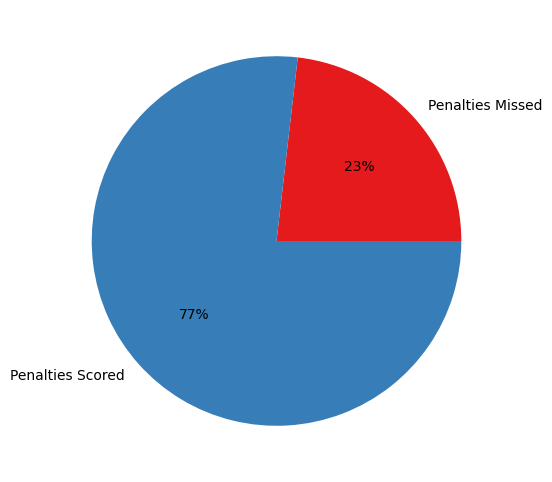

Out of a 682 spotkicks, 77% were converted and 23% were missed.


In [126]:
#Pie Chart for Penalties
pk_notscored= Total_Pens-Penaltiesscored
plt.figure(figsize=(13,6))
pendata=(pk_notscored, Penaltiesscored)
labels= ['Penalties Missed','Penalties Scored']
color= sns.color_palette('Set1')
plt.pie(pendata, colors=color, labels=labels, autopct='%.0f%%')
plt.show()


print("Out of a 682 spotkicks, 77% were converted and 23% were missed.")

Goals with assists 4629
Goals without assists 1929


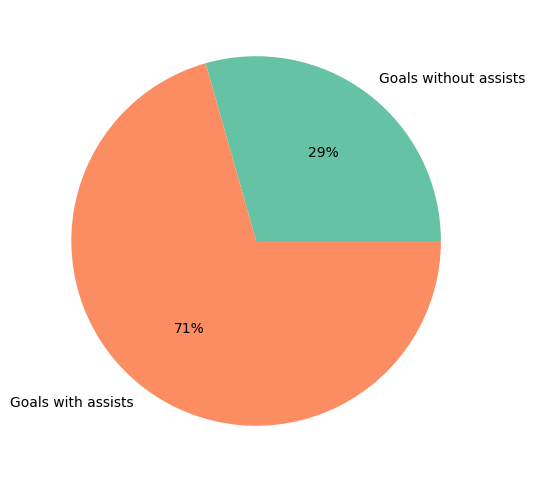

6558 goals were scored out of which 71% were assisted while 29% were solo goals.


In [127]:
goal_assist_count=((data['Player Assisted'] != 'N/A') & (data['is_goal'] == 1)).sum()
print('Goals with assists',goal_assist_count)

goal_noassist_count=((data['Player Assisted'] == 'N/A') & (data['is_goal'] == 1)).sum()
print('Goals without assists',goal_noassist_count)

plt.figure(figsize=(13,6))
data_lab=[goal_noassist_count, goal_assist_count]
labels= ['Goals without assists','Goals with assists']
color= sns.color_palette('Set2')
plt.pie(data_lab, colors=color, labels=labels, autopct='%.0f%%')
plt.show()


print("6558 goals were scored out of which 71% were assisted while 29% were solo goals.")

In [128]:
#Unique Positions
data["team_position"].unique()

array(['ST', 'SUB', 'RM', 'LB', 'RCB', 'LM', 'RES', 'LS', 'LW', 'RW',
       'RCM', 'RS', 'LCB', 'LCM', 'RDM', 'CAM', 'RB', 'LDM', 'RWB', 'CDM',
       'LWB', 'GK', 'CF', 'CB', 0, 'CM', 'LF', 'RF'], dtype=object)

In [129]:
print(data.nunique())

Sno                         9857
ID                         61256
Minute                       103
Result                         6
is_goal                        2
                           ...  
goalkeeping_diving            33
goalkeeping_handling          37
goalkeeping_positioning       36
goalkeeping_reflexes          35
FIFA_name                   1036
Length: 69, dtype: int64


In [130]:
#Total Forward Players

forward_df = data[(data['team_position'] == 'LW') | (data['team_position'] == 'RW')| (data['team_position'] == 'ST')| (data['team_position'] == 'FW')]
forward_df = forward_df.drop_duplicates(subset=['Player name'])
forward_count = forward_df.shape[0]
display(forward_df)
# print(forward_df)

Sno      ID  Minute       Result  is_goal  X_coord  Y_coord  \
0          0   14511      12    SavedShot        0     0.73     0.50   
29        29   14483      85         Goal        1     0.88     0.64   
42        42   14485      91  MissedShots        0     0.92     0.59   
55        55   14576      84  BlockedShot        0     0.96     0.66   
66        66   14568      63    SavedShot        0     0.92     0.39   
...      ...     ...     ...          ...      ...      ...      ...   
113570   179  311225      43    SavedShot        0     0.95     0.47   
113783   392  313081      84  MissedShots        0     0.91     0.56   
118373  4982  357022      85  BlockedShot        0     0.84     0.49   
122643   648  380232       1  MissedShots        0     0.86     0.40   
126010  4015  400494      87    SavedShot        0     0.90     0.59   

              xG      Player name Home/Away  ...  attacking_finishing  \
0       0.018741     wayne rooney         h  ...                   80   
29      0.297330       chris wood         h  ...                   79   
42      0.038447    romelu lukaku         a  ...                   88   
55      0.052784   junior hoilett         h  ...                   68   
66      0.478593         tom ince         a  ...                   70   
...          ...              ...       ...  ...                  ...   
113570  0.580602     luuk de jong         a  ...                   77   
113783  0.035599  pablo chavarria         h  ...                   73   
118373  0.075266     fedor smolov         a  ...                 84-2   
122643  0.069401   filip malbasic         a  ...                   72   
126010  0.396165  oussama idrissi         h  ...                   68   

       movement_sprint_speed  power_shot_power power_stamina  \
0                         65                85            67   
29                        75                80            70   
42                        90                88            84   
55                        87                76          58+3   
66                        77                70            70   
...                      ...               ...           ...   
113570                    55                82            75   
113783                    74                72            79   
118373                    85                80            74   
122643                    86              69+4            67   
126010                    83                78            66   

        defending_standing_tackle goalkeeping_diving goalkeeping_handling  \
0                              55                 10                   11   
29                             30                 14                   16   
42                             30                  8                   15   
55                             39                 11                   10   
66                             35                  9                   12   
...                           ...                ...                  ...   
113570                         40                 16                   10   
113783                         37                  9                   15   
118373                         28                 16                    9   
122643                         23                  6                    7   
126010                         22                 15                   16   

       goalkeeping_positioning goalkeeping_reflexes        FIFA_name  
0                            8                    7     wayne rooney  
29                           7                   16       chris wood  
42                           7                   10    romelu lukaku  
55                          11                    9   junior hoilett  
66                           8                    8         tom ince  
...                        ...                  ...              ...  
113570                       8                   11     luuk de jong  
11378

In [131]:
#Creating a dataframe premier_league_data to filter players from Premier League

premier_league_data = data[(data['League'] == 'Premier League')]

#Creating a dataframe la_liga_data to filter players from La Liga

la_liga_data = data[(data['League'] == 'La Liga')]

print("Premier League and La liga datframes created")


Premier League and La liga datframes created


In [132]:
print(np.size((premier_league_data['nationality'].unique())))

print("Players from 72 different nations participate in Premier League.")

72
Players from 72 different nations participate in Premier League.


In [133]:
print(np.size((la_liga_data['nationality'].unique())))

print("Players from 56 different nations participate in La Liga.")

56
Players from 56 different nations participate in La Liga.


In [134]:
print("Premier League teams")
premier_league_data['Player Team'].unique()

Premier League teams


array(['Manchester United', 'Swansea', 'Leicester', 'Everton',
       'Queens Park Rangers', 'Hull', 'Stoke', 'Aston Villa',
       'West Bromwich Albion', 'Sunderland', 'West Ham', 'Tottenham',
       'Arsenal', 'Crystal Palace', 'Liverpool', 'Southampton',
       'Newcastle United', 'Manchester City', 'Burnley', 'Chelsea',
       'Bournemouth', 'Watford', 'Norwich', 'Middlesbrough',
       'Huddersfield', 'Brighton', 'Fulham', 'Cardiff',
       'Wolverhampton Wanderers', 'Sheffield United', 'Leeds'],
      dtype=object)

In [135]:
print("La Liga teams")
la_liga_data['Player Team'].unique()

La Liga teams


array(['Malaga', 'Athletic Club', 'Sevilla', 'Valencia',
       'Deportivo La Coruna', 'Almeria', 'Real Sociedad', 'Barcelona',
       'Villarreal', 'Real Madrid', 'Cordoba', 'Atletico Madrid',
       'Getafe', 'Espanyol', 'Rayo Vallecano', 'Elche', 'Granada',
       'Levante', 'Eibar', 'Celta Vigo', 'Las Palmas', 'Sporting Gijon',
       'Real Betis', 'Osasuna', 'Alaves', 'Leganes', 'Girona',
       'Real Valladolid', 'SD Huesca', 'Mallorca', 'Cadiz'], dtype=object)

<Axes: title={'center': 'No. of Premier League players by Nation'}, xlabel='nationality'>

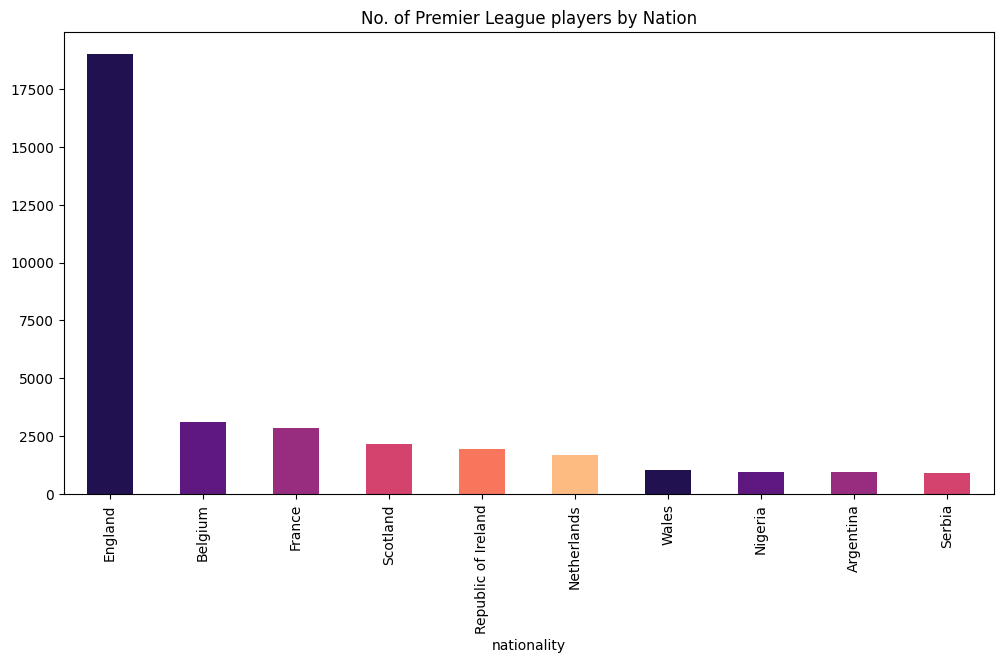

In [136]:
#Premier League Player Nationalities

nationality = premier_league_data.groupby('nationality').size().sort_values(ascending=False)
nationality.head(10).plot(title= 'No. of Premier League players by Nation', kind= 'bar', figsize= (12,6), color=sns.color_palette('magma'))

<Axes: title={'center': 'No. of La Liga players by Nation'}, xlabel='nationality'>

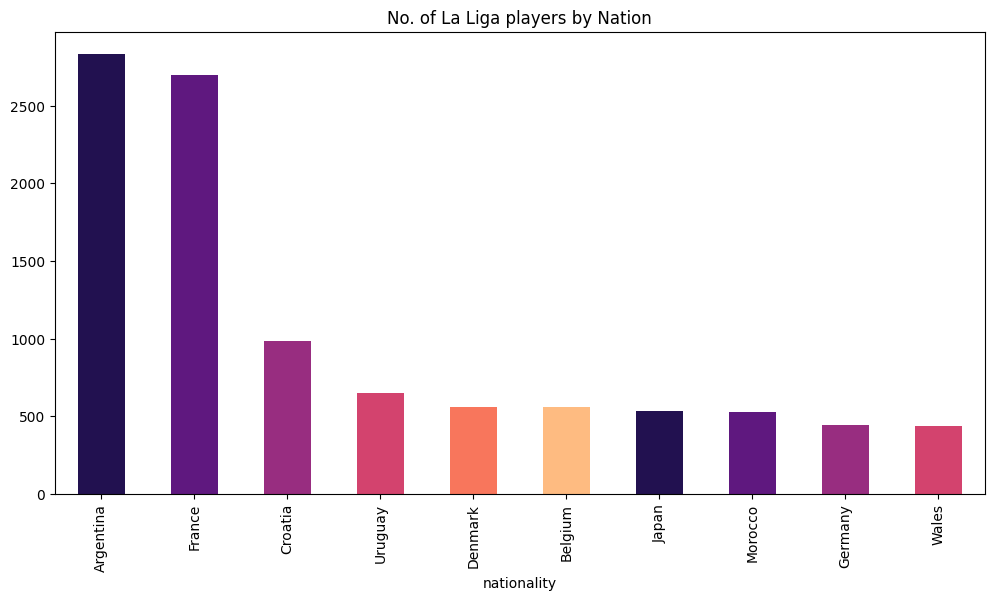

In [137]:
#La Liga Player Nationalities

nationality = la_liga_data.groupby('nationality').size().sort_values(ascending=False)
nationality.head(10).plot(title= 'No. of La Liga players by Nation', kind= 'bar', figsize= (12,6), color=sns.color_palette('magma'))

<Axes: title={'center': 'Most Chances created by Premier League Clubs in 2019'}>

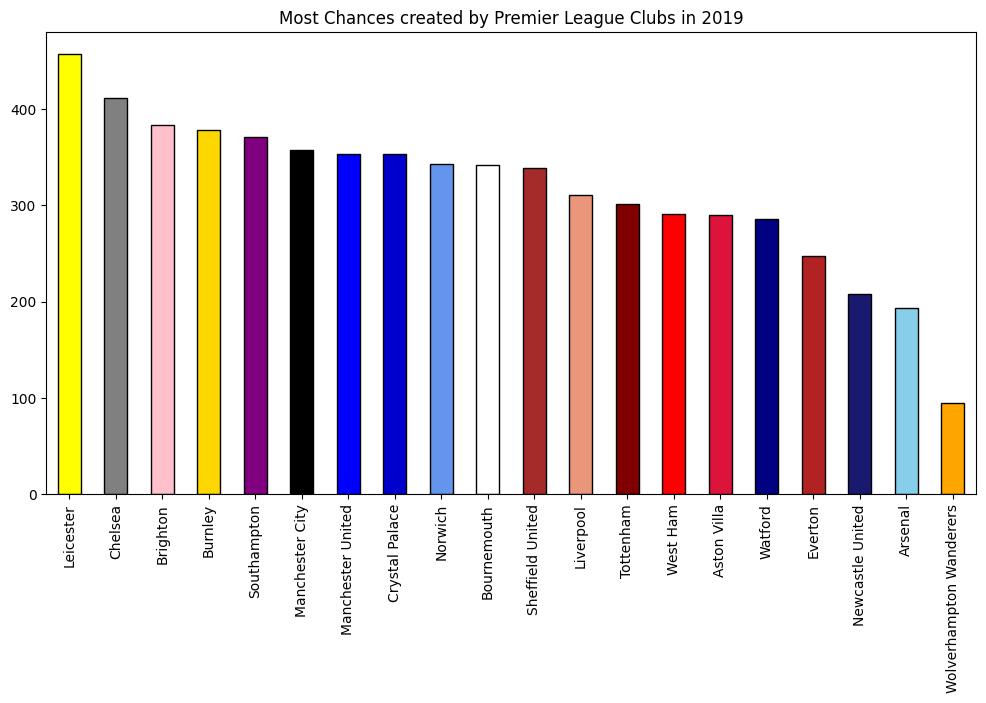

In [138]:
#Plot to display the most xG chances created i.e. the players who creates most chances to score goals

#Creating a dataframe premier_league_data to filter players from Premier League in year 2019

premier_league_data_2019 = premier_league_data[(premier_league_data['Year'] == 2019)]

unique_players_pl_2019 = premier_league_data_2019.drop_duplicates(subset=['Player name'])


# Assign default color
default_color = 'gray'

# Assign color dictionary
colors= {'Arsenal':'firebrick', 'Aston Villa':'maroon', 'Brentford':'pink', 'Brighton':'cornflowerblue',
       'Burnley':'purple','Bournemouth':'gray','Chelsea':'midnightblue', 'Crystal Palace':'blue', 'Everton':'navy', 'Leeds United':'ivory',
       'Leicester':'mediumblue', 'Liverpool':'crimson', 'Manchester City':'skyblue',
       'Manchester United':'red', 'Newcastle United':'black', 'Norwich':'yellow',
       'Southampton':'darksalmon', 'Tottenham':'white', 'Watford':'gold', 'West Ham':'brown',
       'Wolverhampton Wanderers':'orange','Sheffield United':'pink'}

# Map colors to teams
premier_league_data_2019.loc[:,'color'] = premier_league_data_2019['Player Team'].map(colors).fillna(default_color)


premier_league_data_2019['Player Team'].value_counts().plot(title= 'Most Chances created by Premier League Clubs in 2019', kind= 'bar', figsize= (12,6), color = [colors[x] for x in unique_players_pl_2019['Player Team'].value_counts().index],edgecolor = 'black')


<function matplotlib.pyplot.show(close=None, block=None)>

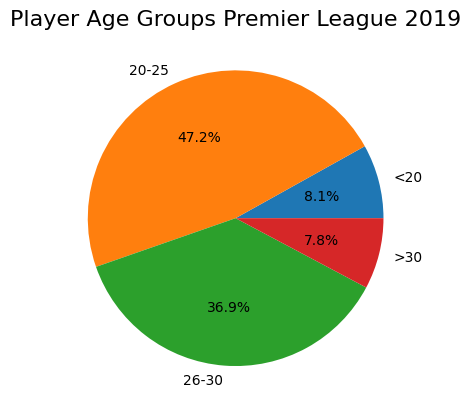

In [139]:
#Player Age Groupings

under_20= unique_players_pl_2019[unique_players_pl_2019['age']<20.0]
age20_25= unique_players_pl_2019[(unique_players_pl_2019['age']>=20.0) & (unique_players_pl_2019['age']<=25.0)]
age26_30= unique_players_pl_2019[(unique_players_pl_2019['age']>25.0) & (unique_players_pl_2019['age']<=30.0)]
above_30= unique_players_pl_2019[unique_players_pl_2019['age']>30.0]

x= np.array([under_20['Player name'].count(), age20_25['Player name'].count(), age26_30['Player name'].count(), above_30['Player name'].count()])
agelabels= ['<20','20-25','26-30','>30']
plt.title('Player Age Groups Premier League 2019', fontsize=16)
plt.pie(x, labels=agelabels, autopct='%.1f%%')
plt.show

<Axes: >

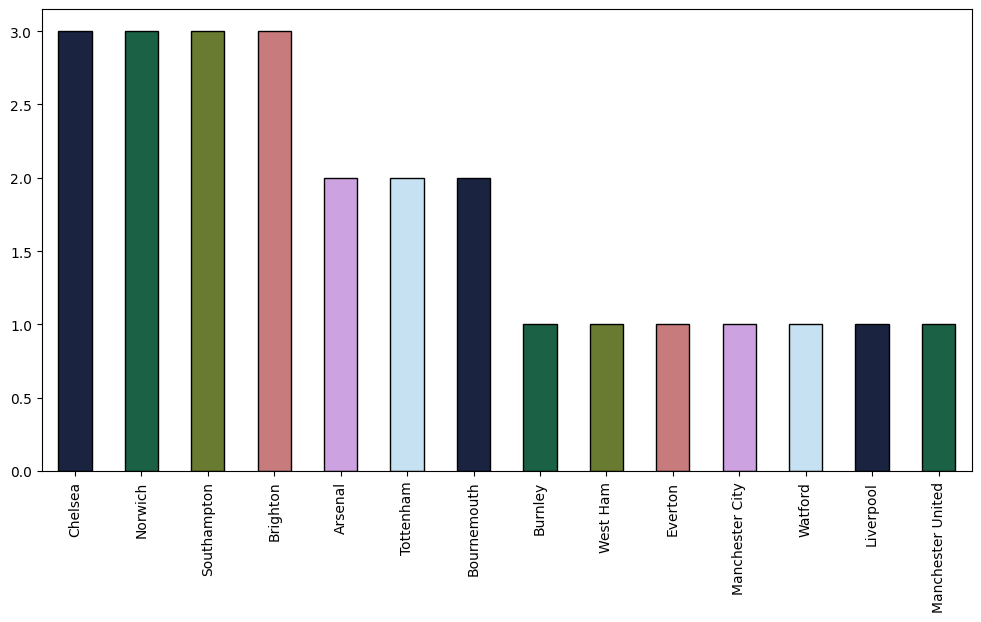

In [140]:
# Under 20 players in each club
under_20_pl= unique_players_pl_2019[unique_players_pl_2019['age']<20]
under_20_pl['Player Team'].value_counts().plot(kind='bar',figsize= (12,6), color = sns.color_palette('cubehelix'),edgecolor = 'black')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Liverpool'),
  Text(1, 0, 'Norwich'),
  Text(2, 0, 'West Ham'),
  Text(3, 0, 'Manchester City'),
  Text(4, 0, 'Bournemouth'),
  Text(5, 0, 'Sheffield United'),
  Text(6, 0, 'Burnley'),
  Text(7, 0, 'Southampton'),
  Text(8, 0, 'Crystal Palace'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Watford'),
  Text(11, 0, 'Brighton'),
  Text(12, 0, 'Tottenham'),
  Text(13, 0, 'Aston Villa'),
  Text(14, 0, 'Newcastle United'),
  Text(15, 0, 'Arsenal'),
  Text(16, 0, 'Leicester'),
  Text(17, 0, 'Wolverhampton Wanderers'),
  Text(18, 0, 'Manchester United'),
  Text(19, 0, 'Chelsea')])

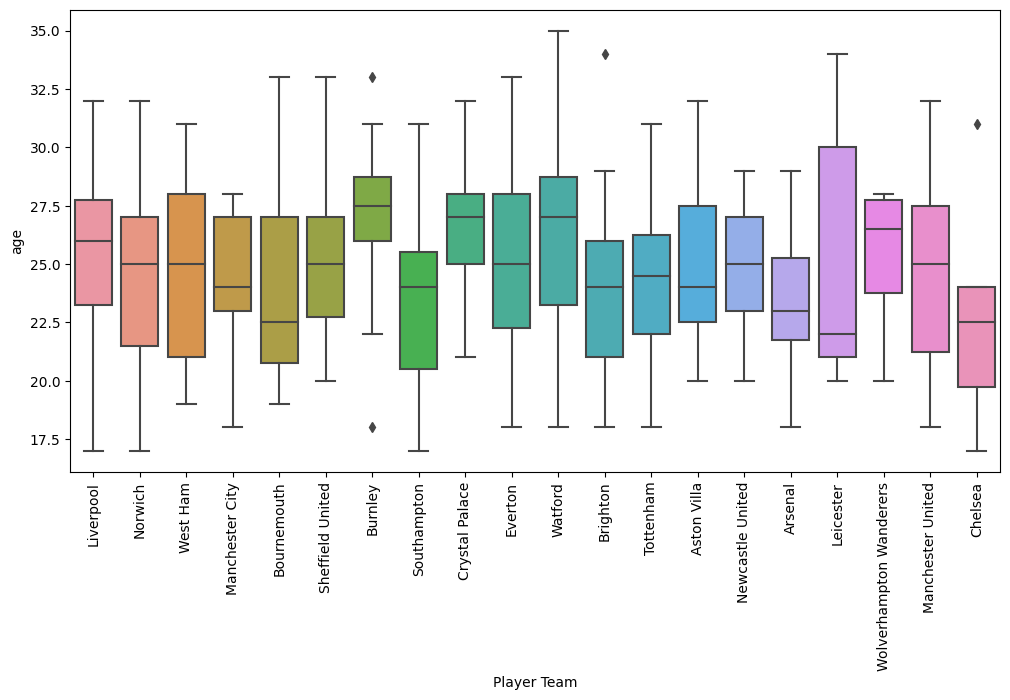

In [141]:
# Average Age
plt.figure(figsize=(12,6))
sns.boxplot(x='Player Team',y='age',data=unique_players_pl_2019)
plt.xticks(rotation=90)

Plotting hotspot for goals with respect to X positional Coordinate (Distance) and Y positional Coordinate (Angle) on the football pitch


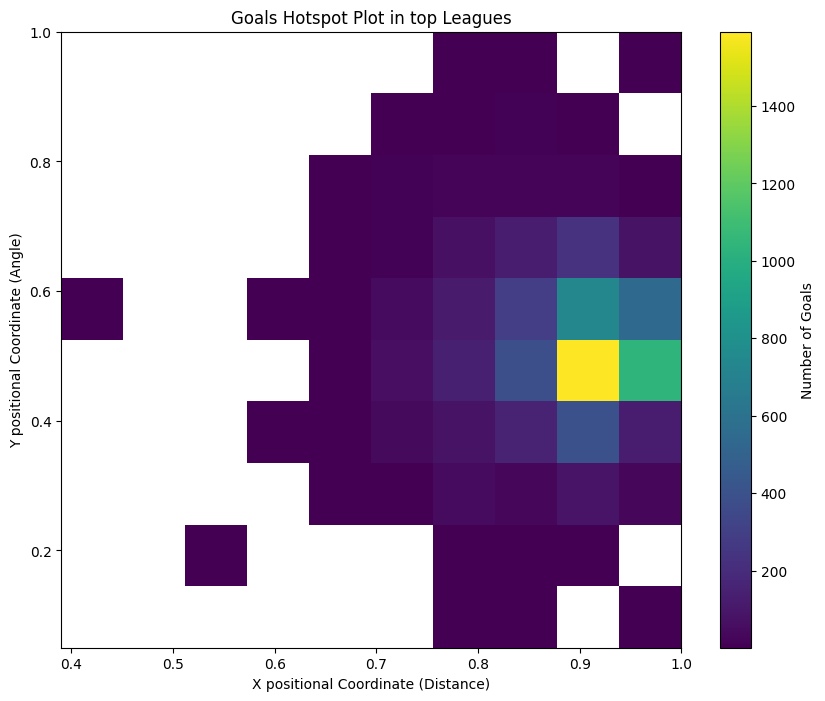

In [366]:
# Plotting hotspot for goals with respect to X and Y co ordinates on the football pitch

print("Plotting hotspot for goals with respect to X positional Coordinate (Distance) and Y positional Coordinate (Angle) on the football pitch")
hotspot_data_all_goals = data[data['is_goal'] == 1]
plt.figure(figsize=(10, 8))
plt.hist2d(hotspot_data_all_goals["X_coord"], hotspot_data_all_goals["Y_coord"], bins=(10, 10), cmap="viridis", cmin=1)
plt.colorbar(label="Number of Goals")
plt.title("Goals Hotspot Plot in top Leagues")
plt.xlabel("X positional Coordinate (Distance)")
plt.ylabel("Y positional Coordinate (Angle)")
plt.show()


In [357]:
# Average age of each Premier League club in 2019
print("Average age of each Premier League team in 2019")
player_num= unique_players_pl_2019.groupby('Player Team').size()
avg_age= (unique_players_pl_2019.groupby('Player Team')['age'].sum()) / player_num
avg_age.sort_values(ascending=False)

Average age of each Premier League team in 2019


Player Team
Burnley                    26.833333
Crystal Palace             26.823529
Watford                    26.444444
Liverpool                  25.642857
Wolverhampton Wanderers    25.333333
Sheffield United           25.300000
Everton                    25.142857
Aston Villa                25.133333
Newcastle United           25.000000
West Ham                   24.933333
Leicester                  24.882353
Norwich                    24.565217
Manchester United          24.428571
Brighton                   24.294118
Tottenham                  24.250000
Bournemouth                23.900000
Manchester City            23.888889
Southampton                23.600000
Arsenal                    23.333333
Chelsea                    22.250000
dtype: float64

In [144]:
# Most Assists by a player in Premier League in 2019 
print("Most Assists by a player in Premier League in 2019 season")


premier_league_data_2019_GA = premier_league_data[(premier_league_data['Year'] == 2019)&(premier_league_data['is_goal'] == 1)]


# Group by "player_assist" and count occurrences
player_assist_counts = premier_league_data_2019_GA['Player Assisted'].value_counts().reset_index()
player_assist_counts.columns = ['Player Name', 'Assists']

player_assist_counts = player_assist_counts.sort_values(by='Assists', ascending=False)
player_assist_counts = player_assist_counts[player_assist_counts['Player Name'] != 'N/A']
player_assist_counts = player_assist_counts.head(10)
display(player_assist_counts)

# sns.set_theme(style='whitegrid', color_codes= True)
# ax = sns.barplot(x='Player Name', y='Assists', data=player_assist_counts.sort_values(by='Assists'), palette='Set2')
# ax.set_xlabel('Player Team', fontsize=20)
# ax.set_ylabel('Assists', fontsize=20)
# plt.xticks(rotation=90)
# plt.rcParams['figure.figsize']=(20,8)
# plt.title('Total Assists by each Player', fontsize=20)

Most Assists by a player in Premier League in 2019 season


Player Name  Assists
2            Son Heung-Min        8
1          Kevin De Bruyne        8
3   Trent Alexander-Arnold        7
4         Emiliano Buendía        7
5                  Willian        7
6         Andrew Robertson        6
7          Marcus Rashford        6
8          Ashley Westwood        6
9            Harvey Barnes        6
10           Dwight McNeil        6

In [145]:
# Most Goals by a player in Premier League in 2019 season
print("Most Goals by a player in Premier League in 2019 season")

player_goal_counts = premier_league_data_2019_GA['Player name'].value_counts().reset_index()
player_goal_counts.columns = ['Player name', 'Goals']

player_goal_counts = player_goal_counts.sort_values(by='Goals', ascending=False)
player_goal_counts = player_goal_counts[player_goal_counts['Player name'] != 'N/A']
player_goal_counts = player_goal_counts.head(10)
display(player_goal_counts)

Most Goals by a player in Premier League in 2019 season


Player name  Goals
0      jamie vardy     23
1       danny ings     22
2  raheem sterling     20
3    mohamed salah     19
4       harry kane     18
5  anthony martial     17
6  marcus rashford     17
7    tammy abraham     15
8  kevin de bruyne     14
9       chris wood     14

In [146]:
#Players with most xG in Premier League 2019

player_goal_counts = premier_league_data_2019['Player name'].value_counts().reset_index()
player_goal_counts.columns = ['Player name', 'Goals']


# Group by "player name" and calculate the sum of "xg" for each player
player_xg_sum = premier_league_data_2019.groupby('Player name')['xG'].sum().reset_index()

# Rename the columns for clarity
player_xg_sum.columns = ['Player name', 'Total xG']
player_xg_sum = player_xg_sum.sort_values(by='Total xG', ascending=False)
player_xg_sum = player_xg_sum[player_xg_sum['Player name'] != 'N/A']
player_xg_sum = player_xg_sum.head(10)
display(player_xg_sum)

Player name   Total xG
213    mohamed salah  20.663318
244  raheem sterling  19.799907
192  marcus rashford  19.503727
134      jamie vardy  18.903537
282    tammy abraham  18.082802
49        chris wood  17.226202
67        danny ings  15.659717
226      neal maupay  13.558543
107       harry kane  13.297066
211  michail antonio  13.249549

In [147]:
# Displaying the modified dataset

# print(data)
display(data)


Sno      ID  Minute       Result  is_goal  X_coord  Y_coord  \
0          0   14511      12    SavedShot        0     0.73     0.50   
1          1   14512      16  BlockedShot        0     0.79     0.34   
3          3   14514      26    SavedShot        0     0.92     0.48   
4          4   14516      33  MissedShots        0     0.92     0.59   
5          5   14517      40  BlockedShot        0     0.77     0.47   
...      ...     ...     ...          ...      ...      ...      ...   
130103  8102  424199      19  BlockedShot        0     0.81     0.45   
130111  8110  424368       8  BlockedShot        0     0.76     0.52   
130113  8112  424371      33  MissedShots        0     0.76     0.73   
130114  8113  424374      54  BlockedShot        0     0.74     0.56   
130120  8119  424388      91         Goal        1     0.75     0.69   

              xG      Player name Home/Away  ...  attacking_finishing  \
0       0.018741     wayne rooney         h  ...                   80   
1       0.015598     wayne rooney         h  ...                   80   
3       0.057788     wayne rooney         h  ...                   80   
4       0.048801     wayne rooney         h  ...                   80   
5       0.030971  darren fletcher         h  ...                   59   
...          ...              ...       ...  ...                  ...   
130103  0.050348    takefusa kubo         a  ...                   52   
130111  0.028152   nemanja gudelj         h  ...                   58   
130113  0.017663  sergio escudero         h  ...                   57   
130114  0.023021    lucas ocampos         h  ...                   75   
130120  0.019262  alejandro gomez         h  ...                   76   

       movement_sprint_speed  power_shot_power power_stamina  \
0                         65                85            67   
1                         65                85            67   
3                         65                85            67   
4                         65                85            67   
5                         44                76          63-1   
...                      ...               ...           ...   
130103                    74                41            67   
130111                    65                85            91   
130113                    91                72            77   
130114                    79                78            82   
130120                    86                76            75   

        defending_standing_tackle goalkeeping_diving goalkeeping_handling  \
0                              55                 10                   11   
1                              55                 10                   11   
3                              55                 10                   11   
4                              55                 10                   11   
5                            72-1                 10                   16   
...                           ...                ...                  ...   
130103                         43                  6                    7   
130111                         76                  8                   11   
130113                         13                  9                   10   
130114                         44                 11                    8   
130120                         30                  8                   11   

       goalkeeping_positioning goalkeeping_reflexes        FIFA_name  
0                            8                    7     wayne rooney  
1                            8                    7     wayne rooney  
3                            8                    7     wayne rooney  
4                            8                    7     wayne rooney  
5                           10                    9  darren fletcher  
...                        ...                  ...              ...  
130103                      10                   10    takefusa kubo  
13011

In [148]:
# Selecting relevant features and target

#version2
#features = data[['X_coord', 'Y_coord','Y_coord_angle','is_Penalty', 'is_head','is_home']]

#version2
#features = data[['X_coord', 'Y_coord', 'is_Penalty', 'is_head','is_home','is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece','is_Cross','is_Throughball']]

#version3
# features = data[['X_coord', 'Y_coord','Y_coord_angle','is_Penalty', 'is_head','is_home',
#                  'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
#                  'overall','value_eur','shooting']]

#versin4
features = data[['X_coord', 'Y_coord','Y_coord_angle','is_Penalty', 'is_head','is_home',
                 'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                 'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating']]

target = data['is_goal']
print("Feature Selection")


Feature Selection


In [149]:
# Splitting the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
def testtrainsplit():
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
    print("Test Train Split")
    return X_train, X_test, y_train, y_test

print("Function for Test Train Split")

Function for Test Train Split


In [150]:
# Applying oversampling using SMOTE
def sampling(X_train,y_train):
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Sampling")
    undersampler = TomekLinks(sampling_strategy='majority')
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)
    return X_train_resampled,y_train_resampled

print("Function for Sampling")

# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# oversampler = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

#Apply undersampling using Tomek links
# undersampler = TomekLinks(sampling_strategy='majority')
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)



Function for Sampling


In [151]:
# Standardizing the features
#scaler = StandardScaler()
#Scaling the entire feature matrix

def scaling(X_train,X_train_resampled,X_test):
    scaler = MinMaxScaler()
    #scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled_resampled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    X_data_scaled = scaler.transform(features)  
    print("Feature Scaling")
    return scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled

print("Function for Feature Scaling")

Function for Feature Scaling


In [152]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [153]:
#XGBoost Model

# Initializing and train the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_s = XGBClassifier(random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)
# xgb_s.fit(X_train_scaled, y_train)
xgb_s.fit(X_train_scaled_resampled, y_train_resampled)

# Predicting xG values for both training and testing sets
xG_train = xgb_model.predict_proba(X_train)[:, 1]
xG_test = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)
# y_preds = xgb_s.predict(X_test_scaled)
y_preds = xgb_s.predict(X_test_scaled)

#y_pred_proba = xgb_s.predict_proba(X_test_scaled)[:,1]
y_pred_proba = xgb_s.predict_proba(X_test_scaled)[:,1]

print("xG Boost model Prediction")
#print(X_test['xG_calc'])

xG Boost model Prediction


In [154]:
#XGBOOST HYPER PARAMETER TUNING


# Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300]
# }


param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1],
    'n_estimators': [100]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=xgb_s, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
#grid_search.fit(X_train_scaled, y_train_resampled)
grid_search.fit(X_train_scaled, y_train)

#Best parameters
print("Best Parameters:", grid_search.best_params_)

# Initializing the XGBoost model with best parameters
best_params = grid_search.best_params_
final_xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
# final_xgb_model.fit(X_train_scaled, y_train_resampled)
final_xgb_model.fit(X_train_scaled, y_train)

# Predicting xG values on the scaled test set
hyper_preds_xgb = final_xgb_model.predict_proba(X_test_scaled)[:, 1]
hyper_xgb_preds = final_xgb_model.predict(X_test_scaled)

X_test['xG_calc'] = hyper_preds_xgb

xG_all = final_xgb_model.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_xgb'] = xG_all


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


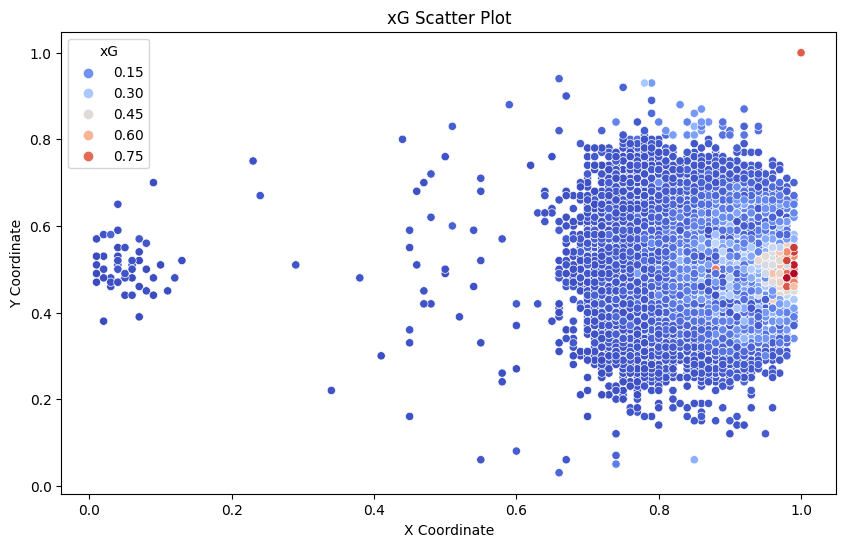

In [155]:
# Scatter plot of xG values w.r.t to X and Y coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['X_coord'], y=X_test['Y_coord'], hue=hyper_preds_xgb, palette='coolwarm')
plt.title("xG Scatter Plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend(title="xG")
plt.show()


In [156]:
print("xG Boost Model Evaluation metrics")

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
# r2 = r2_score(y_test, y_pred)
# print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_pred_proba)
print("Brier Score :", brier_score)

report_xgb1 = classification_report(y_test, y_preds)
print(report_xgb1)



print("xG Boost HYPER PARAMETER MODEL EVALUATION METRICS")

accuracy = accuracy_score(y_test, hyper_xgb_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_xgb_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_xgb_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, hyper_xgb_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_xgb_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_xgb_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_xgb)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_xgb_preds)
print("Confusion Matrix:\n", conf_matrix)
# r2 = r2_score(y_test, y_pred)
# print("R-squared:", r2)
brier_score = brier_score_loss(y_test, hyper_preds_xgb)
print("Brier Score :", brier_score)	

report_xgb2 = classification_report(y_test, hyper_xgb_preds)
print(report_xgb2)

xG Boost Model Evaluation metrics
Accuracy: 0.90
Precision: 0.55
Recall: 0.23
ROC AUC: 0.60
Mean Squared Error: 0.10
F1 Score: 0.32216216216216215
Log Loss value : 0.2814792195675363
Confusion Matrix:
 [[10811   240]
 [ 1014   298]]
Brier Score : 0.08090990884820212
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11051
           1       0.55      0.23      0.32      1312

    accuracy                           0.90     12363
   macro avg       0.73      0.60      0.63     12363
weighted avg       0.88      0.90      0.88     12363

xG Boost HYPER PARAMETER MODEL EVALUATION METRICS
Accuracy: 0.90
Precision: 0.70
Recall: 0.16
ROC AUC: 0.58
Mean Squared Error: 0.10
F1 Score: 0.26038437693738375
Log Loss value : 0.26952200967058554
Confusion Matrix:
 [[10960    91]
 [ 1102   210]]
Brier Score : 0.07743217462645871
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11051
           1 

In [157]:
#xG Function xG BOOST

def calculate_xG(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = xgb_model.predict_proba(new_data)[0, 1]  # Probability of scoring a goal
    #xG_probability = xgb_s.predict_proba(new_data)[0, 1]
    #xg_prob = xgb_s.predict_proba(scaled_features)[:, 1]
    xg_prob = final_xgb_model.predict_proba(scaled_features)[:, 1]
    #new_data['New xG']=xG_probability
    new_data['New xG']=xg_prob
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xG_probability)
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xg_prob[0])
    return xg_prob[0],new_data
    #return xG_probability, new_data


position_x = 0.88  # Replace with the actual X-coordinate
position_y = 0.50  # Replace with the actual Y-coordinate
Y_coord_angle = 1.00
is_penalty = 1   # Replace with 1 if it's a penalty, or 0 if it's not
is_header = 0    # Replace with 1 if it's a header, or 0 if it's not
is_home = 1
is_OpenPlay = 1
is_DirectFreekick = 0
is_FromCorner = 0
is_SetPiece = 0
player_name = "lionel messi"

new_xG_data = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data=new_xG_data.append(new_data)

# print(new_xG_data)
print("xG values of attacking player wrt to the positions and features")
print(new_xG_data[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])

messi_xG_data = new_xG_data



xG values of attacking player wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.327570
0     0.90     0.50           1.00     94.0  0.352140
0     0.94     0.48           0.96     94.0  0.587830
0     0.90     0.50           1.00     94.0  0.352140
0     0.95     0.50           1.00     94.0  0.516307
0     0.87     0.40           0.80     94.0  0.155197
0     0.80     0.45           0.90     94.0  0.118566
0     0.50     0.50           1.00     94.0  0.071368
0     0.40     0.60           0.80     94.0  0.051874
0     0.30     0.70           0.60     94.0  0.035181
0     0.20     0.80           0.40     94.0  0.044846
0     0.10     0.10           0.20     94.0  0.032110


In [158]:
#xG values for a highly rated defender with low attacking qualities such as "Vincent Kompany" from Manchester City 
 


player_name = "vincent kompany"

new_xG_data2 = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data2=new_xG_data2.append(new_data)

print("xG values of defensive player wrt to the positions and features")
print(new_xG_data2[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])

kompany_xG_data = new_xG_data2



xG values of defensive player wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     85.0  0.215776
0     0.90     0.50           1.00     85.0  0.233147
0     0.94     0.48           0.96     85.0  0.488073
0     0.90     0.50           1.00     85.0  0.233147
0     0.95     0.50           1.00     85.0  0.447644
0     0.87     0.40           0.80     85.0  0.107574
0     0.80     0.45           0.90     85.0  0.044189
0     0.50     0.50           1.00     85.0  0.046920
0     0.40     0.60           0.80     85.0  0.038482
0     0.30     0.70           0.60     85.0  0.030276
0     0.20     0.80           0.40     85.0  0.039827
0     0.10     0.10           0.20     85.0  0.032363


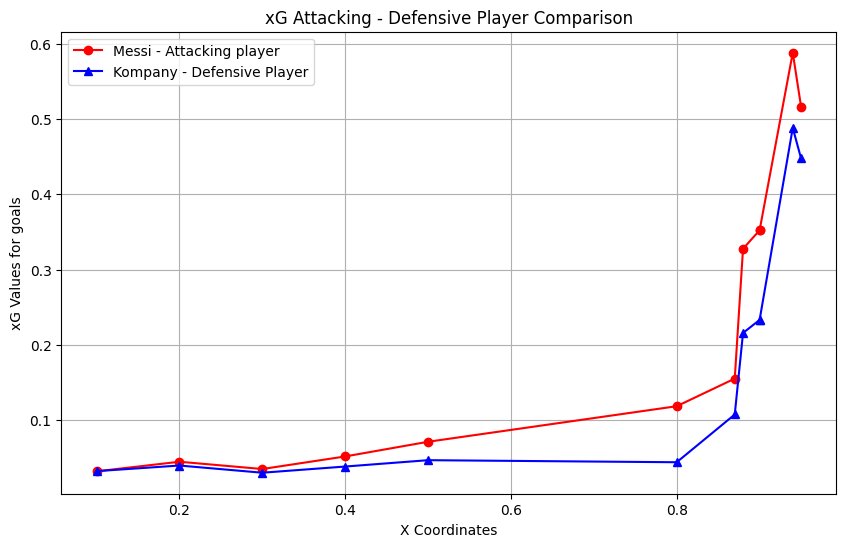

In [297]:
# Comparison of xG values of a highly rated offensive player Messi to defensive player Kompany

# Creating line plots
messi_xG_data = messi_xG_data.sort_values(by=["X_coord", "Y_coord"])
kompany_xG_data = kompany_xG_data.sort_values(by=["X_coord", "Y_coord"])
plt.figure(figsize=(10, 6))
plt.plot(messi_xG_data['X_coord'], messi_xG_data['New xG'], label='Messi - Attacking player', color='red', marker='o')
plt.plot(kompany_xG_data['X_coord'], kompany_xG_data['New xG'], label='Kompany - Defensive Player', color='blue', marker='^')
# plt.plot(goal_df['X_coord'], goal_df['xG_calc_xgb'], label='xg_xgb', color='green', marker='s')

# Customizing the plot
plt.title('xG Attacking - Defensive Player Comparison')
plt.xlabel('X Coordinates')
plt.ylabel('xG Values for goals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [160]:
#XG values when Messi takes a shot against low rated teams such as Sunderland


player_name = "lionel messi"

new_xG_data3 = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,68),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,68),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,68)
]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data3=new_xG_data3.append(new_data)

print("xG values when highly rated attacking player takes a shot against low rated teams such as Sunderland")
print(new_xG_data3[["X_coord","Y_coord","Y_coord_angle","overall","Opponent_rating","New xG"]])

sunderland_xG_data = new_xG_data3



xG values when highly rated attacking player takes a shot against low rated teams such as Sunderland
   X_coord  Y_coord  Y_coord_angle  overall Opponent_rating    New xG
0     0.88     0.50           1.00     94.0              68  0.360296
0     0.90     0.50           1.00     94.0              68  0.385912
0     0.94     0.48           0.96     94.0              68  0.609440
0     0.90     0.50           1.00     94.0              68  0.385912
0     0.95     0.50           1.00     94.0              68  0.538725
0     0.87     0.40           0.80     94.0              68  0.147985
0     0.80     0.45           0.90     94.0              68  0.134591
0     0.50     0.50           1.00     94.0              68  0.075111
0     0.40     0.60           0.80     94.0              68  0.054655
0     0.30     0.70           0.60     94.0              68  0.037102
0     0.20     0.80           0.40     94.0              68  0.047269
0     0.10     0.10           0.20     94.0              68

In [161]:
#XG values when Messi takes a shot against high rated teams such as Real Madrid

player_name = "lionel messi"

new_xG_data4 = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,85),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,85),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,85)
]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data4=new_xG_data4.append(new_data)

print("xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid")
print(new_xG_data4[["X_coord","Y_coord","Y_coord_angle","overall","Opponent_rating","New xG"]])

realmadrid_xG_data = new_xG_data4



xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid
   X_coord  Y_coord  Y_coord_angle  overall Opponent_rating    New xG
0     0.88     0.50           1.00     94.0              85  0.322784
0     0.90     0.50           1.00     94.0              85  0.337346
0     0.94     0.48           0.96     94.0              85  0.573755
0     0.90     0.50           1.00     94.0              85  0.337346
0     0.95     0.50           1.00     94.0              85  0.499609
0     0.87     0.40           0.80     94.0              85  0.151370
0     0.80     0.45           0.90     94.0              85  0.104882
0     0.50     0.50           1.00     94.0              85  0.067992
0     0.40     0.60           0.80     94.0              85  0.051953
0     0.30     0.70           0.60     94.0              85  0.036113
0     0.20     0.80           0.40     94.0              85  0.046022
0     0.10     0.10           0.20     94.0              

Comparison of xG values of a highly rated offensive player taking shots against a low rated defensive team and high rated team


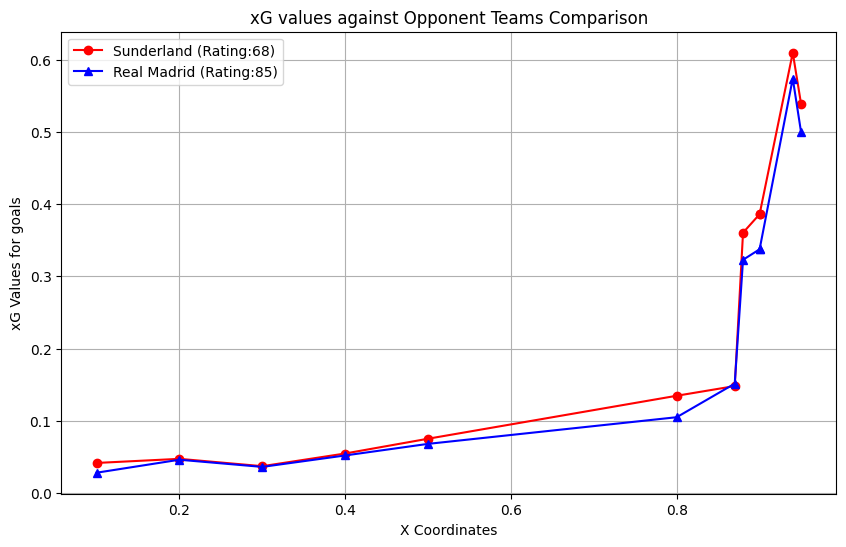

As expected, the shots against low rated teams has higher xG values compared to shots against stronger teams


In [298]:
# Comparison of xG values of a highly rated offensive player Messi taking shots against a low rated defensive team in
# Sunderland and highly rated team like Real Madrid

# Creating line plots
sunderland_xG_data = sunderland_xG_data.sort_values(by=["X_coord", "Y_coord"])
realmadrid_xG_data = realmadrid_xG_data.sort_values(by=["X_coord", "Y_coord"])
plt.figure(figsize=(10, 6))
plt.plot(sunderland_xG_data['X_coord'], sunderland_xG_data['New xG'], label='Sunderland (Rating:68)', color='red', marker='o')
plt.plot(realmadrid_xG_data['X_coord'], realmadrid_xG_data['New xG'], label='Real Madrid (Rating:85)', color='blue', marker='^')
# plt.plot(goal_df['X_coord'], goal_df['xG_calc_xgb'], label='xg_xgb', color='green', marker='s')

# Customizing the plot
plt.title('xG values against Opponent Teams Comparison')
plt.xlabel('X Coordinates')
plt.ylabel('xG Values for goals')
plt.legend()
plt.grid(True)

print("Comparison of xG values of a highly rated offensive player taking shots against a low rated defensive team and high rated team")
# Show the plot
plt.show()

print("As expected, the shots against low rated teams has higher xG values compared to shots against stronger teams")

In [163]:
#XG values when Messi takes a shot with his HEAD

player_name = "lionel messi"

new_xG_data_h = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 1, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.81, 0.30,(1-abs(0.30-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.83, 0.48,(1-abs(0.48-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75)

]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data_h=new_xG_data_h.append(new_data)

print("xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid")
print(new_xG_data_h[["X_coord","Y_coord","Y_coord_angle","overall","Opponent_rating","New xG"]])

head_xG_data = new_xG_data_h



xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid
   X_coord  Y_coord  Y_coord_angle  overall Opponent_rating    New xG
0     0.88     0.50           1.00     94.0              75  0.226482
0     0.90     0.50           1.00     94.0              75  0.193097
0     0.94     0.48           0.96     94.0              75  0.468846
0     0.90     0.50           1.00     94.0              75  0.193097
0     0.95     0.50           1.00     94.0              75  0.516307
0     0.87     0.40           0.80     94.0              75  0.096916
0     0.81     0.30           0.60     94.0              75  0.050482
0     0.83     0.48           0.96     94.0              75  0.144472


In [164]:
#XG values when Messi takes a shot with his FOOT

player_name = "lionel messi"

new_xG_data_f= pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.81, 0.30,(1-abs(0.30-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.83, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]



for params in parameter_sets:
    xG_probability, new_data = calculate_xG(*params)
    new_xG_data_f=new_xG_data_f.append(new_data)

print("xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid")
print(new_xG_data_f[["X_coord","Y_coord","Y_coord_angle","overall","Opponent_rating","New xG"]])

foot_xG_data = new_xG_data_f



xG values when highly rated attacking player takes a shot against high rated teams such as Real Madrid
   X_coord  Y_coord  Y_coord_angle  overall Opponent_rating    New xG
0     0.88     0.50           1.00     94.0              75  0.327570
0     0.90     0.50           1.00     94.0              75  0.352140
0     0.94     0.48           0.96     94.0              75  0.587830
0     0.90     0.50           1.00     94.0              75  0.352140
0     0.95     0.50           1.00     94.0              75  0.614709
0     0.87     0.40           0.80     94.0              75  0.155197
0     0.81     0.30           0.60     94.0              75  0.050482
0     0.83     0.48           0.96     94.0              75  0.164452


Comparison of xG values taken with foot and head from same positions om football pitch


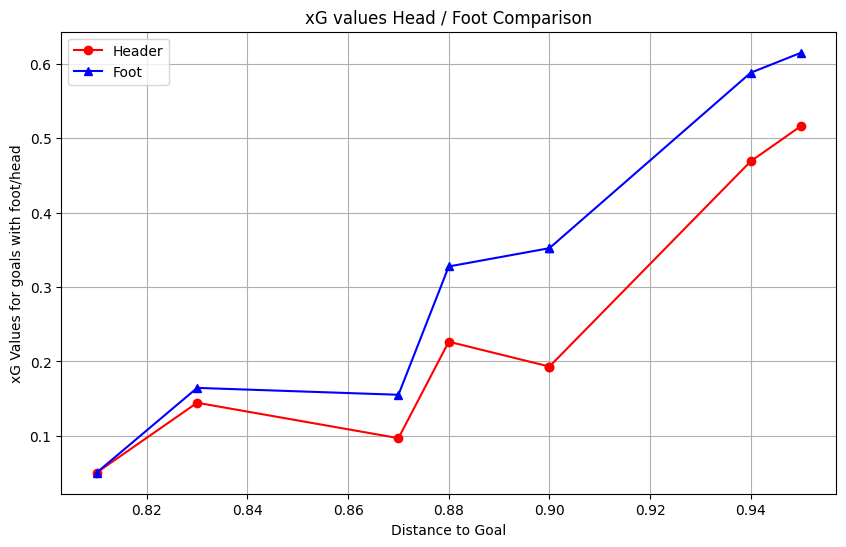

As expected, the shots taken with foot has higher xG values compared to header attempts


In [438]:
# Comparison of xG values of a highly rated offensive player Messi taking shots against a low rated defensive team in
# Sunderland and highly rated team like Real Madrid

# Creating line plots
head_xG_data = head_xG_data.sort_values(by=["X_coord", "Y_coord"])
foot_xG_data = foot_xG_data.sort_values(by=["X_coord", "Y_coord"])
plt.figure(figsize=(10, 6))
plt.plot(head_xG_data['X_coord'], head_xG_data['New xG'], label='Header', color='red', marker='o')
plt.plot(foot_xG_data['X_coord'], foot_xG_data['New xG'], label='Foot', color='blue', marker='^')
# plt.plot(goal_df['X_coord'], goal_df['xG_calc_xgb'], label='xg_xgb', color='green', marker='s')

# Customizing the plot
plt.title('xG values Head / Foot Comparison')
plt.xlabel('Distance to Goal')
plt.ylabel('xG Values for goals with foot/head')
plt.legend()
plt.grid(True)

print("Comparison of xG values taken with foot and head from same positions om football pitch")
# Show the plot
plt.show()

print("As expected, the shots taken with foot has higher xG values compared to header attempts")

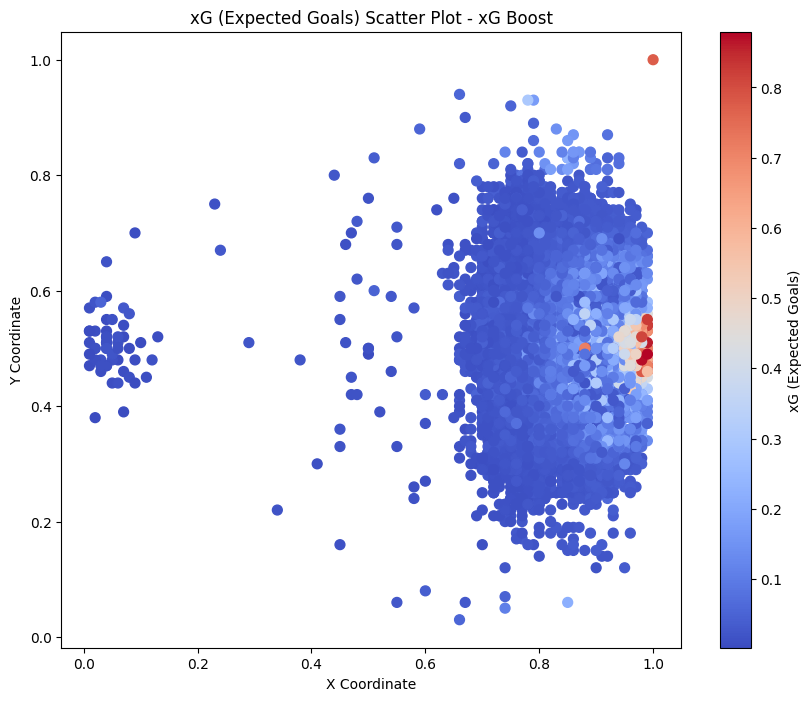

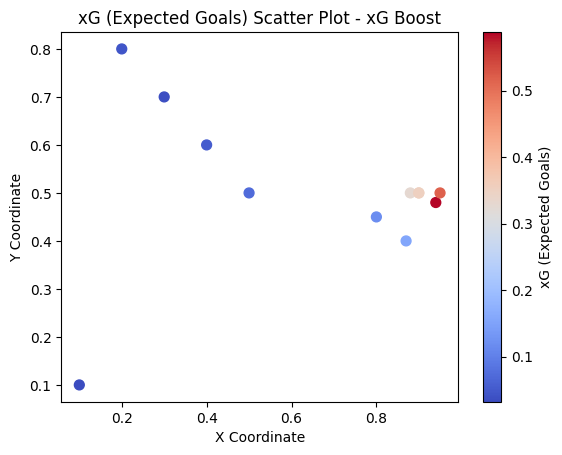

In [166]:
plt.figure(figsize=(10, 8))
# plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc'], cmap='coolwarm', s=50)
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot - xG Boost')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot - xG Boost')
plt.show()


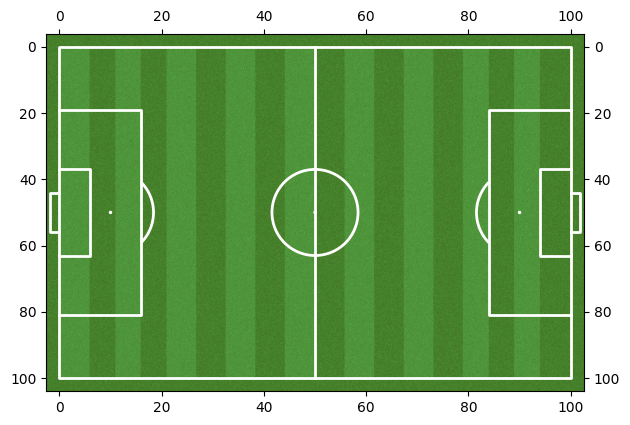

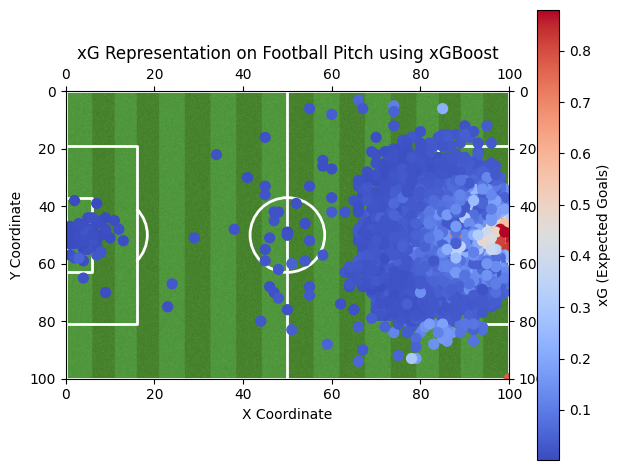

In [167]:
#Scatter plot on football pitch

def plot_football_pitch():
    #fig, ax = plt.subplots(figsize=(10, 6))
    pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
    fig, ax = pitch.draw()
    #plt.show()
    
    # Plotting the penalty spot
    #ax.scatter(0.885, 0.50, color='black', s=100)
    ax.scatter(88.5, 50, color='black', s=100)
    
    # Plotting the xG values
    sc = ax.scatter(X_test['X_coord']*100, X_test['Y_coord']*100, c=X_test['xG_calc'], cmap='coolwarm', s=50)
    #cbar = plt.colorbar(scatter, ax=ax, label='xG (Expected Goals)')
    
    # Set the axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('xG Representation on Football Pitch using xGBoost')
    
    cbar = plt.colorbar(sc)
    cbar.set_label('xG (Expected Goals)')
    
    plt.gca().invert_yaxis() 
    plt.show()

# Plotting the football pitch with xG values
pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
fig, ax = pitch.draw()
plt.show()
plot_football_pitch()

In [367]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [368]:
#LOGISTIC REGRESSION 
logreg_model = LogisticRegression(random_state=42)
logreg_model_s = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)
#logreg_model_s.fit(X_train_resampled, y_train_resampled)
#logreg_model_s.fit(X_train_scaled, y_train)
logreg_model_s.fit(X_train_scaled_resampled, y_train_resampled)


#Predicting xG values for both training and testing sets
xG_train = logreg_model.predict_proba(X_train)[:, 1]
# xG_test = logreg_model.predict_proba(X_test)[:, 1]

#SCALING RESAMPLED
# xG_train = logreg_model_s.predict_proba(X_train_resampled)[:, 1]
# xG_test = logreg_model_s.predict_proba(X_test)[:, 1]
#y_preds = logreg_model_s.predict(X_test)
y_preds = logreg_model_s.predict(X_test_scaled)
y_pred_proba = logreg_model_s.predict_proba(X_test_scaled)[:, 1]

# Combinining xG values for the entire dataset
#xG_all = logreg_model.predict_proba(features)[:, 1]
#xG_all = logreg_model_s.predict_proba(features)[:, 1]
xG_all = logreg_model_s.predict_proba(X_data_scaled)[:, 1] 
#data['xG_calc_LR'] = xG_all

print("Logistic Regression")

Logistic Regression


In [369]:
# Hyperparameter tuning using GridSearchCV
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10,50,100],
    'penalty': ['l1', 'l2']
}

# param_grid_LR = {
#     'C': [10],
#     'penalty': ['l2']
# }


grid_search_LR = GridSearchCV(logreg_model_s, param_grid_LR, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_LR.fit(X_train_scaled, y_train)

best_params_LR = grid_search_LR.best_params_
print("Best parameters:", best_params_LR)

# Training Logistic Regression model with the best parameters
# final_logreg_model = LogisticRegression(**best_params, random_state=42)
final_logreg_model = LogisticRegression(**best_params_LR,solver='lbfgs', max_iter=1000,random_state=42)
final_logreg_model.fit(X_train_scaled, y_train)

print("Trained on best parameters")


# Predicting xG values of scaled test set
hyper_preds_logreg = final_logreg_model.predict_proba(X_test_scaled)[:, 1]
hyper_logreg_preds = final_logreg_model.predict(X_test_scaled)

X_test['xG_calc_LR'] = hyper_preds_logreg




Best parameters: {'C': 100, 'penalty': 'l2'}
Trained on best parameters


In [370]:
print("Model Evaluation - LR")
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_preds)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)
#r2 = r2_score(y_test, y_preds)
#print("R-squared:", r2)



print("HYPER PARAMETER TUNING Model Evaluation - LOGISTIC REGRESSION")
accuracy = accuracy_score(y_test, hyper_logreg_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_logreg_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_logreg_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_logreg_preds)
roc_auc = roc_auc_score(y_test, hyper_logreg_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_logreg_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_logreg_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_logreg)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_logreg_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, hyper_logreg_preds)
print("Brier Score :", brier_score)
#r2 = r2_score(y_test, hyper_logreg_preds)
#print("R-squared:", r2)



Model Evaluation - LR
Accuracy: 0.79
Precision: 0.27
Recall: 0.58
ROC AUC: 0.70
Mean Squared Error: 0.21
F1 Score: 0.36525077993760496
Log Loss value : 0.4506832443511367
Confusion Matrix:
 [[8957 2094]
 [ 551  761]]
Brier Score : 0.2139448353959395
HYPER PARAMETER TUNING Model Evaluation - LOGISTIC REGRESSION
Accuracy: 0.90
Precision: 0.73
Recall: 0.11
ROC AUC: 0.55
Mean Squared Error: 0.10
F1 Score: 0.19324950363997354
Log Loss value : 0.27936545909585897
Confusion Matrix:
 [[10998    53]
 [ 1166   146]]
Brier Score : 0.09860066326943298


In [172]:
#LOGISTIC REGRESSION xG Function

def calculate_xG_LR(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_LR = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = logreg_model.predict_proba(new_data_LR)[0, 1]  
    #xG_probability = logreg_model_s.predict_proba(new_data_LR)[0, 1]
    #xg_prob = logreg_model_s.predict_proba(scaled_features)[:, 1]
    xg_prob = final_logreg_model.predict_proba(scaled_features)[:, 1]
    #new_data_LR['New xG']=xG_probability
    new_data_LR['New xG']=xg_prob
    return xg_prob[0],new_data_LR
    #return xG_probability, new_data_LR



new_xG_data_LR  = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])

player_name = "lionel messi"

#Parameters to test the Logistic Regression xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]





for params in parameter_sets:
    xG_probability, new_data_LR = calculate_xG_LR(*params)
    new_xG_data_LR=new_xG_data_LR.append(new_data_LR)

print("xG values of players wrt to the positions and features")
print(new_xG_data_LR[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])



xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall        New xG
0     0.88     0.50           1.00     94.0  3.912138e-01
0     0.90     0.50           1.00     94.0  4.585190e-01
0     0.94     0.48           0.96     94.0  5.482100e-01
0     0.90     0.50           1.00     94.0  4.526781e-01
0     0.95     0.50           1.00     94.0  4.223859e-01
0     0.87     0.40           0.80     94.0  1.764633e-01
0     0.80     0.45           0.90     94.0  1.164996e-01
0     0.50     0.50           1.00     94.0  3.386933e-03
0     0.40     0.60           0.80     94.0  3.432009e-04
0     0.30     0.70           0.60     94.0  3.468166e-05
0     0.20     0.80           0.40     94.0  3.503731e-06
0     0.10     0.10           0.20     94.0  2.927677e-07


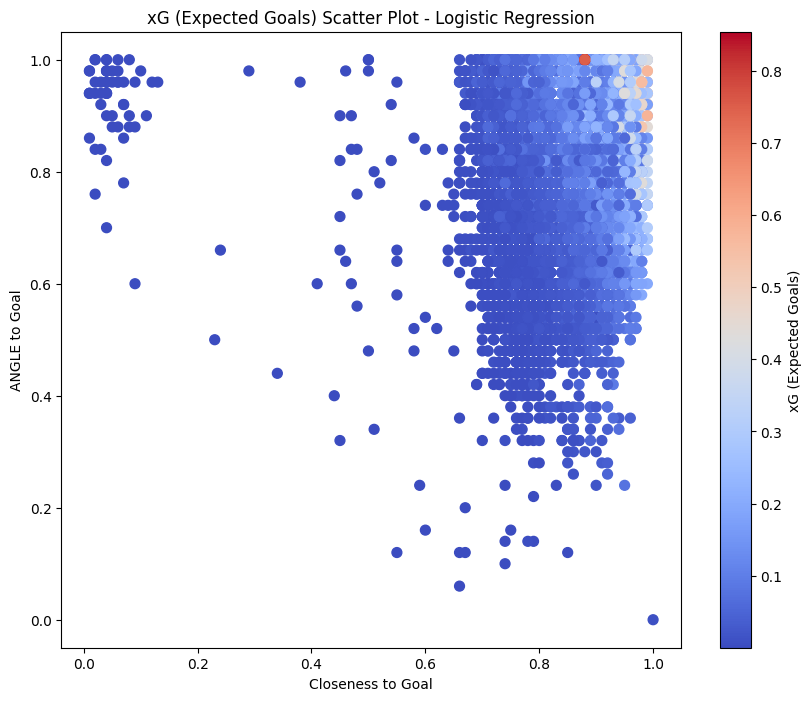

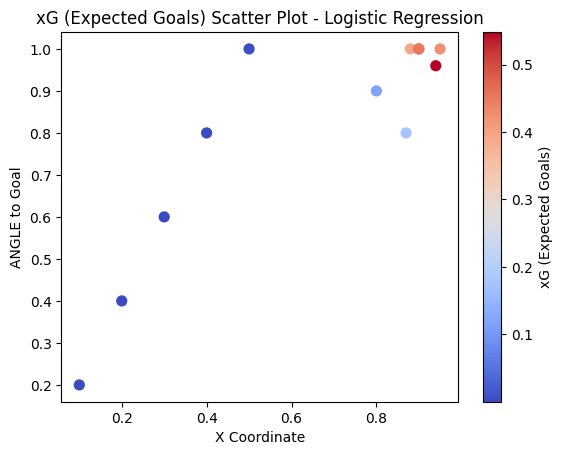

In [173]:
#Scatter plot displaying xG values with respect to Angle of the goal and distance to the goal
plt.figure(figsize=(10, 8))
# plt.scatter(data['X_coord'], data['Y_coord_angle'], c=data['xG_calc_LR'], cmap='coolwarm', s=50)
plt.scatter(X_test['X_coord'], X_test['Y_coord_angle'], c=X_test['xG_calc_LR'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('Closeness to Goal')
plt.ylabel('ANGLE to Goal')
plt.title('xG (Expected Goals) Scatter Plot - Logistic Regression')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord_angle'], c=new_xG_data_LR['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('ANGLE to Goal')
plt.title('xG (Expected Goals) Scatter Plot - Logistic Regression')
plt.show()


In [174]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [175]:
#RANDOM FORESTS MODEL 

random_forest_model = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest_model_s = RandomForestRegressor(n_estimators=100,random_state=42)


#Traning
random_forest_model.fit(X_train, y_train)
#random_forest_model_s.fit(X_train_resampled, y_train_resampled)
# random_forest_model_s.fit(X_train_scaled, y_train)
random_forest_model_s.fit(X_train_scaled_resampled, y_train_resampled)


#Predicting xG values for both training and testing sets
#xG_train = random_forest_model.predict_proba(X_train)[:, 1]
#xG_test = random_forest_model.predict_proba(X_test)[:, 1]
y_pred = random_forest_model.predict(X_test)

y_preds = random_forest_model_s.predict(X_test_scaled)
#y_preds = random_forest_model_s.predict_proba(X_test_scaled)[:, 1]

xG_all = y_preds
#data['xG_calc_RFR'] = xG_all
# X_test['xG_calc_RFR'] = xG_all

print("Random forests Regression")

Random forests Regression


In [176]:
# Definining hyperparameters 
# param_grid_random_forest= {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


param_grid_random_forest= {
    'n_estimators': [300],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}


# Hyperparameter tuning using GridSearchCV
grid_search_random_forest = GridSearchCV(random_forest_model_s, param_grid_random_forest, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_random_forest.fit(X_train_scaled, y_train)

# Getting the best Random Forests model
best_random_forest_model = grid_search_random_forest.best_estimator_
#hyper_preds_random_forest = best_random_forest_model.predict_proba(X_test_scaled)[:, 1]
hyper_random_forest_preds = best_random_forest_model.predict(X_test_scaled)


# Printing best parameters
print("Best Parameters:", grid_search_random_forest.best_params_)
print("Best Score:", grid_search_random_forest.best_score_)
#X_test['xG_calc_random_forest'] = hyper_preds_random_forest
X_test['xG_calc_RFR'] = hyper_random_forest_preds


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7948304433813135


In [177]:
print("Model Evaluation - RANDOM FORESTS REGRESSION")

y_pred_binary = np.where(y_preds > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_preds)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)
r2 = r2_score(y_test, y_preds)
print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)




print("RANDOM FORESTS REGRESSION Hyper Parameter Tuning Model Evaluation")

hyper_random_forest_preds = np.where(hyper_random_forest_preds > 0.5, 1, 0)

accuracy = accuracy_score(y_test, hyper_random_forest_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_random_forest_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_random_forest_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_random_forest_preds)
roc_auc = roc_auc_score(y_test, hyper_random_forest_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_random_forest_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_random_forest_preds)
print("F1 Score:", f1)
# log_loss_val = log_loss(y_test, hyper_random_forest_preds)
# print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_random_forest_preds)
print("Confusion Matrix:\n", conf_matrix)
r2 = r2_score(y_test, hyper_random_forest_preds)
print("R-squared:", r2)
brier_score = brier_score_loss(y_test, hyper_random_forest_preds)
print("Brier Score :", brier_score)

Model Evaluation - RANDOM FORESTS REGRESSION
Accuracy: 0.89
Precision: 0.45
Recall: 0.22
ROC AUC: 0.74
Mean Squared Error: 0.09
F1 Score: 0.2983706720977597
Log Loss value : 0.4767012736635838
Confusion Matrix:
 [[10692   359]
 [ 1019   293]]
R-squared: 0.0484235008567
Brier Score : 0.09026749348445329
RANDOM FORESTS REGRESSION Hyper Parameter Tuning Model Evaluation
Accuracy: 0.90
Precision: 0.66
Recall: 0.15
ROC AUC: 0.57
Mean Squared Error: 0.10
F1 Score: 0.25092707045735474
Confusion Matrix:
 [[10948   103]
 [ 1109   203]]
R-squared: -0.03345382053494772
Brier Score : 0.09803445765590876


In [178]:
#RANDOM FORESTS Model xG Function

def calculate_xG_RFR(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_RFR = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = random_forest_model.predict(new_data_RFR)  # Probability of scoring a goal
    #xG_probability = random_forest_model_s.predict(new_data_RFR)
    #xg_prob = random_forest_model_s.predict(scaled_features)
    xg_prob = best_random_forest_model.predict(scaled_features)
    #xG_probability = random_forest_model_s.predict_proba(new_data_RFR)[0, 1]
    #xg_prob = random_forest_model_s.predict_proba(scaled_features)[:, 1]
    #new_data_RFR['New xG']=xG_probability
    new_data_RFR['New xG']=xg_prob
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xG_probability)
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xg_prob[0])
    return xg_prob[0],new_data_RFR
    #return xG_probability, new_data_RFR



new_xG_data_RFR = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the Random forests xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]







for params in parameter_sets:
    xG_probability, new_data_RFR = calculate_xG_RFR(*params)
    new_xG_data_RFR=new_xG_data_RFR.append(new_data_RFR)

print("xG values of players wrt to the positions and features")
print(new_xG_data_RFR[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]].head(5))






xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.321601
0     0.90     0.50           1.00     94.0  0.336544
0     0.94     0.48           0.96     94.0  0.616746
0     0.90     0.50           1.00     94.0  0.344923
0     0.95     0.50           1.00     94.0  0.462867


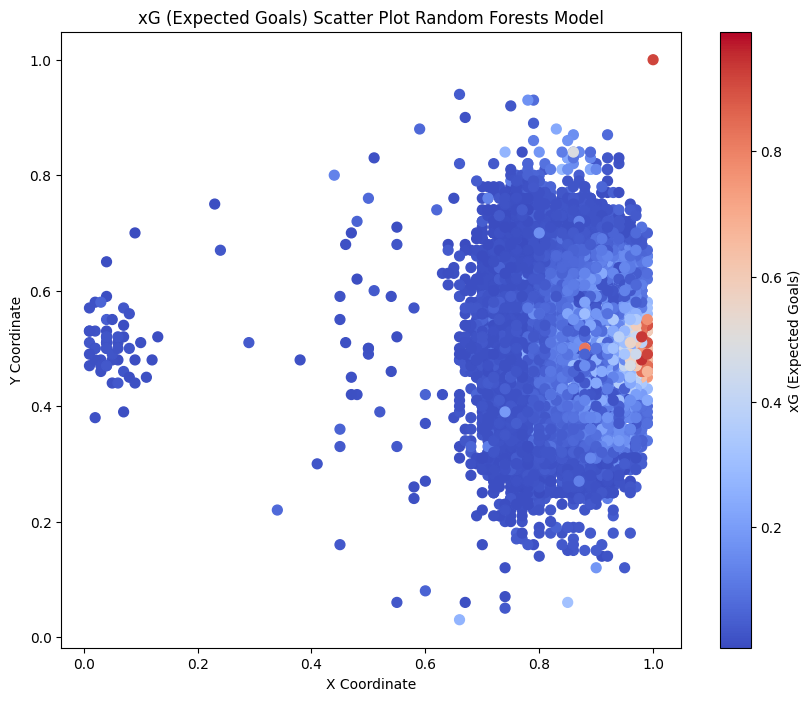

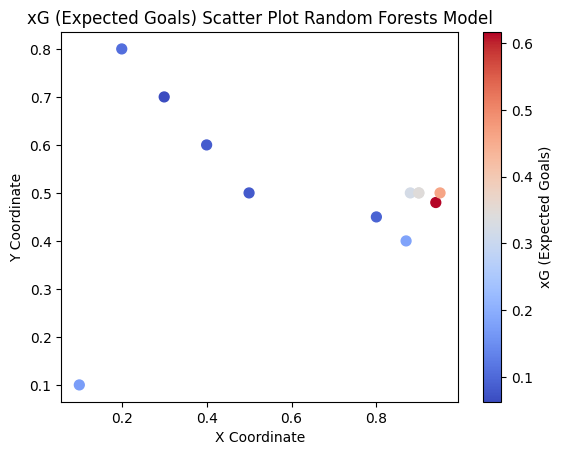

In [179]:
#Scatter plot displaying xG values obatined from Random forests with respect to Angle of the goal & distance to the goal
plt.figure(figsize=(10, 8))
# plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_RFR'], cmap='coolwarm', s=50)
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_RFR'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot Random Forests Model')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_RFR['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot Random Forests Model')
plt.show()


In [180]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [181]:
#Random forests classifier model

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model_s = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train, y_train)
#rf_model_s.fit(X_train_resampled, y_train_resampled)
# rf_model_s.fit(X_train_scaled, y_train)
rf_model_s.fit(X_train_scaled_resampled, y_train_resampled)


#Predicting xG values for both training and testing sets
xG_train = rf_model.predict_proba(X_train)[:, 1]
xG_test = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

#SCALING RESAMPLED
#y_preds = rf_model_s.predict(X_test)
y_preds = rf_model_s.predict(X_test_scaled)

# Combinining xG values for the entire dataset
#xG_all = rf_model_s.predict_proba(features)[:, 1]
#xG_all = rf_model.predict_proba(features)[:, 1]
#xG_all = rf_model_s.predict_proba(X_data_scaled)[:, 1] 
xG_all = rf_model_s.predict_proba(X_test_scaled)[:, 1]
# data['xG_calc_RFC'] = xG_all
# X_test['xG_calc_RFC'] = xG_all

print("Random Forests Classifier")

Random Forests Classifier


In [182]:
# Defining hyperparameters 
# param_grid_rf= {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


param_grid_rf= {
    'n_estimators': [300],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


# Performing hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(rf_model_s, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_scaled_resampled, y_train_resampled)

# Getting the best Random Forests model
best_rf_model = grid_search_rf.best_estimator_
hyper_preds_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
hyper_rf_preds = best_rf_model.predict(X_test_scaled)


# Printing best parameters and score from hyperparameter tuning
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)
X_test['xG_calc_RFC'] = hyper_preds_rf


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.977336139065209


In [183]:
print("Model Evaluation - RANDOM FORESTS CLASSIFIER")

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_preds)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)
# log_loss_val = log_loss(y_test, y_preds)
# print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
#r2 = r2_score(y_test, y_preds)
#print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)



print("RANDOM FORESTS CLASSIFIER Hyper Parameter tuned Model Evaluation")

accuracy = accuracy_score(y_test, hyper_rf_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_rf_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_rf_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_rf_preds)
roc_auc = roc_auc_score(y_test, hyper_rf_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_rf_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_rf_preds)
print("F1 Score:", f1)
# log_loss_val = log_loss(y_test, hyper_rf_preds)
# print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_rf_preds)
print("Confusion Matrix:\n", conf_matrix)
#r2 = r2_score(y_test, hyper_rf_preds)
#print("R-squared:", r2)
brier_score = brier_score_loss(y_test, hyper_rf_preds)
print("Brier Score :", brier_score)

Model Evaluation - RANDOM FORESTS CLASSIFIER
Accuracy: 0.88
Precision: 0.42
Recall: 0.27
ROC AUC: 0.61
Mean Squared Error: 0.12
F1 Score: 0.3297823066234368
Confusion Matrix:
 [[10560   491]
 [  956   356]]
Brier Score : 0.11704278896707919
RANDOM FORESTS CLASSIFIER Hyper Parameter tuned Model Evaluation
Accuracy: 0.88
Precision: 0.42
Recall: 0.27
ROC AUC: 0.61
Mean Squared Error: 0.12
F1 Score: 0.32869080779944293
Confusion Matrix:
 [[10563   488]
 [  958   354]]
Brier Score : 0.11696190245086144


In [184]:
#RANDOM FORESTS CLASSIFIER xG Function

def calculate_xG_RFC(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_RFC = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = rf_model_s.predict_proba(new_data_RFC)[0, 1]
    #xg_prob = rf_model_s.predict(scaled_features)
    #xG_probability = rf_model.predict_proba(new_data_RFC)[0, 1]
    #xg_prob = rf_model_s.predict_proba(scaled_features)[:, 1]
    xg_prob = best_rf_model.predict_proba(scaled_features)[:, 1]
    #new_data_RFC['New xG']=xG_probability
    new_data_RFC['New xG']=xg_prob
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xG_probability)
    #print("xG probability: pos x",position_x,", pos y",position_y,", is_pen",is_penalty,", is_head",is_header,", is_home",is_home,":",xg_prob[0])
    return xg_prob[0],new_data_RFC
    #return xG_probability, new_data_RFC



new_xG_data_RFC = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the Random forests xG function

parameter_sets = [
    (0.85, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.91, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.97, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]







for params in parameter_sets:
    xG_probability, new_data_RFC = calculate_xG_RFC(*params)
    new_xG_data_RFC=new_xG_data_RFC.append(new_data_RFC)
    
print("xG values of players wrt to the positions and features")
print(new_xG_data_RFC[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]].head(5))



xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.85     0.50           1.00     94.0  0.508889
0     0.91     0.50           1.00     94.0  0.653333
0     0.94     0.48           0.96     94.0  0.800000
0     0.97     0.50           1.00     94.0  0.500000
0     0.95     0.50           1.00     94.0  0.476667


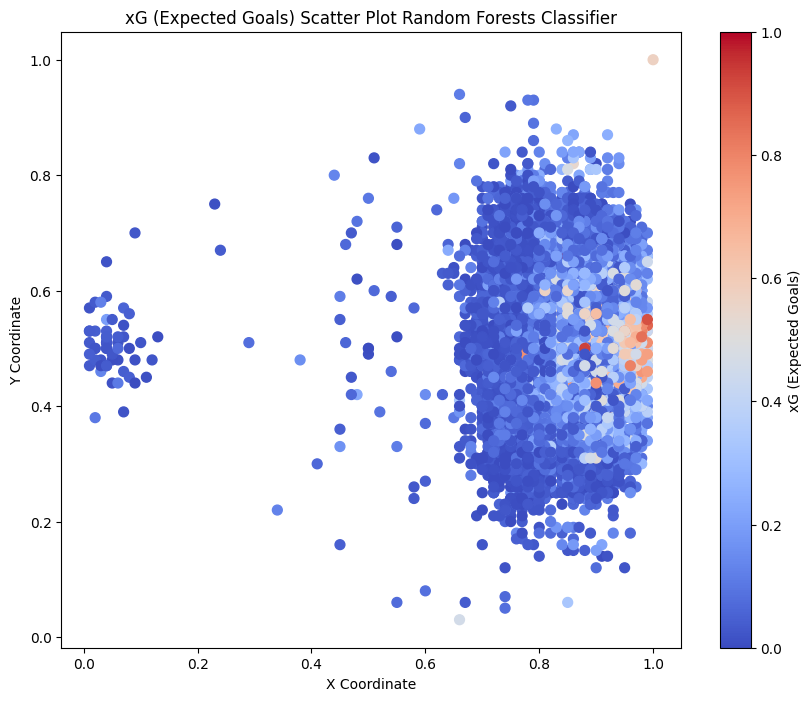

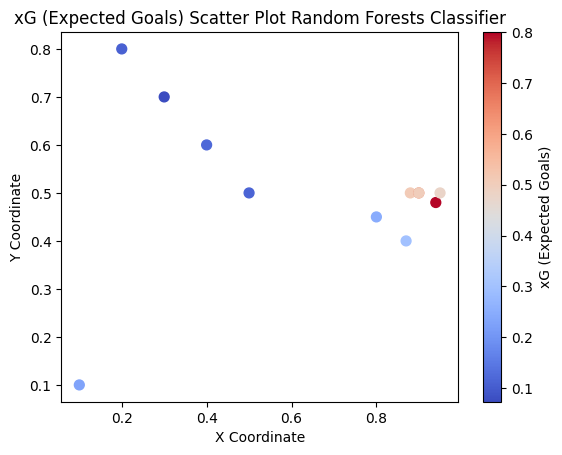

In [185]:
#Scatter plot displaying xG values obatined from Random forests with respect to Angle of the goal & distance to the goal

plt.figure(figsize=(10, 8))
#plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_RFC'], cmap='coolwarm', s=50
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_RFC'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot Random Forests Classifier')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_RFC['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot Random Forests Classifier')
plt.show()


In [319]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [320]:
# ARTIFICIAL NEURAL NETWORK


#---------------------------------------------------------------------------------------------------------
#SCALED SAMPLED



ann_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled_resampled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train_scaled_resampled, y_train_resampled, epochs=50, batch_size=32, verbose=1)

#xG_all = ann_model.predict(features)
#xG_all = ann_model.predict(X_data_scaled)
xG_all = ann_model.predict(X_test_scaled)
#xG_all = ann_model.predict_proba(X_data_scaled)[:, 1]  
# data['xG_calc_ANN'] = xG_all
X_test['xG_calc_ANN'] = xG_all

# y_pred_proba = ann_model.predict_proba(X_test_scaled)[:, 1]  
y_pred = ann_model.predict(X_test_scaled)


print("ARTIFICIAL NEURAL NETWORK")



Epoch 1/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.4520 - accuracy: 0.7798
Epoch 2/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.4159 - accuracy: 0.8027
Epoch 3/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.4112 - accuracy: 0.8050
Epoch 4/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.4064 - accuracy: 0.8074
Epoch 5/50
2730/2730 [==============================] - 4s 2ms/step - loss: 0.4035 - accuracy: 0.8099
Epoch 6/50
2730/2730 [==============================] - 4s 2ms/step - loss: 0.4004 - accuracy: 0.8124
Epoch 7/50
2730/2730 [==============================] - 4s 2ms/step - loss: 0.3984 - accuracy: 0.8145
Epoch 8/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.3959 - accuracy: 0.8161
Epoch 9/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.3934 - accuracy: 0.8177
Epoch 10/50
2730/2730 [==============================] - 4s 1ms/step - loss: 0.391

In [321]:
# Initializing the ANN model
ann_model_s = MLPClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
# param_grid_ANN = {
#     'hidden_layer_sizes': [(100,), (50, 50), (50, 30, 10)],
#     'alpha': [0.0001, 0.001, 0.01],
#     'activation': ['relu', 'logistic']
# }


param_grid_ANN = {
    'hidden_layer_sizes': [(50, 50)],
    'alpha': [0.001],
    'activation': ['relu']
}




#Initializing the GridSearchCV object
grid_search_ANN = GridSearchCV(ann_model_s, param_grid_ANN, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_ANN.fit(X_train_scaled_resampled, y_train_resampled)

# Getting the best parameters and best model
best_params_ANN = grid_search_ANN.best_params_
best_ann_model = grid_search_ANN.best_estimator_

# Predicting xG probabilities
hyper_preds_ann = best_ann_model.predict_proba(X_test_scaled)[:, 1]
hyper_ann_preds = best_ann_model.predict(X_test_scaled)

print(best_params_ANN)

#X_test['xG_calc_ANN'] = hyper_preds_ann

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}


In [318]:
print("Model Evaluation - ARTIFICIAL NEURAL NETWORK")

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)



print("ANN MODEL HYPER PARAMETER TUNING Model Evaluation -")
accuracy = accuracy_score(y_test, hyper_ann_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_ann_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_ann_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_ann_preds)
roc_auc = roc_auc_score(y_test, hyper_ann_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_ann_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_ann_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_ann)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_ann_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, hyper_ann_preds)
print("Brier Score :", brier_score)



Model Evaluation - ARTIFICIAL NEURAL NETWORK
Accuracy: 0.90
Precision: 0.67
Recall: 0.17
ROC AUC: 0.58
Mean Squared Error: 0.10
F1 Score: 0.2770719903206291
Log Loss value : 3.4839574375147615
Confusion Matrix:
 [[10939   112]
 [ 1083   229]]
ANN MODEL HYPER PARAMETER TUNING Model Evaluation -
Accuracy: 0.80
Precision: 0.28
Recall: 0.56
ROC AUC: 0.70
Mean Squared Error: 0.20
F1 Score: 0.37585594724828814
Log Loss value : 0.4272372926622325
Confusion Matrix:
 [[9161 1890]
 [ 571  741]]
Brier Score : 0.19906171641187415


In [190]:
#ARTIFICIAL NEURAL NETWORK xG Function

def calculate_xG_ANN(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_ANN = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    xg_prob = ann_model.predict(scaled_features)
    #xg_prob = best_ann_model.predict_proba(scaled_features)[:, 1]
    #new_data_ANN['New xG']=xG_probability
    new_data_ANN['New xG']=xg_prob
    return xg_prob,new_data_ANN
    #return xG_probability, new_data_ANN



new_xG_data_ANN = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the ANN xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]






for params in parameter_sets:
    xG_probability, new_data_ANN = calculate_xG_ANN(*params)
    new_xG_data_ANN=new_xG_data_ANN.append(new_data_ANN)

print("ANN Model - xG values of players wrt to the positions and features")
print(new_xG_data_ANN[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])


    



1/1 [==============================] - 0s 23ms/step
ANN Model - xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.725289
0     0.90     0.50           1.00     94.0  0.801177
0     0.94     0.48           0.96     94.0  0.943151
0     0.90     0.50           1.00     94.0  0.755097
0     0.95     0.50           1.00     94.0  0.703453
0     0.87     0.40           0.80     94.0  0.754427
0     0.80     0.45           0.90     94.0  0.500752
0     0.50     0.50           1.00     94.0  0.001793
0     0.40     0.60           0.80     94.0  0.001142
0     0.30     0.70           0.60     94.0  0.000048
0     0.20     0.80           0.40     94.0  0.000005
0     0.10     0.10           0.20     94.0  0.000409


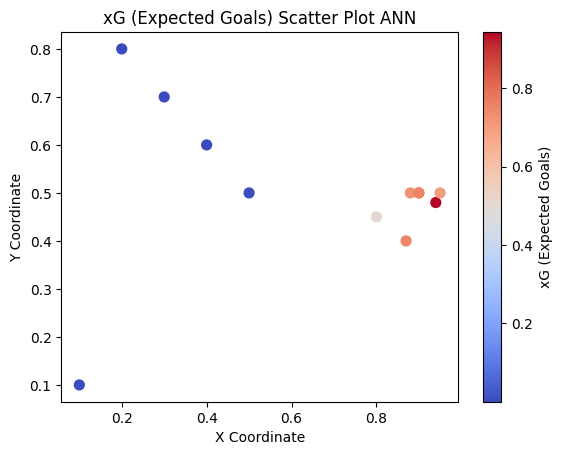

In [191]:
# plt.figure(figsize=(10, 8))
# # plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_ANN'], cmap='coolwarm', s=50)
# plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_ANN'], cmap='coolwarm', s=50)
# plt.colorbar(label='xG (Expected Goals)')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('xG (Expected Goals) Scatter Plot ANN')
# plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_ANN['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot ANN')
plt.show()


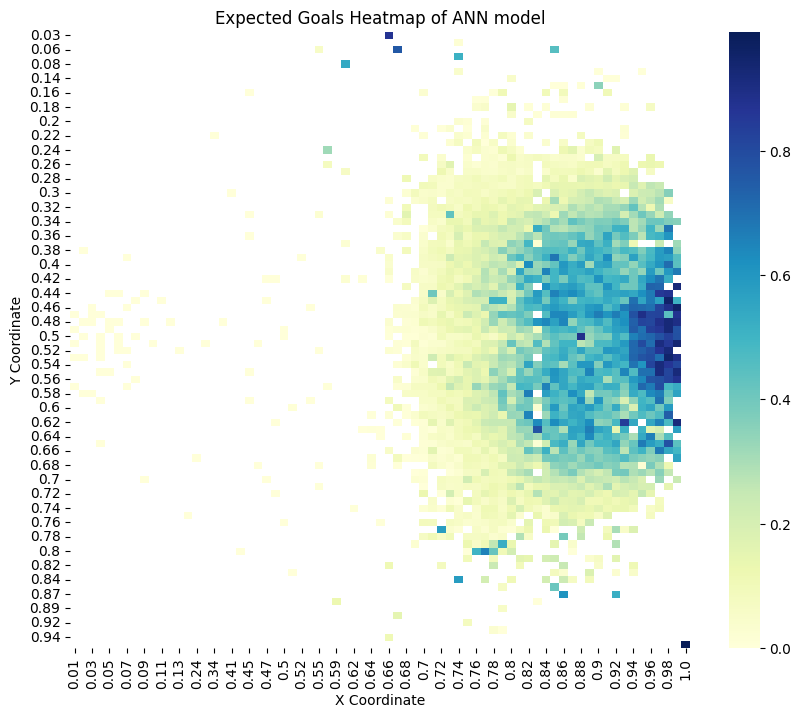

In [192]:
# Aggregate duplicate entries by calculating the mean
X_test = X_test.groupby(["X_coord", "Y_coord"])["xG_calc_ANN"].mean().reset_index()


# Pivot the data for heatmap
heatmap_data = X_test.pivot(index='Y_coord', columns='X_coord', values='xG_calc_ANN')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu",  fmt=".2f", cbar=True)

# Set axis labels and plot title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Expected Goals Heatmap of ANN model")

# Show the plot
plt.show()




In [193]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [300]:
#LIGHT GRADIENT BOOSTING MODEL LIGHTGBM

# Buildig LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model_s = lgb.LGBMClassifier(random_state=42)


lgb_model.fit(X_train, y_train)
#lgb_model_s.fit(X_train_resampled,y_train_resampled)
# lgb_model_s.fit(X_train_scaled, y_train)
lgb_model_s.fit(X_train_scaled_resampled, y_train_resampled)


# Predicting xG values for both training and testing sets
y_pred = lgb_model.predict(X_test)
#y_preds = lgb_model_s.predict(X_test)
y_preds = lgb_model_s.predict(X_test_scaled)



# Combinining xG values for the entire dataset
#xG_all = lgb_model.predict_proba(features)[:, 1]
#xG_all = lgb_model_s.predict_proba(features)[:, 1]
#xG_all = lgb_model_s.predict_proba(X_data_scaled)[:, 1]  # Directly use predict_proba on the scaled features
#xG_all = lgb_model_s.predict(X_data_scaled)
# xG_all = lgb_model_s.predict_proba(X_data_scaled)[:, 1]
y_pred_proba = lgb_model_s.predict_proba(X_test_scaled)[:, 1]
xG_all = lgb_model_s.predict_proba(X_test_scaled)[:, 1]
# data['xG_calc_LGB'] = xG_all
X_test['xG_calc_LGB'] = xG_all


print("LIGHT GRADIENT BOOSTING MODEL Prediction")

[LightGBM] [Info] Number of positive: 5246, number of negative: 44204
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 49450, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106087 -> initscore=-2.131349
[LightGBM] [Info] Start training from score -2.131349
[LightGBM] [Info] Number of positive: 44204, number of negative: 43139
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 87343, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506097 -> initscore=0.024388

In [301]:
#LIGHT GRADIENT BOOSTING MODEL HYPER PARAMETER TUNING


# Hyperparameter tuning
param_grid_LGM = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add more hyperparameters to tune
}

# Initializing GridSearchCV
grid_search_LGM = GridSearchCV(lgb_model_s, param_grid_LGM, cv=3, scoring='roc_auc', n_jobs=-1)
# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
#grid_search.fit(X_train_scaled, y_train_resampled)
grid_search_LGM.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search_LGM.best_params_)

# Initializing  XGBoost model 
best_params_LGM = grid_search_LGM.best_params_
final_lgb_model = lgb.LGBMClassifier(**best_params_LGM, random_state=42)
# final_xgb_model.fit(X_train_scaled, y_train_resampled)
final_lgb_model.fit(X_train_scaled, y_train)

# Predict xG values
hyper_preds_lgb = final_lgb_model.predict_proba(X_test_scaled)[:, 1]
hyper_lgb_preds = final_lgb_model.predict(X_test_scaled)

X_test['xG_calc_LGB'] = hyper_preds_lgb



xG_all = final_lgb_model.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_LGB'] = xG_all

print("xG values Copied into dataframe")


[LightGBM] [Info] Number of positive: 5246, number of negative: 44204
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 49450, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106087 -> initscore=-2.131349
[LightGBM] [Info] Start training from score -2.131349
Best Parameters: {'learning_rate': 0.1, 'num_leaves': 31}
[LightGBM] [Info] Number of positive: 5246, number of negative: 44204
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the trai

In [302]:
print("Model Evaluation metrics - LIGHTGBM ")

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_preds)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
# r2 = r2_score(y_test, y_preds)
# print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)


print("LIGHT GRADIENT BOOSTING MODEL HYPER PARAMETER TUNING Model Evaluation -")
accuracy = accuracy_score(y_test, hyper_lgb_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_lgb_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_lgb_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_lgb_preds)
roc_auc = roc_auc_score(y_test, hyper_lgb_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_lgb_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_lgb_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_lgb)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_lgb_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, hyper_lgb_preds)
print("Brier Score :", brier_score)
#r2 = r2_score(y_test, hyper_lgb_preds)
#print("R-squared:", r2)


Model Evaluation metrics - LIGHTGBM 
Accuracy: 0.90
Precision: 0.56
Recall: 0.23
ROC AUC: 0.60
Mean Squared Error: 0.10
F1 Score: 0.3263101026472177
Log Loss value : 0.2828613678056224
Confusion Matrix:
 [[10814   237]
 [ 1010   302]]
Brier Score : 0.1008654857235299
LIGHT GRADIENT BOOSTING MODEL HYPER PARAMETER TUNING Model Evaluation -
Accuracy: 0.90
Precision: 0.67
Recall: 0.17
ROC AUC: 0.58
Mean Squared Error: 0.10
F1 Score: 0.27690447400241835
Log Loss value : 0.27069628466678625
Confusion Matrix:
 [[10938   113]
 [ 1083   229]]
Brier Score : 0.09674027339642481


In [303]:
#LIGHTGBM xG Function

def calculate_xG_LGM(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_LGM = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = lgb_model.predict_proba(new_data_LGM)[0, 1]  # Probability of scoring a goal
    #xG_probability = lgb_model_s.predict_proba(new_data_LGM)[0, 1]
    #xg_prob = lgb_model_s.predict_proba(scaled_features)[:, 1]
    xg_prob = final_lgb_model.predict_proba(scaled_features)[:, 1]
    #new_data_LGM['New xG']=xG_probability
    new_data_LGM['New xG']=xg_prob
    return xg_prob[0],new_data_LGM
    #return xG_probability, new_data_LGM



new_xG_data_LGM = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the LGB model xG function


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]



for params in parameter_sets:
    xG_probability, new_data_LGM = calculate_xG_LGM(*params)
    new_xG_data_LGM=new_xG_data_LGM.append(new_data_LGM)

print("Light Gradient BoostingS Model - xG values of players wrt to the positions and features")
print(new_xG_data_LGM[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])





Light Gradient BoostingS Model - xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.358413
0     0.90     0.50           1.00     94.0  0.373577
0     0.94     0.48           0.96     94.0  0.625195
0     0.90     0.50           1.00     94.0  0.373577
0     0.95     0.50           1.00     94.0  0.527041
0     0.87     0.40           0.80     94.0  0.148503
0     0.80     0.45           0.90     94.0  0.125292
0     0.50     0.50           1.00     94.0  0.029257
0     0.40     0.60           0.80     94.0  0.023238
0     0.30     0.70           0.60     94.0  0.010460
0     0.20     0.80           0.40     94.0  0.020470
0     0.10     0.10           0.20     94.0  0.013975


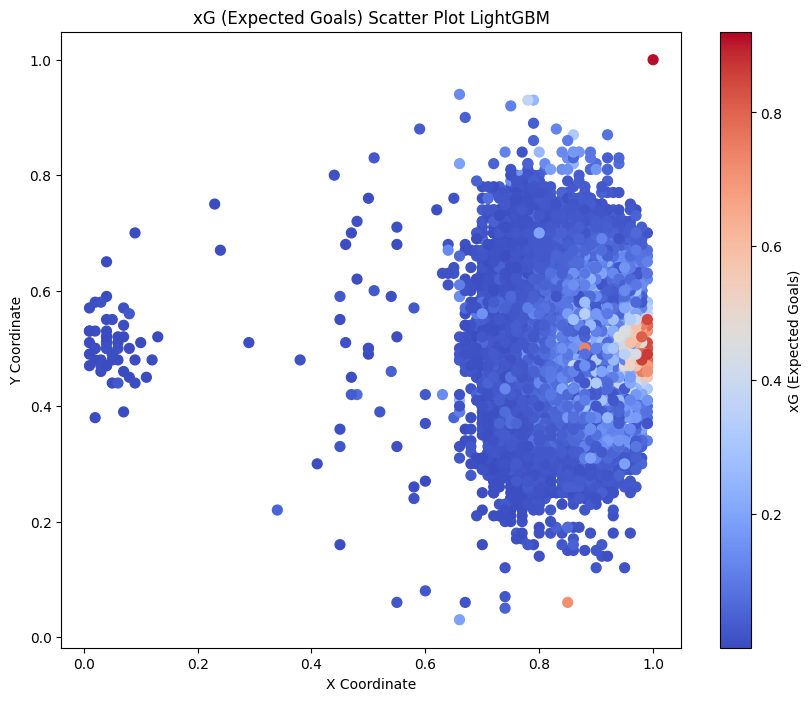

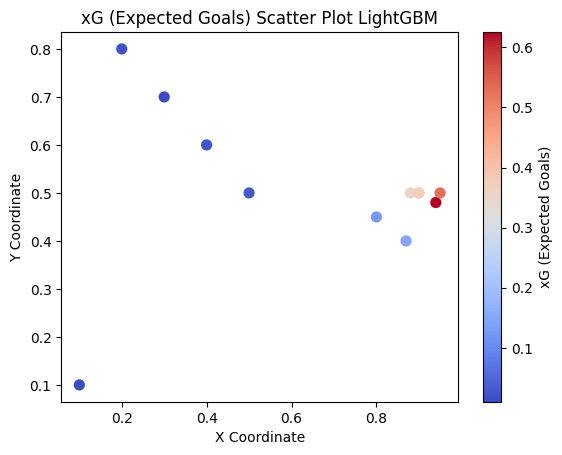

In [304]:
plt.figure(figsize=(10, 8))
# plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_LGM'], cmap='coolwarm', s=50)
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_LGB'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot LightGBM')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_LGM['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot LightGBM')
plt.show()


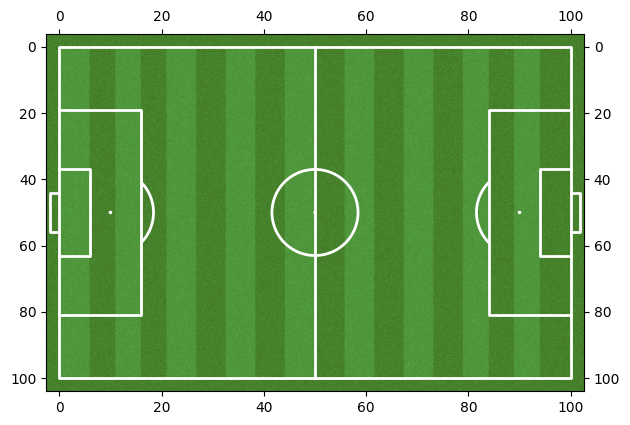

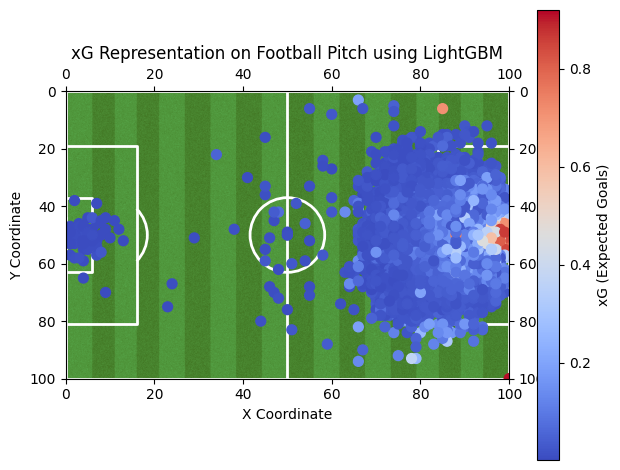

In [305]:
#Scatter plot on football pitch

def plot_football_pitch():
    #fig, ax = plt.subplots(figsize=(10, 6))
    pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
    fig, ax = pitch.draw()
    #plt.show()
    
    # Plotting the penalty spot
    #ax.scatter(0.885, 0.50, color='black', s=100)
    ax.scatter(88.5, 50, color='black', s=100)
    
    # Plotting the xG values
    sc = ax.scatter(X_test['X_coord']*100, X_test['Y_coord']*100, c=X_test['xG_calc_LGB'], cmap='coolwarm', s=50)
    #cbar = plt.colorbar(scatter, ax=ax, label='xG (Expected Goals)')
    
    # Set the axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('xG Representation on Football Pitch using LightGBM')
    
    cbar = plt.colorbar(sc)
    cbar.set_label('xG (Expected Goals)')
    
    plt.gca().invert_yaxis() 
    plt.show()

# Plotting the football pitch with xG values
pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
fig, ax = pitch.draw()
plt.show()
plot_football_pitch()

In [200]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [201]:
#ADABOOST MODEL

# Building ADABOOST model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model_s = AdaBoostClassifier(random_state=42)


adaboost_model.fit(X_train, y_train)
#adaboost_model_s.fit(X_train_resampled,y_train_resampled)
#adaboost_model_s.fit(X_train_scaled, y_train)
adaboost_model_s.fit(X_train_scaled_resampled, y_train_resampled)


# Predicting xG values for both training and testing sets
y_pred = adaboost_model.predict(X_test)
#y_preds = adaboost_model_s.predict(X_test)
y_preds = adaboost_model_s.predict(X_test_scaled)


y_pred_proba = adaboost_model_s.predict_proba(X_test_scaled)[:, 1]
xG_all =  adaboost_model_s.predict(X_test_scaled)
#X_test['xG_calc_ADABOOST'] = xG_all

#data['xG_calc_ADABOOST'] = xG_all

print("ADABOOST MODEL Prediction")

ADABOOST MODEL Prediction


In [202]:
#ADABOOST MODEL HYPER PARAMETER TUNING

# Hyperparameter tuning
# param_grid_ADA = {
#     'n_estimators': [50, 100, 200,300,500],
#     'learning_rate': [0.01, 0.1, 0.2,0.3,0.5],
#     # Add more hyperparameters to tune
# }

param_grid_ADA = {
    'n_estimators': [500],
    'learning_rate': [0.5],
    # Add more hyperparameters to tune
}

# Initializing GridSearchCV
grid_search_ADA = GridSearchCV(adaboost_model_s, param_grid_ADA, cv=3, scoring='roc_auc', n_jobs=-1)
# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
#grid_search.fit(X_train_scaled, y_train_resampled)
grid_search_ADA.fit(X_train_scaled_resampled, y_train_resampled)

# Printing best parameters
print("Best Parameters:", grid_search_ADA.best_params_)

# Initializing the XGBoost model with best parameters
best_params_ADA = grid_search_ADA.best_params_
final_adaboost_model = AdaBoostClassifier(**best_params_ADA, random_state=42)
# final_xgb_model.fit(X_train_scaled, y_train_resampled)
final_adaboost_model.fit(X_train_scaled_resampled, y_train_resampled)

# Predicting xG values on the scaled test set
hyper_preds_adaboost = final_adaboost_model.predict_proba(X_test_scaled)[:, 1]
hyper_adaboost_preds = final_adaboost_model.predict(X_test_scaled)

X_test['xG_calc_adaboost'] = hyper_preds_adaboost



Best Parameters: {'learning_rate': 0.5, 'n_estimators': 500}


In [203]:
print("Model Evaluation metrics - ADABOOST Model ")


y_preds = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_preds)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
# r2 = r2_score(y_test, y_preds)
# print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)





print("ADABOOST MODEL HYPER PARAMETER TUNING Model Evaluation -")
accuracy = accuracy_score(y_test, hyper_adaboost_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_adaboost_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_adaboost_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_adaboost_preds)
roc_auc = roc_auc_score(y_test, hyper_adaboost_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_adaboost_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_adaboost_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_adaboost)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_adaboost_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, hyper_adaboost_preds)
print("Brier Score :", brier_score)
#r2 = r2_score(y_test, hyper_adaboost_preds)
#print("R-squared:", r2)


Model Evaluation metrics - ADABOOST Model 
Accuracy: 0.79
Precision: 0.27
Recall: 0.54
ROC AUC: 0.68
Mean Squared Error: 0.21
F1 Score: 0.35681932561650737
Log Loss value : 0.680381642820048
Confusion Matrix:
 [[9098 1953]
 [ 603  709]]
Brier Score : 0.20674593545256006
ADABOOST MODEL HYPER PARAMETER TUNING Model Evaluation -
Accuracy: 0.85
Precision: 0.32
Recall: 0.42
ROC AUC: 0.66
Mean Squared Error: 0.15
F1 Score: 0.36593479707252163
Log Loss value : 0.6900655475152486
Confusion Matrix:
 [[9907 1144]
 [ 762  550]]
Brier Score : 0.15416969991102483


In [204]:
#ADABOOST xG Function

def calculate_xG_adaboost(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_adaboost = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = adaboost_model.predict_proba(new_data_adaboost)[0, 1]  # Probability of scoring a goal
    #xG_probability = adaboost_model_s.predict_proba(new_data_adaboost)[0, 1]
    #xg_prob = adaboost_model_s.predict_proba(scaled_features)[:, 1]
    xg_prob = final_adaboost_model.predict_proba(scaled_features)[:, 1]
    #new_data_adaboost['New xG']=xG_probability
    new_data_adaboost['New xG']=xg_prob
    return xg_prob[0],new_data_adaboost
    #return xG_probability, new_data_adaboost



new_xG_data_adaboost  = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the Adaboost model xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]






# new_xG_data_adaboost = []

for params in parameter_sets:
    xG_probability, new_data_adaboost = calculate_xG_adaboost(*params)
    new_xG_data_adaboost=new_xG_data_adaboost.append(new_data_adaboost)


print("AdaBoost Model - xG values of players wrt to the positions and features")
print(new_xG_data_adaboost[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]].head(5))





AdaBoost Model - xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.500281
0     0.90     0.50           1.00     94.0  0.500402
0     0.94     0.48           0.96     94.0  0.501687
0     0.90     0.50           1.00     94.0  0.500939
0     0.95     0.50           1.00     94.0  0.499755


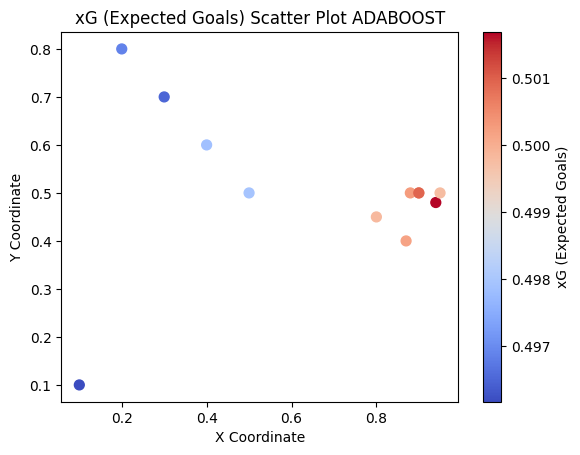

In [205]:
# plt.figure(figsize=(10, 8))
# # plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_ADABOOST'], cmap='coolwarm', s=50)
# plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=hyper_preds_adaboost, cmap='coolwarm', s=50)
# plt.colorbar(label='xG (Expected Goals)')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('xG (Expected Goals) Scatter Plot')
# plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_adaboost['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot ADABOOST')
plt.show()


In [206]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [207]:
#catboost MODEL

# Building catboost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model_s = CatBoostClassifier(random_state=42)


#catboost_model.fit(X_train, y_train)
#catboost_model_s.fit(X_train_resampled,y_train_resampled)
catboost_model_s.fit(X_train_scaled, y_train)
catboost_model.fit(X_train_scaled_resampled, y_train_resampled)


# Predicting xG values for both training and testing sets
y_pred = catboost_model.predict(X_test)
#y_preds = catboost_model_s.predict(X_test)
y_preds = catboost_model_s.predict(X_test_scaled)

y_pred_proba = catboost_model_s.predict_proba(X_test_scaled)[:, 1]
xG_all = catboost_model_s.predict_proba(X_test_scaled)[:, 1] 
#data['xG_calc_catboost'] = xG_all
#X_test['xG_calc_catboost'] = xG_all



print("catboost MODEL Prediction")
print(xG_all)

Learning rate set to 0.054493
0:	learn: 0.6392470	total: 158ms	remaining: 2m 37s
1:	learn: 0.5935498	total: 165ms	remaining: 1m 22s
2:	learn: 0.5546379	total: 172ms	remaining: 57.1s
3:	learn: 0.5187963	total: 179ms	remaining: 44.6s
4:	learn: 0.4877771	total: 187ms	remaining: 37.3s
5:	learn: 0.4628161	total: 197ms	remaining: 32.7s
6:	learn: 0.4419568	total: 208ms	remaining: 29.6s
7:	learn: 0.4221638	total: 217ms	remaining: 26.9s
8:	learn: 0.4076184	total: 226ms	remaining: 24.9s
9:	learn: 0.3937311	total: 234ms	remaining: 23.2s
10:	learn: 0.3800343	total: 243ms	remaining: 21.8s
11:	learn: 0.3688502	total: 250ms	remaining: 20.6s
12:	learn: 0.3594179	total: 258ms	remaining: 19.6s
13:	learn: 0.3505095	total: 266ms	remaining: 18.7s
14:	learn: 0.3419150	total: 274ms	remaining: 18s
15:	learn: 0.3344436	total: 282ms	remaining: 17.4s
16:	learn: 0.3276481	total: 290ms	remaining: 16.7s
17:	learn: 0.3214030	total: 297ms	remaining: 16.2s
18:	learn: 0.3161090	total: 304ms	remaining: 15.7s
19:	learn: 

In [208]:
#catBOOST MODEL HYPER PARAMETER TUNING

# Hyperparameter tuning
# Define the parameter grid for tuning
# param_grid_cat= {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'depth': [4, 6, 8]
# }

param_grid_cat= {
    'iterations': [300],
    'learning_rate': [0.1],
    'depth': [8]
}
# Initializing GridSearchCV
grid_search_cat = GridSearchCV(catboost_model_s, param_grid_cat, cv=3, scoring='roc_auc', n_jobs=-1)
# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# grid_search = GridSearchCV(xgb_s, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_cat.fit(X_train_scaled, y_train)
# grid_search_cat.fit(X_train_scaled_resampled, y_train_resampled)



# Initializing the CatBoost model with best parameters
best_params_cat = grid_search_cat.best_params_
final_catboost_model = CatBoostClassifier(**best_params_cat, random_state=42)
final_catboost_model.fit(X_train_scaled, y_train)
#final_catboost_model.fit(X_train_scaled_resampled, y_train_resampled)

# Predicting xG values on the scaled test set
hyper_preds_catboost = final_catboost_model.predict_proba(X_test_scaled)[:, 1]
hyper_catboost_preds = final_catboost_model.predict(X_test_scaled)

X_test['xG_calc_catboost'] = hyper_preds_catboost

# Printing best parameters
print("Best Parameters:", grid_search_cat.best_params_)



0:	learn: 0.5973322	total: 23.8ms	remaining: 7.11s
1:	learn: 0.5260461	total: 42.9ms	remaining: 6.4s
2:	learn: 0.4684506	total: 54.9ms	remaining: 5.43s
3:	learn: 0.4276868	total: 66.4ms	remaining: 4.91s
4:	learn: 0.3982086	total: 77.7ms	remaining: 4.58s
5:	learn: 0.3718723	total: 89.5ms	remaining: 4.38s
6:	learn: 0.3508558	total: 100ms	remaining: 4.19s
7:	learn: 0.3346797	total: 111ms	remaining: 4.07s
8:	learn: 0.3231436	total: 122ms	remaining: 3.95s
9:	learn: 0.3141950	total: 133ms	remaining: 3.86s
10:	learn: 0.3081337	total: 143ms	remaining: 3.76s
11:	learn: 0.3012151	total: 154ms	remaining: 3.69s
12:	learn: 0.2971551	total: 162ms	remaining: 3.57s
13:	learn: 0.2925048	total: 172ms	remaining: 3.5s
14:	learn: 0.2886274	total: 182ms	remaining: 3.47s
15:	learn: 0.2858784	total: 194ms	remaining: 3.44s
16:	learn: 0.2835889	total: 199ms	remaining: 3.32s
17:	learn: 0.2813073	total: 210ms	remaining: 3.29s
18:	learn: 0.2794091	total: 221ms	remaining: 3.27s
19:	learn: 0.2780249	total: 231ms	rem

In [209]:
print("Model Evaluation metrics - CATBOOST Model ")

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_preds)
roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", conf_matrix)
# r2 = r2_score(y_test, y_preds)
# print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_preds)
print("Brier Score :", brier_score)



print("catBOOST MODEL HYPER PARAMETER TUNING Model Evaluation -")
accuracy = accuracy_score(y_test, hyper_catboost_preds)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, hyper_catboost_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, hyper_catboost_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,hyper_catboost_preds)
roc_auc = roc_auc_score(y_test, hyper_catboost_preds)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, hyper_catboost_preds)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, hyper_catboost_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, hyper_preds_catboost)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, hyper_catboost_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, hyper_catboost_preds)
print("Brier Score :", brier_score)
#r2 = r2_score(y_test, hyper_catboost_preds)
#print("R-squared:", r2)


Model Evaluation metrics - CATBOOST Model 
Accuracy: 0.90
Precision: 0.65
Recall: 0.18
ROC AUC: 0.58
Mean Squared Error: 0.10
F1 Score: 0.3263500931098697
Log Loss value : 0.2733917550437439
Confusion Matrix:
 [[10923   128]
 [ 1075   237]]
Brier Score : 0.09730647900994904
catBOOST MODEL HYPER PARAMETER TUNING Model Evaluation -
Accuracy: 0.90
Precision: 0.64
Recall: 0.18
ROC AUC: 0.58
Mean Squared Error: 0.10
F1 Score: 0.27598566308243727
Log Loss value : 0.27364118887092864
Confusion Matrix:
 [[10920   131]
 [ 1081   231]]
Brier Score : 0.09803445765590876


In [210]:
#catboost xG Function

def calculate_xG_catboost(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_catboost = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    #xG_probability = catboost_model.predict_proba(new_data_catboost)[0, 1]  # Probability of scoring a goal
    #xG_probability = catboost_model_s.predict_proba(new_data_catboost)[0, 1]
    #xg_prob = catboost_model_s.predict_proba(scaled_features)[:, 1]
    xg_prob = final_catboost_model.predict_proba(scaled_features)[:, 1]
    #new_data_catboost['New xG']=xG_probability
    new_data_catboost['New xG']=xg_prob
    return xg_prob[0],new_data_catboost
    #return xG_probability, new_data_catboost



new_xG_data_catboost = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the Catboost model xG function

parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]





# new_xG_data_catboost = []

for params in parameter_sets:
    xG_probability, new_data_catboost = calculate_xG_catboost(*params)
    new_xG_data_catboost=new_xG_data_catboost.append(new_data_catboost)

print("CatBoost Model - xG values of players wrt to the positions and features")
print(new_xG_data_catboost[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])



CatBoost Model - xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.547065
0     0.90     0.50           1.00     94.0  0.607967
0     0.94     0.48           0.96     94.0  0.758516
0     0.90     0.50           1.00     94.0  0.304341
0     0.95     0.50           1.00     94.0  0.826222
0     0.87     0.40           0.80     94.0  0.099711
0     0.80     0.45           0.90     94.0  0.068512
0     0.50     0.50           1.00     94.0  0.032415
0     0.40     0.60           0.80     94.0  0.028419
0     0.30     0.70           0.60     94.0  0.055134
0     0.20     0.80           0.40     94.0  0.054280
0     0.10     0.10           0.20     94.0  0.056613


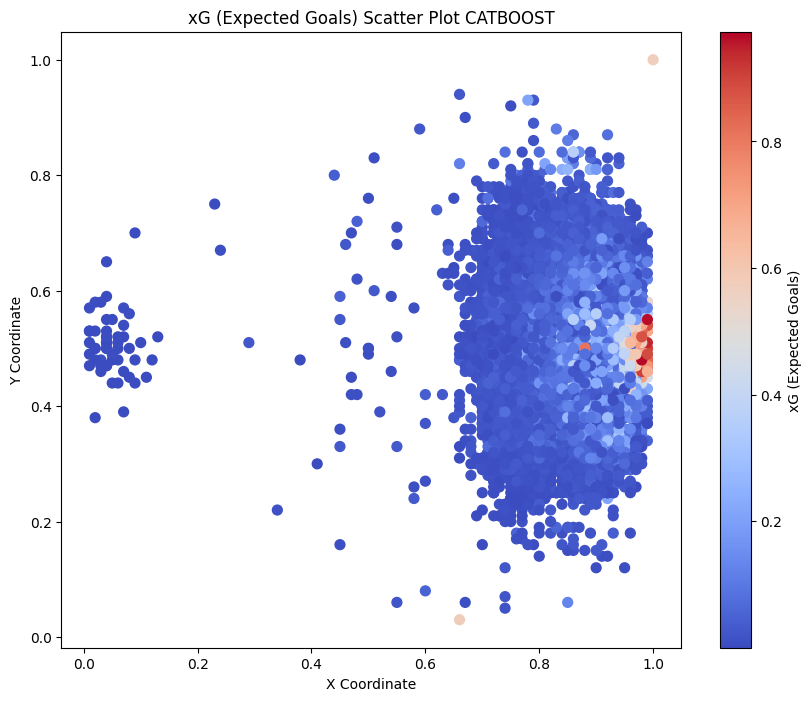

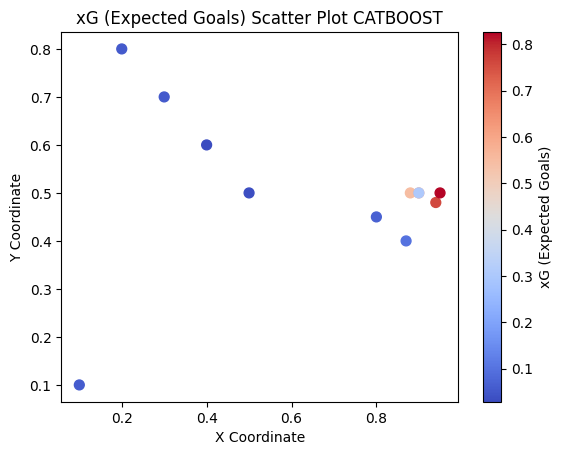

In [211]:
plt.figure(figsize=(10, 8))
#plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_catboost'], cmap='coolwarm', s=50)
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_catboost'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot CATBOOST')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_catboost['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot CATBOOST')
plt.show()


In [415]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [416]:
# LSTM Model

# Reshaping data for LSTM input (samples, time steps, features)
#features_reshaped = features.values.reshape(features.shape[0], 1, features.shape[1])
features_reshaped = features.values.reshape(features.shape[0], 1, features.shape[1])

# X_train_reshaped = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
# X_test_reshaped = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Reshaping data for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
#-----------------------------------------------------------------------------------------------
# X_train_reshaped = X_train_scaled_resampled.reshape(X_train_scaled_resampled.shape[0], 1, X_train_scaled_resampled.shape[1])
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
#--------------------------------------------------------------------------------------------


# Building LSTM lstm_model
lstm_model = Sequential()

lstm_model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
# lstm_model.add(LSTM(64, input_shape=(1, X_train_scaled_resampled.shape[1]), activation='relu'))   #SAMPLED

lstm_model.add(Dense(1, activation='sigmoid'))

# Compiling the lstm_model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#Traning the lstm_model
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
# lstm_model.fit(X_train_reshaped, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

#SAMPLED
# lstm_model.fit(X_train_resampled_reshaped, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


# Predicting probabilities using the trained lstm_model
y_pred_proba = lstm_model.predict(X_test_reshaped)
# y_pred_proba = lstm_model.predict(X_test_reshaped)    #RESAMPLED

# xG_all_proba = lstm_model.predict(features_reshaped)
print(y_pred_proba)
# Calculate xG values based on predicted probabilities
# xg_values = y_pred_proba.flatten()
# xG_all = xG_all_proba.flatten()
X_test['xG_calc_lstm'] = y_pred_proba
# print(xG_all_proba)
# print("*********************************************************************")
# print(xG_all)


print("LSTM - Long Short Term Memory Model")

Epoch 1/10
1546/1546 [==============================] - 6s 2ms/step - loss: 0.3358 - accuracy: 0.8978 - val_loss: 0.3195 - val_accuracy: 0.8990
Epoch 2/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.9000 - val_loss: 0.3097 - val_accuracy: 0.8990
Epoch 3/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9000 - val_loss: 0.3010 - val_accuracy: 0.8990
Epoch 4/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.9001 - val_loss: 0.2928 - val_accuracy: 0.8990
Epoch 5/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.2911 - accuracy: 0.9001 - val_loss: 0.2898 - val_accuracy: 0.8990
Epoch 6/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.2871 - accuracy: 0.9002 - val_loss: 0.2841 - val_accuracy: 0.8990
Epoch 7/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.2843 - accuracy: 0.9003 - val_loss: 0.2846 - val_accuracy:

In [417]:
#MODEL EVALUATION METRICS
y_pred = (y_pred_proba > 0.5).astype(int)

print("Model Evaluation - LSTM ")


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, y_pred_proba)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
r2 = r2_score(y_test, y_pred_proba)
print("R-squared:", r2)
brier_score = brier_score_loss(y_test, y_pred_proba)
print("Brier Score :", brier_score)

print(classification_report(y_test, y_pred))







Model Evaluation - LSTM 
Accuracy: 0.90
Precision: 0.74
Recall: 0.09
ROC AUC: 0.79
Mean Squared Error: 0.08
F1 Score: 0.1640677966101695
Log Loss value : 0.2803261182179834
Confusion Matrix:
 [[11009    42]
 [ 1191   121]]
R-squared: 0.1541079534870099
Brier Score : 0.08024216115667594
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11051
           1       0.74      0.09      0.16      1312

    accuracy                           0.90     12363
   macro avg       0.82      0.54      0.56     12363
weighted avg       0.89      0.90      0.86     12363



In [215]:
#LSTM xG Function

def calculate_xG_lstm(position_x, position_y,Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,player_name,Last_Action,Team_rating,Opponent_rating):
    new_data_lstm = pd.DataFrame({
        'X_coord': [position_x],
        'Y_coord': [position_y],
        'Y_coord_angle' : [Y_coord_angle],
        'is_Penalty': [is_penalty],
        'is_head': [is_header],
        'is_home':[is_home],
        'is_OpenPlay' :[is_OpenPlay],
        'is_DirectFreekick' :[is_DirectFreekick],
        'is_FromCorner' :[is_FromCorner],
        'is_SetPiece' :[is_SetPiece],
        'overall' : [data.loc[data['Player name'] == player_name, 'overall'].values[0]],
        'value_eur' : [data.loc[data['Player name'] == player_name, 'value_eur'].values[0]],
        'shooting' : [data.loc[data['Player name'] == player_name, 'shooting'].values[0]],
        'Last_Action' : [Last_Action] ,
        'Team_rating' : [Team_rating],
        'Opponent_rating' : [Opponent_rating]
    })
    overall = new_data['overall']
    value_eur = new_data['value_eur']
    shooting = new_data['shooting']
    #Y_coord_angle = (1 - abs(position_y - 0.50) * 2)
    new_data_lstm_reshaped = new_data_lstm.values.reshape(new_data_lstm.shape[0], 1, new_data_lstm.shape[1])
    #scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home]])
    scaled_features = scaler.transform([[position_x, position_y, Y_coord_angle,is_penalty, is_header,is_home,is_OpenPlay,is_DirectFreekick,is_FromCorner,is_SetPiece,overall,value_eur,shooting,Last_Action,Team_rating,Opponent_rating]])
    reshaped_features = scaled_features.reshape(1, 1, scaled_features.shape[1])
#   xG_probability = lstm_model.predict(new_data_lstm_reshaped)  # Probability of scoring a goal
    xG_probability = lstm_model.predict(reshaped_features)
    #xG_probability = lstm_model_s.predict_proba(new_data_lstm)[0, 1]
    #xg_prob = lstm_model_s.predict_proba(scaled_features)[:, 1]
    new_data_lstm['New xG']=xG_probability
    #new_data_lstm['New xG']=xg_prob
    #return xg_prob[0],new_data_lstm
    return xG_probability, new_data_lstm



new_xG_data_lstm = pd.DataFrame(columns=['X_coord','Y_coord','Y_coord_angle','is_Penalty','is_head','is_home',
                                   'is_OpenPlay','is_DirectFreekick','is_FromCorner','is_SetPiece',
                                   'overall','value_eur','shooting','Last_Action','Team_rating','Opponent_rating'])


#Parameters to test the LSTM model xG function


parameter_sets = [
    (0.88, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.94, 0.48,(1-abs(0.48-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.90, 0.50,(1-abs(0.50-0.50)*2),0, 0, 0,1,0,0,0,player_name,10,85,75),
    (0.95, 0.50,(1-abs(0.50-0.50)*2),0, 1, 1,1,0,0,0,player_name,10,85,75),
    (0.87, 0.40,(1-abs(0.40-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.80, 0.45,(1-abs(0.45-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.50, 0.50,(1-abs(0.50-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.40, 0.60,(1-abs(0.60-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.30, 0.70,(1-abs(0.70-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.20, 0.80,(1-abs(0.80-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75),
    (0.10, 0.10,(1-abs(0.10-0.50)*2),0, 0, 1,1,0,0,0,player_name,10,85,75)
]




# new_xG_data_lstm = []

for params in parameter_sets:
    xG_probability, new_data_lstm = calculate_xG_lstm(*params)
    new_xG_data_lstm=new_xG_data_lstm.append(new_data_lstm)

print("LSTM Model - xG values of players wrt to the positions and features")
print(new_xG_data_lstm[["X_coord","Y_coord","Y_coord_angle","overall","New xG"]])


1/1 [==============================] - 0s 22ms/step
LSTM Model - xG values of players wrt to the positions and features
   X_coord  Y_coord  Y_coord_angle  overall    New xG
0     0.88     0.50           1.00     94.0  0.364043
0     0.90     0.50           1.00     94.0  0.416242
0     0.94     0.48           0.96     94.0  0.477422
0     0.90     0.50           1.00     94.0  0.431142
0     0.95     0.50           1.00     94.0  0.445904
0     0.87     0.40           0.80     94.0  0.163878
0     0.80     0.45           0.90     94.0  0.123114
0     0.50     0.50           1.00     94.0  0.006281
0     0.40     0.60           0.80     94.0  0.000688
0     0.30     0.70           0.60     94.0  0.000073
0     0.20     0.80           0.40     94.0  0.000008
0     0.10     0.10           0.20     94.0  0.000001


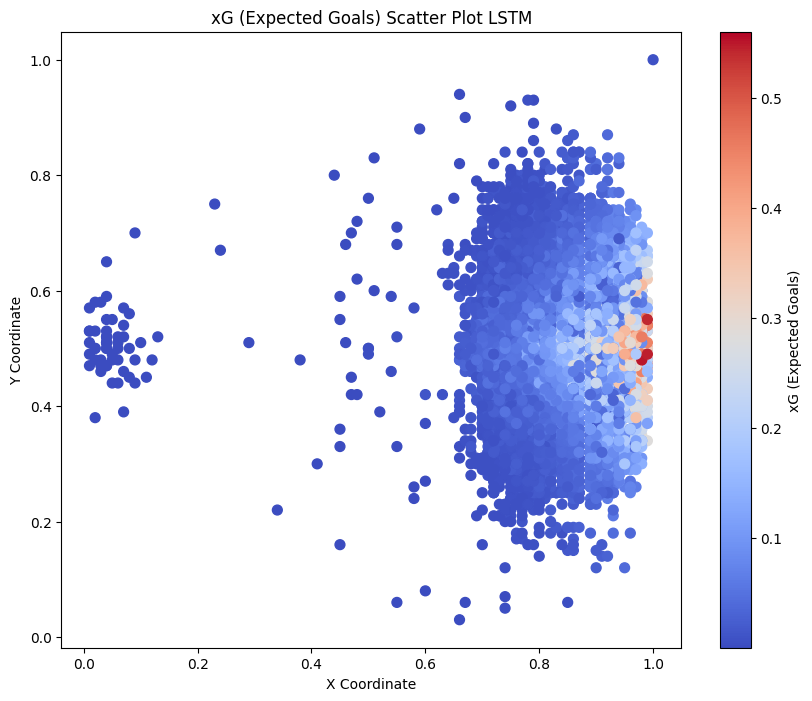

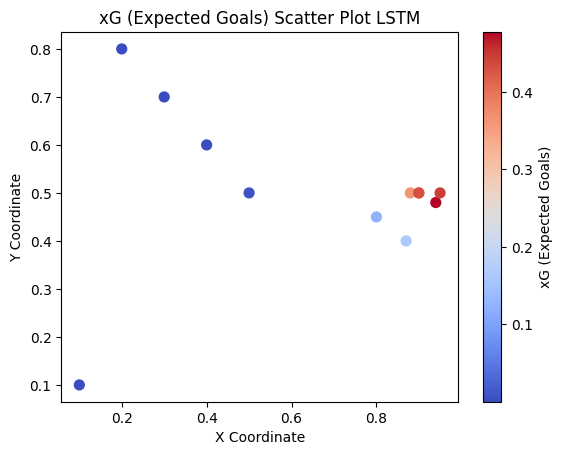

In [216]:
plt.figure(figsize=(10, 8))
#plt.scatter(data['X_coord'], data['Y_coord'], c=data['xG_calc_lstm'], cmap='coolwarm', s=50)
X_test = X_test[~((X_test['X_coord'] == 0.88))]
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=X_test['xG_calc_lstm'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot LSTM')
plt.show()


plt.scatter(new_xG_data['X_coord'], new_xG_data['Y_coord'], c=new_xG_data_lstm['New xG'], cmap='coolwarm', s=50)
plt.colorbar(label='xG (Expected Goals)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('xG (Expected Goals) Scatter Plot LSTM')
plt.show()


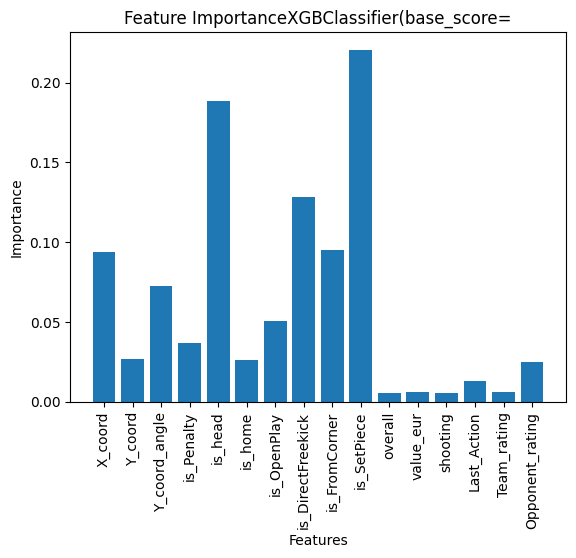

X_coord: 0.09382247179746628
Y_coord: 0.0266545582562685
Y_coord_angle: 0.07284664362668991
is_Penalty: 0.0369134247303009
is_head: 0.18830637633800507
is_home: 0.025934947654604912
is_OpenPlay: 0.05035405233502388
is_DirectFreekick: 0.12832053005695343
is_FromCorner: 0.09492519497871399
is_SetPiece: 0.2206432819366455
overall: 0.005752266384661198
value_eur: 0.005838810931891203
shooting: 0.0056249769404530525
Last_Action: 0.013097919523715973
Team_rating: 0.005921435076743364
Opponent_rating: 0.025043144822120667


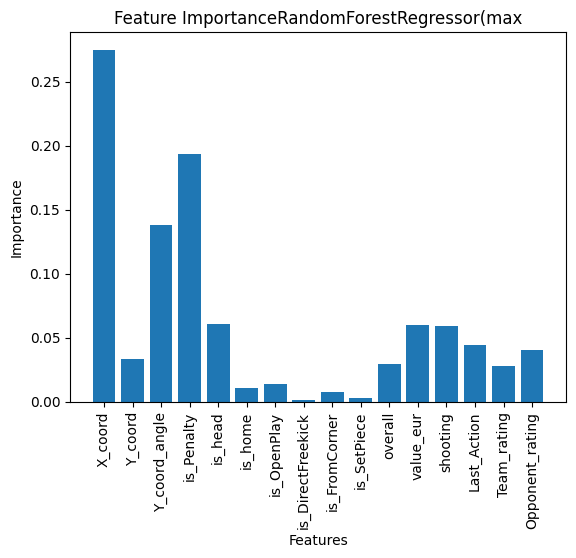

X_coord: 0.27501517880777676
Y_coord: 0.03334884845229412
Y_coord_angle: 0.13815292656013467
is_Penalty: 0.19390674521222614
is_head: 0.06049506086441914
is_home: 0.011075308900505391
is_OpenPlay: 0.014136782959518373
is_DirectFreekick: 0.001574872474808139
is_FromCorner: 0.007706206237091511
is_SetPiece: 0.0026043775629995968
overall: 0.029705251066787643
value_eur: 0.060061386798703216
shooting: 0.058783656111652934
Last_Action: 0.044418423686705226
Team_rating: 0.02828373218980433
Opponent_rating: 0.04073124211457277


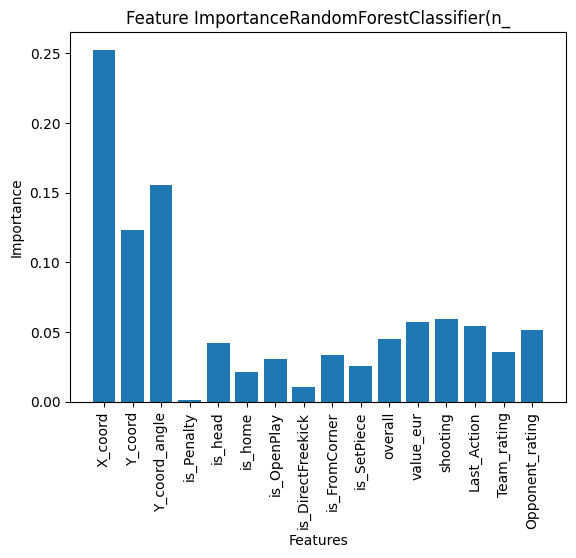

X_coord: 0.25247505002160686
Y_coord: 0.1234046112835609
Y_coord_angle: 0.15575160266893487
is_Penalty: 0.001378324182108047
is_head: 0.042314340152317685
is_home: 0.021606468390706384
is_OpenPlay: 0.030462220238741154
is_DirectFreekick: 0.010335801757855534
is_FromCorner: 0.03344997645341991
is_SetPiece: 0.025935951464539756
overall: 0.044854757897533716
value_eur: 0.05704060847510439
shooting: 0.059110142649239306
Last_Action: 0.0545579237165973
Team_rating: 0.03590241061875589
Opponent_rating: 0.05141981002897837


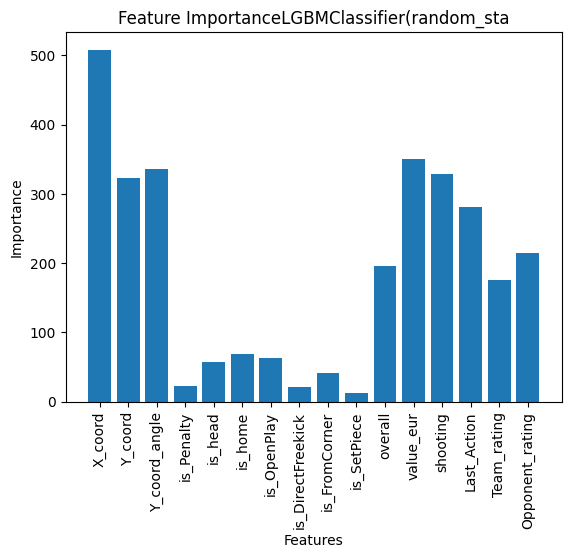

X_coord: 0.16933333333333334
Y_coord: 0.10766666666666666
Y_coord_angle: 0.112
is_Penalty: 0.007333333333333333
is_head: 0.019333333333333334
is_home: 0.023
is_OpenPlay: 0.021
is_DirectFreekick: 0.007
is_FromCorner: 0.013666666666666667
is_SetPiece: 0.004333333333333333
overall: 0.06533333333333333
value_eur: 0.117
shooting: 0.10966666666666666
Last_Action: 0.09366666666666666
Team_rating: 0.058333333333333334
Opponent_rating: 0.07133333333333333


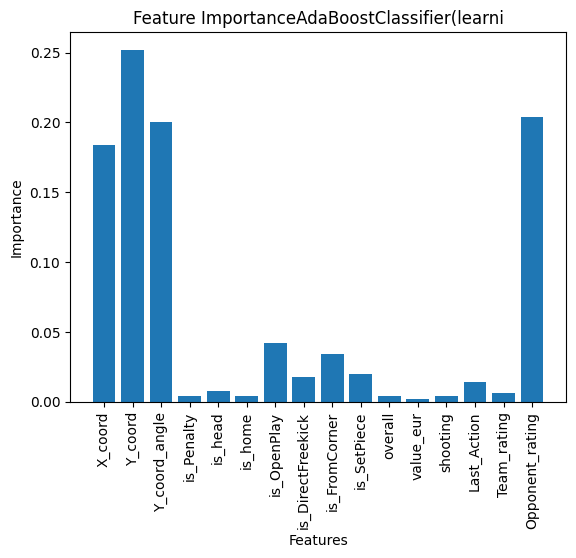

X_coord: 0.184
Y_coord: 0.252
Y_coord_angle: 0.2
is_Penalty: 0.004
is_head: 0.008
is_home: 0.004
is_OpenPlay: 0.042
is_DirectFreekick: 0.018
is_FromCorner: 0.034
is_SetPiece: 0.02
overall: 0.004
value_eur: 0.002
shooting: 0.004
Last_Action: 0.014
Team_rating: 0.006
Opponent_rating: 0.204


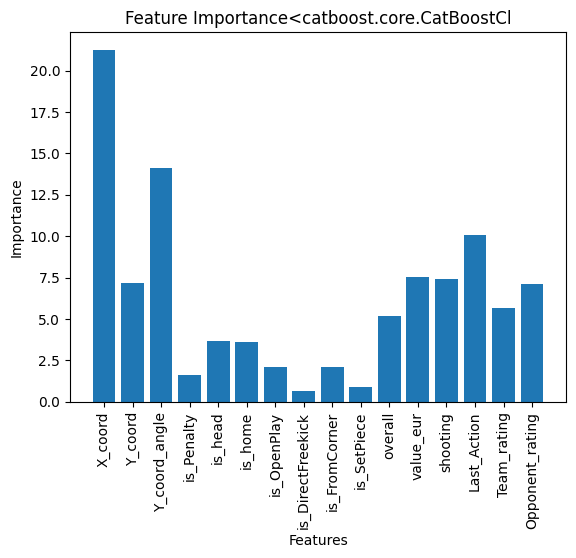

X_coord: 0.21257980632817816
Y_coord: 0.07163255429188513
Y_coord_angle: 0.14103649441635413
is_Penalty: 0.01608893006527883
is_head: 0.036676630010175355
is_home: 0.03609131401233902
is_OpenPlay: 0.021118991383401994
is_DirectFreekick: 0.006185879600779853
is_FromCorner: 0.020687365803204107
is_SetPiece: 0.008654604446798733
overall: 0.05195764855732279
value_eur: 0.07522703634472946
shooting: 0.07389447418459691
Last_Action: 0.10052367026410293
Team_rating: 0.05669909174473944
Opponent_rating: 0.07094550854611321


In [306]:
# Calculating feature importance

def calculate_feature_importance(best_model):
    feature_importances = best_model.feature_importances_
    # Plot feature importance
    plt.bar(range(len(feature_importances)), feature_importances)
    plt.xticks(range(len(feature_importances)), features.columns, rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance'+str(best_model)[:25])
    plt.show()
    # Assign weights to features based on their importance
    feature_weights = feature_importances / feature_importances.sum()
    # Print feature weights
    for feature, weight in zip(features.columns, feature_weights):
        print(f"{feature}: {weight}")

calculate_feature_importance(xgb_s)
calculate_feature_importance(best_random_forest_model)
calculate_feature_importance(best_rf_model)
calculate_feature_importance(final_lgb_model)
calculate_feature_importance(final_adaboost_model)
calculate_feature_importance(final_catboost_model)
#calculate_feature_importance(lstm_model)

# calculate_feature_importance(xgb_s)
# calculate_feature_importance(random_forest_model_s)
# calculate_feature_importance(rf_model_s)
# calculate_feature_importance(lgb_model_s)
# calculate_feature_importance(adaboost_model_s)
# calculate_feature_importance(catboost_model_s)
    
    
#feature_importances = xgb_s.feature_importances_
#feature_importances = adaboost_model.feature_importances_
#feature_importances = lgb_model.feature_importances_
#feature_importances = catboost_model.feature_importances_
#feature_importances = rf_model.feature_importances_
#feature_importances = random_forest_model_s.feature_importances_



X_coord: 13.657375108429509
Y_coord: 0.22775260522849064
Y_coord_angle: 4.683025052453384
is_Penalty: 1.8592326636344065
is_head: -0.8364469071250671
is_home: 0.023549614999306922
is_OpenPlay: -0.41456488995248847
is_DirectFreekick: 0.361475799268069
is_FromCorner: -0.8670318592477526
is_SetPiece: -0.6250503400146583
overall: 0.5804514856093992
value_eur: 0.1772246787218135
shooting: 0.6587651029693844
Last_Action: 0.1866790027460069
Team_rating: 0.12401058271885974
Opponent_rating: -0.17341903733077196


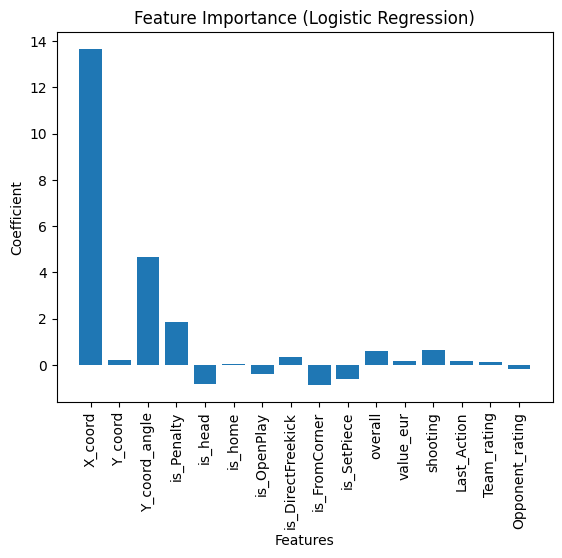

In [218]:
# Calculating feature importance (coefficients) of LOGISTIC REGRESSION MODEL
# feature_importance = logreg_model_s.coef_[0]
feature_importance = final_logreg_model.coef_[0]

for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), features.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

Permutation explainer: 12364it [08:53, 23.00it/s]                                                                      


Instance Features:
X_coord              8.600000e-01
Y_coord              4.000000e-01
Y_coord_angle        8.000000e-01
is_Penalty           0.000000e+00
is_head              0.000000e+00
is_home              0.000000e+00
is_OpenPlay          1.000000e+00
is_DirectFreekick    0.000000e+00
is_FromCorner        0.000000e+00
is_SetPiece          0.000000e+00
overall              7.200000e+01
value_eur            2.900000e+06
shooting             6.100000e+01
Last_Action          1.000000e+01
Team_rating          8.000000e+01
Opponent_rating      8.300000e+01
xG_calc_lstm         7.382551e-02
Name: 34548, dtype: float64
SHAP Values:
.values =
array([ 0.06395567,  0.10982136,  0.07058735, -0.00308547,  0.04284   ,
        0.04398402, -0.09759062,  0.0511737 ,  0.08135271,  0.04131605,
       -0.00533823,  0.01509823, -0.00873396, -0.01028139,  0.01330514,
        0.0090621 ])

.base_values =
array([0.29576109])

.data =
array([0.85858586, 0.375     , 0.8       , 0.        , 0.        ,
   

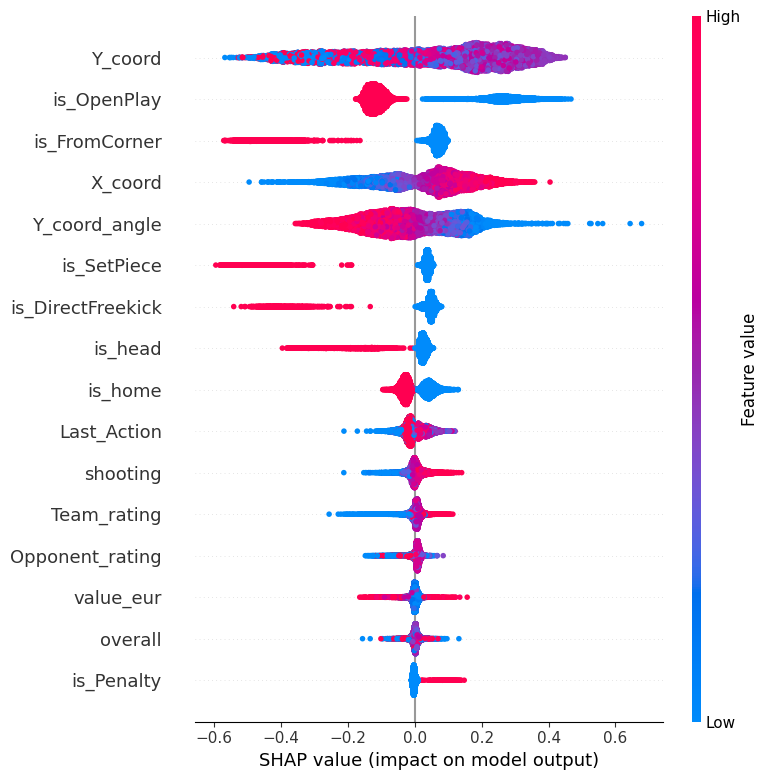

In [219]:
#FEATURE IMPORTANCE OF ANN MODEL


# Calculating SHAP values
explainer = shap.Explainer(ann_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Printing feature values for a specific instance (index)
instance_index = 0  # Change this to the desired instance index
instance_features = X_test.iloc[instance_index]
print("Instance Features:")
print(instance_features)

# Printing SHAP values for the same instance
shap_instance_values = shap_values[instance_index]
print("SHAP Values:")
print(shap_instance_values)

# Summary plot of feature importance using SHAP
shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)
plt.show()



In [378]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


In [379]:
#Loading xG values into the dataframe for each model

#xG_all_xgb = final_xgb_model.predict_proba(X_data_scaled)[:, 1]
xG_all_xgb = xgb_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_xgb'] = xG_all_xgb


xG_all_LR = final_logreg_model.predict_proba(X_data_scaled)[:, 1]
#xG_all_LR = logreg_model_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_LR'] = xG_all_LR


xG_all_RFR = best_random_forest_model.predict(X_data_scaled)
#xG_all_RFR = random_forest_model_s.predict(X_data_scaled)
data['xG_calc_RFR'] = xG_all_RFR

xG_all_RFC = best_rf_model.predict_proba(X_data_scaled)[:, 1]
#xG_all_RFC = rf_model_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_RFC'] = xG_all_RFC


xG_all_ANN = best_ann_model.predict_proba(X_data_scaled)[:, 1]
#xG_all_ANN = ann_model.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_ANN'] = xG_all_ANN

#xG_all_LGB = final_lgb_model.predict_proba(X_data_scaled)[:, 1]
xG_all_LGB = lgb_model_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_LGB'] = xG_all_LGB


xG_all_adaboost = final_adaboost_model.predict_proba(X_data_scaled)[:, 1]
#xG_all_adaboost = adaboost_model_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_adaboost'] = xG_all_adaboost


xG_all_catboost = final_catboost_model.predict_proba(X_data_scaled)[:, 1]
#xG_all_catboost = catboost_model_s.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_catboost'] = xG_all_catboost



#reshaped_features = scaled_features.reshape(1, 1, scaled_features.shape[1])
X_data_reshaped = X_data_scaled.reshape(X_data_scaled.shape[0], 1, X_data_scaled.shape[1])
xG_all_LSTM = lstm_model.predict(X_data_reshaped)
data['xG_calc_LSTM'] = xG_all_LSTM


print("xG values of models loaded into the dataframe")



1932/1932 [==============================] - 3s 2ms/step
xG values of models loaded into the dataframe


In [419]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = testtrainsplit()
# Applying oversampling
X_train_resampled,y_train_resampled = sampling(X_train,y_train)
# Standardizing the features using scaler
scaler,X_train_scaled,X_train_scaled_resampled,X_test_scaled,X_data_scaled = scaling(X_train,X_train_resampled,X_test)

Test Train Split
Sampling
Feature Scaling


[LightGBM] [Info] Number of positive: 5246, number of negative: 44204
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 49450, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106087 -> initscore=-2.131349
[LightGBM] [Info] Start training from score -2.131349


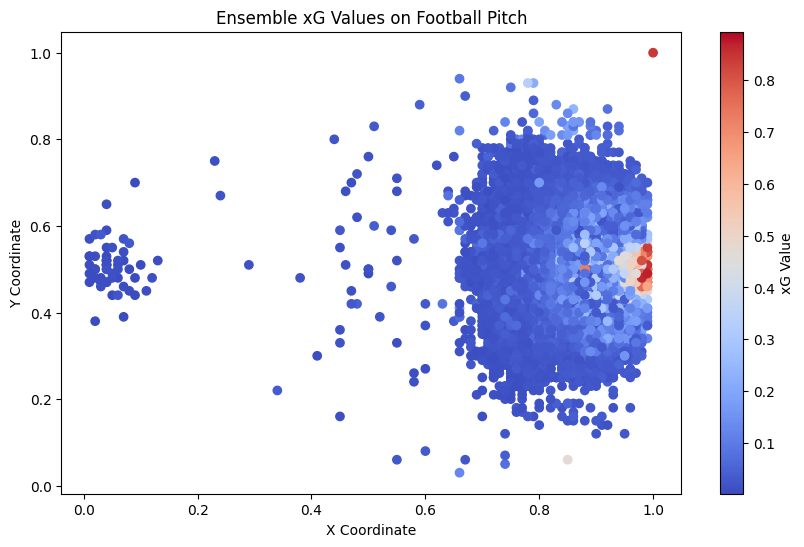

In [422]:
#CREATE AN ENSEMBLE MODEL of two best models TO PREDCIT THE xG VALUES accurately

# Create an ensemble model of XGBoost and Light Gradient Boosting model
ensemble_model = VotingClassifier([('xgb', final_xgb_model), ('lgbm', final_lgb_model)] , voting = 'soft')
# ensemble_model = VotingClassifier([('xgb', final_xgb_model), ('ann', best_ann_model)] , voting = 'soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Calculate xG values using the ensemble model
xG_values_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]


# Plot xG values using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=xG_values_ensemble, cmap='coolwarm')
plt.colorbar(label='xG Value')
plt.title('Ensemble xG Values on Football Pitch')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


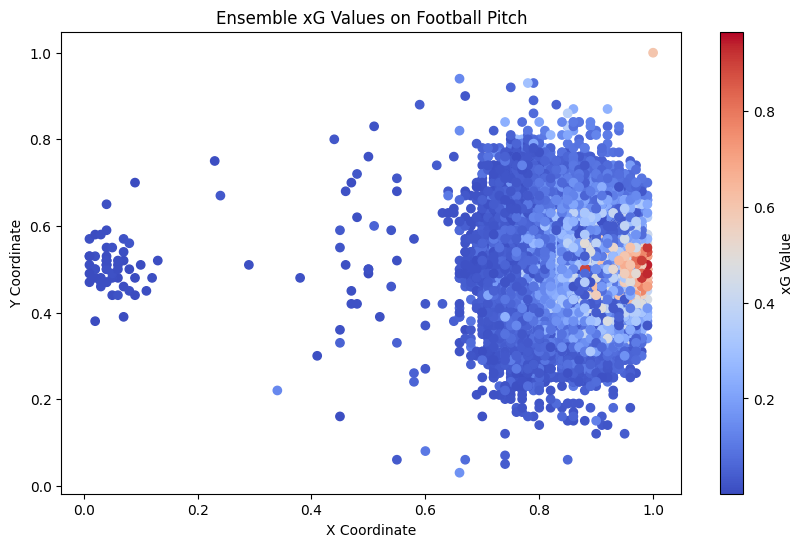

Ensemble Model Accuracy: 0.90
Precision: 0.74
Recall: 0.09
ROC AUC: 0.80
Mean Squared Error: 0.09
F1 Score: 0.1640677966101695
Log Loss value : 0.29674554499940214
Confusion Matrix:
 [[11009    42]
 [ 1191   121]]
Brier Score : 0.08644185551995587


In [423]:
#CREATING ENSEMBLE MODEL of XGBoost , LightGBM and ANN
# Ensemble the predictions using averaging

xG_ens_xgb = xgb_s.predict_proba(X_test_scaled)[:, 1]
xG_ens_LGB = lgb_model_s.predict_proba(X_test_scaled)[:, 1]
xG_ens_ANN = best_ann_model.predict_proba(X_test_scaled)[:, 1]
xG_ens_CAT = final_catboost_model.predict_proba(X_test_scaled)[:, 1]


# xG_ensemble_predictions = np.mean([xG_ens_xgb, xG_ens_LGB, xG_ens_ANN], axis=0)
xG_ensemble_predictions = np.mean([xG_ens_xgb, xG_ens_ANN,xG_ens_LGB], axis=0)

# Round the predictions to obtain the final class labels
# xG_ensemble_predictions = np.round(xG_ensemble_predictions)



#Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=xG_ensemble_predictions, cmap='coolwarm')
plt.colorbar(label='xG Value')
plt.title('Ensemble xG Values on Football Pitch')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



# Calculate accuracy (or other relevant metrics) of the ensemble model

xG_ensemble_preds = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, xG_ensemble_preds)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')
precision = precision_score(y_test, xG_ensemble_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, xG_ensemble_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, xG_ensemble_predictions)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, xG_ensemble_predictions)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, xG_ensemble_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, xG_ensemble_predictions)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, xG_ensemble_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, xG_ensemble_predictions)
print("Brier Score :", brier_score)


0:	learn: 0.5973322	total: 11.1ms	remaining: 3.31s
1:	learn: 0.5260461	total: 22.1ms	remaining: 3.29s
2:	learn: 0.4684506	total: 33.1ms	remaining: 3.28s
3:	learn: 0.4276868	total: 43.4ms	remaining: 3.21s
4:	learn: 0.3982086	total: 54.3ms	remaining: 3.2s
5:	learn: 0.3718723	total: 64.8ms	remaining: 3.17s
6:	learn: 0.3508558	total: 74.9ms	remaining: 3.14s
7:	learn: 0.3346797	total: 86ms	remaining: 3.14s
8:	learn: 0.3231436	total: 101ms	remaining: 3.26s
9:	learn: 0.3141950	total: 113ms	remaining: 3.28s
10:	learn: 0.3081337	total: 123ms	remaining: 3.24s
11:	learn: 0.3012151	total: 134ms	remaining: 3.21s
12:	learn: 0.2971551	total: 145ms	remaining: 3.21s
13:	learn: 0.2925048	total: 156ms	remaining: 3.19s
14:	learn: 0.2886274	total: 167ms	remaining: 3.18s
15:	learn: 0.2858784	total: 178ms	remaining: 3.16s
16:	learn: 0.2835889	total: 185ms	remaining: 3.07s
17:	learn: 0.2813073	total: 196ms	remaining: 3.07s
18:	learn: 0.2794091	total: 207ms	remaining: 3.06s
19:	learn: 0.2780249	total: 219ms	re

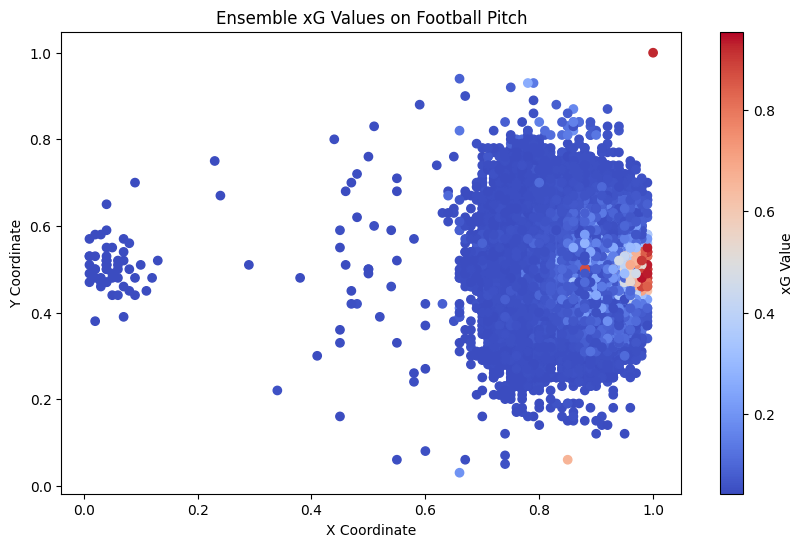

Stacked Ensemble Model Accuracy: 0.90
Ensemble Model Accuracy: 0.90
Precision: 0.68
Recall: 0.15
ROC AUC: 0.81
Mean Squared Error: 0.08
F1 Score: 0.24499999999999997
Log Loss value : 0.27830075614764405
Confusion Matrix:
 [[10959    92]
 [ 1116   196]]
Brier Score : 0.07887406829626951


In [424]:
#Creating ENSEMBLE MODEL of XGBoost , ANN and CatBoost using meta model Logistic Regression

# base_models = [
#     ('ann', best_ann_model),
#     ('xgb', xgb_s),
#     ('lgb', lgb_model_s)
# ]

base_models = [
    ('cat', final_catboost_model),
    ('xgb', xgb_s),
    ('lgb', lgb_model_s)
]

meta_model = LogisticRegression() 

# Create the stacked ensemble model
stacked_ensemble = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacked ensemble model on the training data
stacked_ensemble.fit(X_train_scaled, y_train)

# Make predictions on the test data
stacked_predictions = stacked_ensemble.predict_proba(X_test_scaled)[:, 1]
stacked_preds = stacked_ensemble.predict(X_test)


#Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['X_coord'], X_test['Y_coord'], c=stacked_predictions, cmap='coolwarm')
plt.colorbar(label='xG Value')
plt.title('Ensemble xG Values on Football Pitch')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



accuracy = accuracy_score(y_test, stacked_preds)
print(f'Stacked Ensemble Model Accuracy: {accuracy:.2f}')
accuracy = accuracy_score(y_test, stacked_preds)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')
precision = precision_score(y_test, stacked_preds)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, stacked_preds)
print(f"Recall: {recall:.2f}")
#print(y_test,y_pred)
roc_auc = roc_auc_score(y_test, stacked_predictions)
print(f"ROC AUC: {roc_auc:.2f}")
mse = mean_squared_error(y_test, stacked_predictions)
print(f"Mean Squared Error: {mse:.2f}")
f1 = f1_score(y_test, stacked_preds)
print("F1 Score:", f1)
log_loss_val = log_loss(y_test, stacked_predictions)
print("Log Loss value :", log_loss_val)
conf_matrix = confusion_matrix(y_test, stacked_preds)
print("Confusion Matrix:\n", conf_matrix)
brier_score = brier_score_loss(y_test, stacked_predictions)
print("Brier Score :", brier_score)


stacked_predictions_all = stacked_ensemble.predict_proba(X_data_scaled)[:, 1]
data['xG_calc_ENS'] = stacked_predictions_all



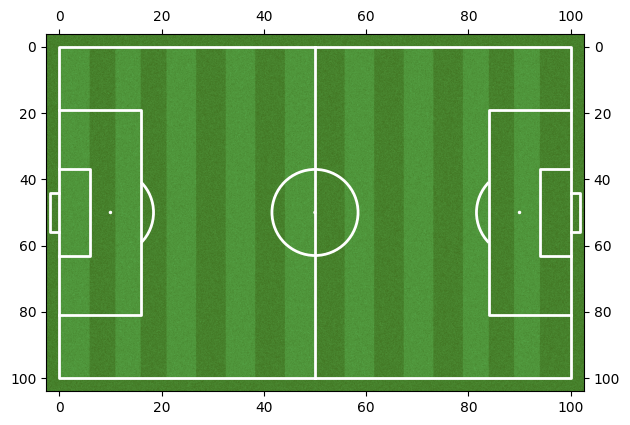

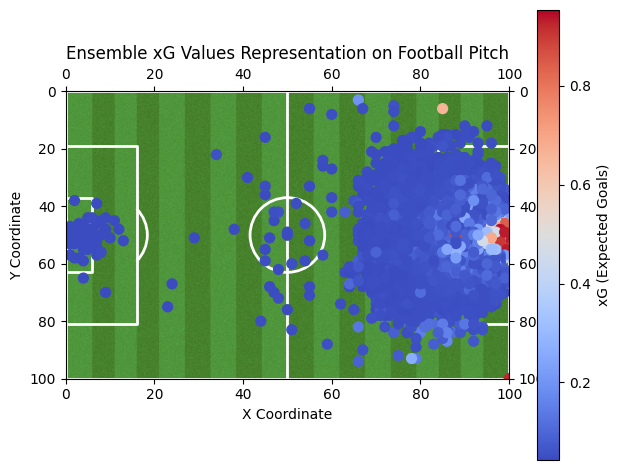

In [432]:
#FOOTBALL PITCH

def plot_football_pitch():
#     fig, ax = plt.subplots(figsize=(12, 8))
    pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
    fig, ax = pitch.draw()

    ax.scatter(88.5, 50, color='black', s=100)
    
    # Plotting the xG values
    sc = ax.scatter(X_test['X_coord']*100, X_test['Y_coord']*100, c=stacked_predictions, cmap='coolwarm', s=50)
    #cbar = plt.colorbar(scatter, ax=ax, label='xG (Expected Goals)')
    
    # Set the axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Ensemble xG Values Representation on Football Pitch')
    
#   cbar = plt.colorbar(sc, ax=ax, label='xG (Expected Goals)')
    cbar = plt.colorbar(sc)
    cbar.set_label('xG (Expected Goals)')
    
    plt.gca().invert_yaxis() 
    plt.show()

# Plotting the football pitch with xG values
pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
fig, ax = pitch.draw()
plt.show()
plot_football_pitch()




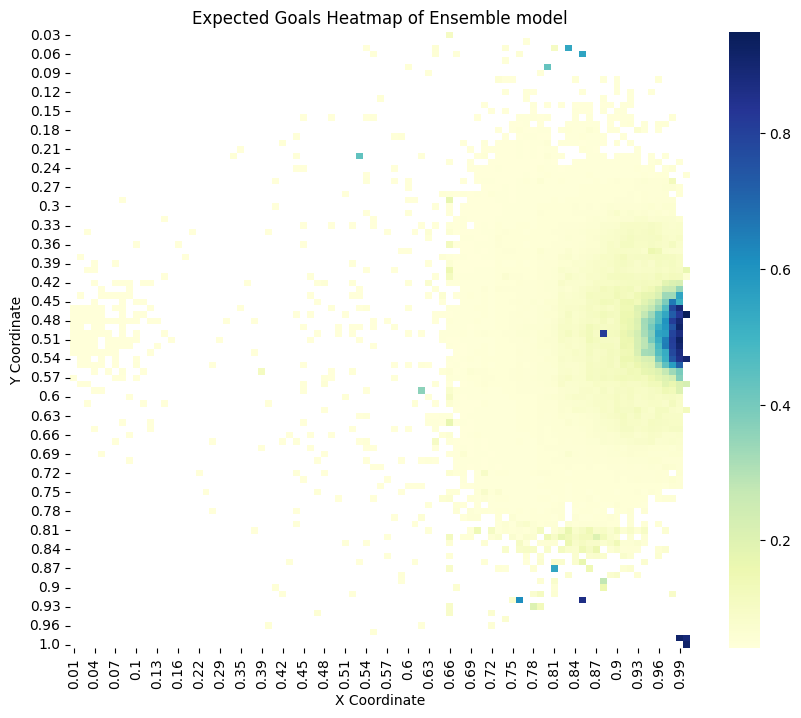

In [414]:
#Heatmap of the ensemble model 

# Aggregate duplicate entries by calculating the mean
# X_test = X_test.groupby(["X_coord", "Y_coord"])[stacked_predictions].mean().reset_index()
data_ens = data.groupby(["X_coord", "Y_coord"])['xG_calc_ENS'].mean().reset_index()


# Pivot the data for heatmap
heatmap_data = data_ens.pivot(index='Y_coord', columns='X_coord', values='xG_calc_ENS')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))

# plt.xlim(heatmap_data.columns[-1], 0.57)

sns.heatmap(heatmap_data, cmap="YlGnBu",  fmt=".2f", cbar=True)

# Set axis labels and plot title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Expected Goals Heatmap of Ensemble model")

# Show the plot
plt.show()


In [224]:
output_file_path1 = "C:/Users/Vignesh Venkataraman/OneDrive/Desktop/Msc DATA SCIENCE/Dissertation/Dataframe_mod/modified_dataset_xg.csv"


data.to_csv(output_file_path, index=False)
print("Result Dataset exported")

Result Dataset exported


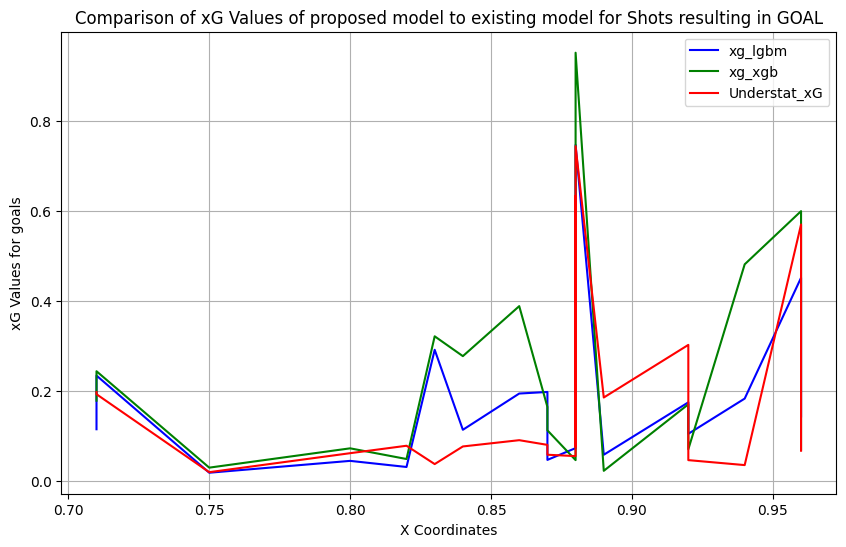

In [317]:
#Plotting line graphs of the models


# Filter rows where is_goal equals 1
goaldf = data[data['is_goal'] == 1]
# goaldf = goaldf[goaldf['Shot Type'] == 'RightFoot']
# goal_df = goaldf.head(20)
# goaldf = goaldf[goaldf["X_coord"] != 0.88]
# goal_df = goaldf.tail(20)
# goal_df = goaldf.tail(20)
goal_df = goal_df.sort_values(by=["X_coord", "Y_coord"])
# print(goal_df)



# Create line plots
plt.figure(figsize=(10, 6))
# plt.plot(goal_df['X_coord'], goal_df['xG_calc_LGB'], label='xg_lgbm', color='blue', marker='o')
plt.plot(goal_df['X_coord'], goal_df['xG_calc_LGB'], label='xg_lgbm', color='blue')

#plt.plot(goal_df['X_coord'], goal_df['xG_calc_LR'], label='xg_LR', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_RFR'], label='xG_RFR', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_RFC'], label='xG_RFC', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_ANN'], label='xG_ANN', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_adaboost'], label='xG_adaboost', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_catboost'], label='xG_catboost', color='blue', marker='o')
#plt.plot(goal_df['X_coord'], goal_df['xG_calc_LSTM'], label='xG_LSTM', color='blue', marker='o')


# plt.plot(goal_df['X_coord'], goal_df['xG_calc_xgb'], label='xg_xgb', color='green', marker='s')
# plt.plot(goal_df['X_coord'], goal_df['xG'], label='Understat_xG', color='red', marker='^')

plt.plot(goal_df['X_coord'], goal_df['xG_calc_xgb'], label='xg_xgb', color='green')
plt.plot(goal_df['X_coord'], goal_df['xG'], label='Understat_xG', color='red')

# Customize the plot
plt.title('Comparison of xG Values of proposed model to existing model for Shots resulting in GOAL')
plt.xlabel('X Coordinates')
plt.ylabel('xG Values for goals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

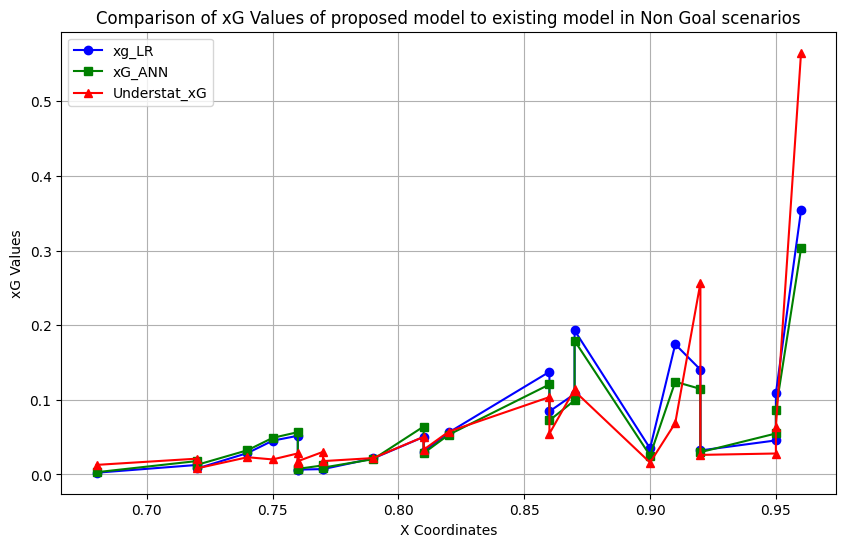

In [226]:
#Plotting line graphs of the models


# Filter rows where is_goal equals 1
goaldf_0 = data[data['is_goal'] == 0]
goaldf_0 = goaldf_0[goaldf_0["X_coord"] != 0.88]
goal_df_0 = goaldf_0.tail(25)
goal_df_0 = goal_df_0.sort_values(by=["X_coord", "Y_coord"])
# print(goal_df_0)



# Creating line plots
plt.figure(figsize=(10, 6))
# plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_LGB'], label='xg_lgbm', color='green', marker='s')
plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_LR'], label='xg_LR', color='blue', marker='o')
# plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_ANN'], label='xG_ANN', color='green', marker='s')
# plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_RFR'], label='xG_RFR', color='green', marker='s')
#plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_adaboost'], label='xG_adaboost', color='green', marker='s')
# plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_catboost'], label='xG_catboost', color='green', marker='s')
plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_LSTM'], label='xG_ANN', color='green', marker='s')


# plt.plot(goal_df_0['X_coord'], goal_df_0['xG_calc_xgb'], label='xg_xgb', color='green', marker='s')
plt.plot(goal_df_0['X_coord'], goal_df_0['xG'], label='Understat_xG', color='red', marker='^')

# Customizing the plot
plt.title('Comparison of xG Values of proposed model to existing model in Non Goal scenarios')
plt.xlabel('X Coordinates')
plt.ylabel('xG Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

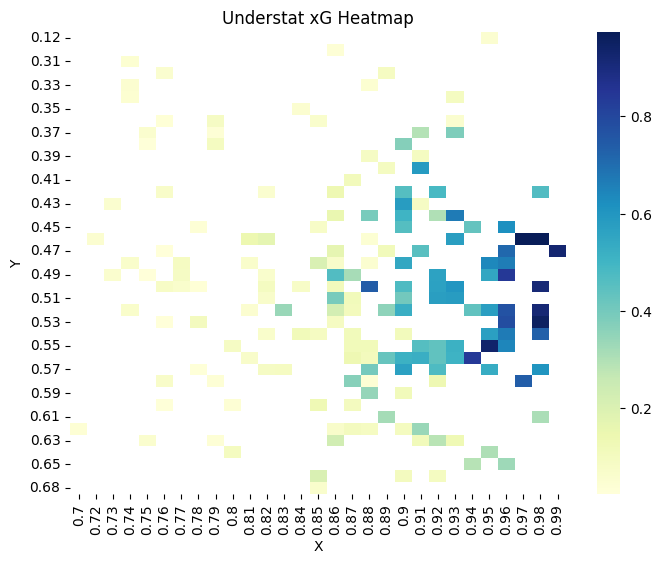

In [227]:
# Pivot the DataFrame to create a heatmap data structure of xG values

heat_data1 = data[data['Player name'] == "lionel messi"]
heat_data1 = heat_data1[heat_data1['is_goal'] == 1]
heat_data1 = heat_data1.drop_duplicates(subset=["X_coord", "Y_coord"])
heatmap_data = heat_data1.pivot(index="Y_coord", columns="X_coord", values="xG")
# heatmap_data = heat_data.pivot(index="X_coord", columns="Y_coord", values="xG")

# Creating a heatmap for xG values
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", cbar=True)
# sns.heatmap(heatmap_data, annot=False, cmap="viridis", cbar=True)
plt.title("Understat xG Heatmap")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

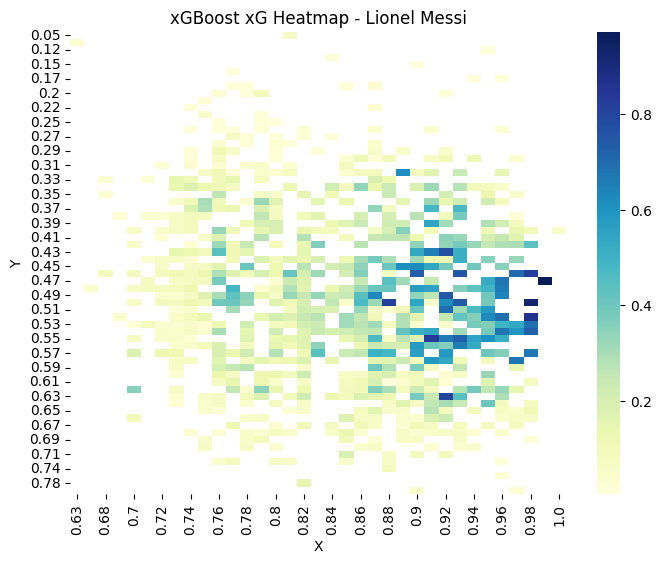

In [228]:
# Pivot the DataFrame to create a heatmap data structure of xG values

heat_data = data[data['Player name'] == "lionel messi"]
heat_data = heat_data.drop_duplicates(subset=["X_coord", "Y_coord"])
heatmap_data = heat_data.pivot(index="Y_coord", columns="X_coord", values="xG_calc_xgb")
# heatmap_data = heat_data.pivot(index="X_coord", columns="Y_coord", values="xG")

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", cbar=True)
# sns.heatmap(heatmap_data, annot=False, cmap="viridis", cbar=True)
plt.title("xGBoost xG Heatmap - Lionel Messi")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

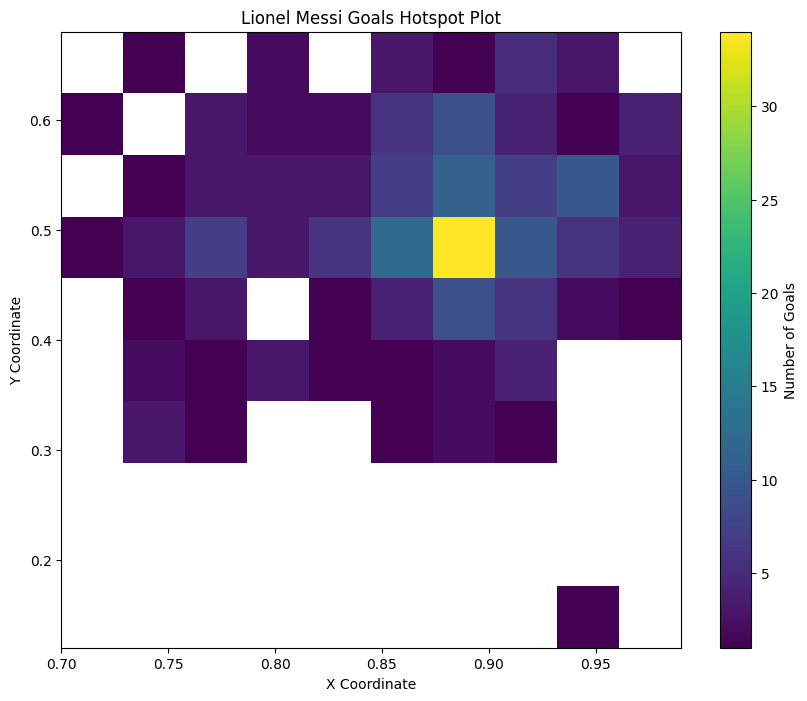

In [434]:
# Plotting hotspot for goals of Lionel Messi


hotspot_data1 = data[data['Player name'] == "lionel messi"]
hotspot_data1 = hotspot_data1[hotspot_data1['is_goal'] == 1]
plt.figure(figsize=(10, 8))
plt.hist2d(hotspot_data1["X_coord"], hotspot_data1["Y_coord"], bins=(10, 10), cmap="viridis", cmin=1)
plt.colorbar(label="Number of Goals")
plt.title("Lionel Messi Goals Hotspot Plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

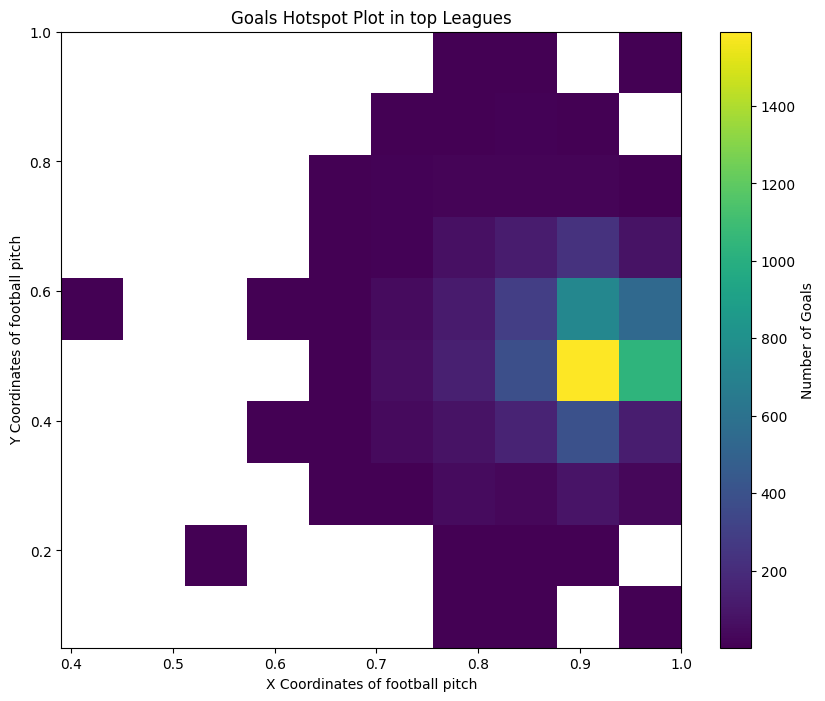

In [433]:
# Plot hotspot for goals of players in top leagues

hotspot_data_all_goals = data[data['is_goal'] == 1]
plt.figure(figsize=(10, 8))
plt.hist2d(hotspot_data_all_goals["X_coord"], hotspot_data_all_goals["Y_coord"], bins=(10, 10), cmap="viridis", cmin=1)
plt.colorbar(label="Number of Goals")
plt.title("Goals Hotspot Plot in top Leagues")
plt.xlabel("X Coordinates of football pitch")
plt.ylabel("Y Coordinates of football pitch")
plt.show()

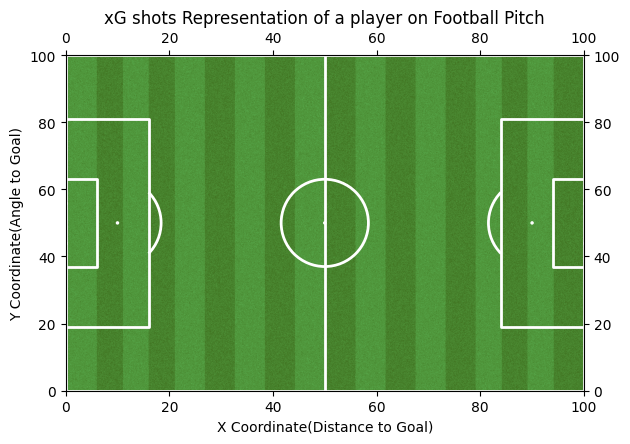

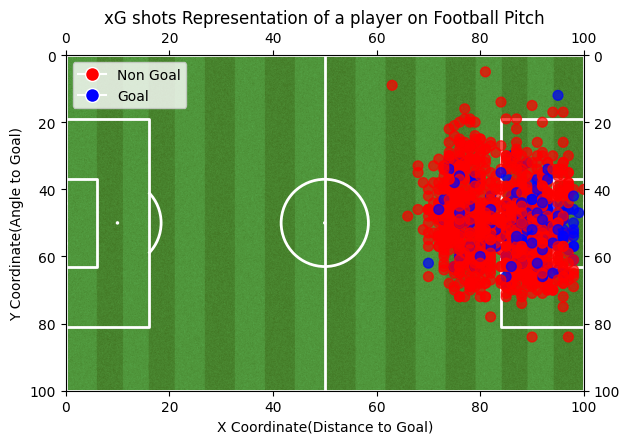

In [354]:
#FOOTBALL PITCH

lionelmessi_shots = data[data['Player name'] == 'lionel messi']

def plot_football_pitch():
    pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
    fig, ax = pitch.draw()
    
    #ax.scatter(88.5, 50, color='black', s=100)
    ax.scatter(88.5, 50, color='black', s=100)
    colors = np.where(lionelmessi_shots['is_goal'] == 1, 'blue', 'red')
    
    # Plotting the xG values
#     sc = ax.scatter(lionelmessi_shots['X_coord']*100, lionelmessi_shots['Y_coord']*100, c=lionelmessi_shots['is_goal'], cmap='coolwarm', s=50)    
#     sc =ax.scatter(lionelmessi_shots['X_coord']*100, lionelmessi_shots['Y_coord']*100, c=lionelmessi_shots['is_goal'], cmap='coolwarm', s=50, alpha=0.7)
    sc =ax.scatter(lionelmessi_shots['X_coord']*100, lionelmessi_shots['Y_coord']*100, c=colors, s=50, alpha=0.7)
    # Set the axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel('X Coordinate(Distance to Goal)')
    ax.set_ylabel('Y Coordinate(Angle to Goal)')
    ax.set_title('xG shots Representation of a player on Football Pitch')
    
#     cbar = plt.colorbar(sc)
#     cbar.set_label('xG (Expected Goals)')

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Non Goal'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Goal')]

    plt.legend(handles=legend_elements, loc='upper left')
    
    plt.gca().invert_yaxis() 
    plt.show()

# Plotting the football pitch with xG values
pitch = Pitch(pitch_color='grass', stripe = True, pitch_type = 'wyscout', line_color = 'white', goal_type = 'box',label = True,  axis = True, tick = True)
fig, ax = pitch.draw()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel('X Coordinate(Distance to Goal)')
ax.set_ylabel('Y Coordinate(Angle to Goal)')
ax.set_title('xG shots Representation of a player on Football Pitch')

plt.show()
plot_football_pitch()

--ANALYSIS OF MANCHESTER UNITED VS SWANSEA GAME 2014 ----------------------------------


Player name  Understat xG  Proposed model xG  Total Goals
0    adnan januzaj      0.134241           0.322693            0
1     ashley young      0.017033           0.015050            0
2   chris smalling      0.103211           0.131321            0
3  darren fletcher      0.030971           0.018560            0
4       phil jones      0.069479           0.092488            0
5     wayne rooney      0.786549           0.865609            1
6    wilfried bony      0.021782           0.004346            0

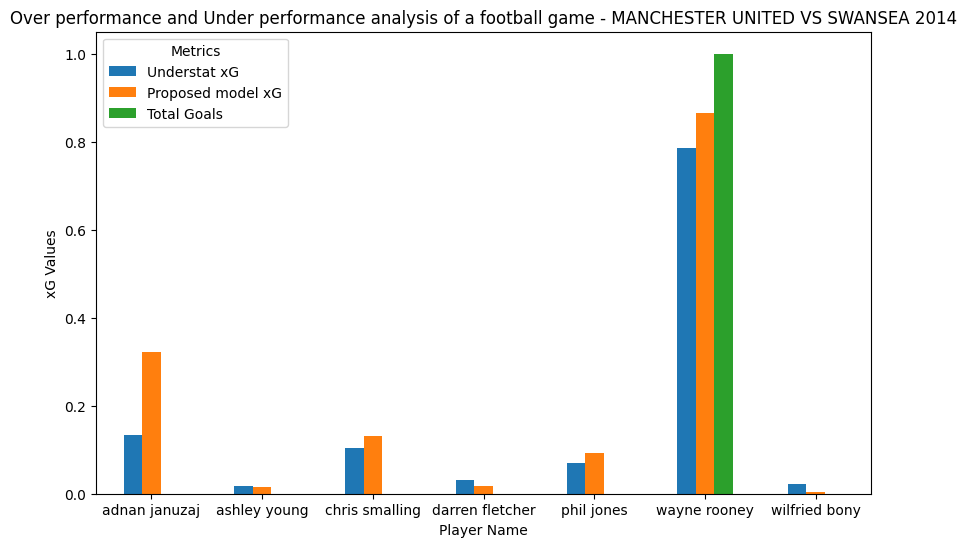

---------------------------------------------------------------------------------------------------
From the graph , it can be noted that Wayne Rooney has scored 1 goal and out of the chances he got he has an expected goal value of 0.786 throughout the game as predicted by Understat xG provider and xG value of 0.865 by our proposed model using xGBoost algorithm
-----------------------------------------------------------------------------------------------------------------------
Inference 1 - Considering the amount and quality of chances throughout the game, Wayne Rooney has overperformed by scoring 1 goal
-----------------------------------------------------------------------------------------------------------------------
Inference 2 - Considering the amount and quality of chances throughout the game, Adnan Januzaj has underperformed by scoring no goal


In [436]:
# Detection of over performance and under performance by comparing the xG values to the actual goals scored in the match

df_match_4749 = data[data['Match ID'] == 4749]
df_match_4749 = df_match_4749.sort_values(by=["X_coord", "Y_coord"])


over_under_df = pd.DataFrame(columns=['Player name', 'Understat xG', 'xGBoost xG', 'Total Goals'])


# Grouping by 'Player name' and aggregate 'xG' and 'is_goal' columns
over_under_df = df_match_4749.groupby('Player name').agg({'xG': 'sum', 'xG_calc_xgb': 'sum' ,'is_goal': 'sum'}).reset_index()

over_under_df.columns = ['Player name', 'Understat xG', 'Proposed model xG', 'Total Goals']

print("--ANALYSIS OF MANCHESTER UNITED VS SWANSEA GAME 2014 ----------------------------------")
display(over_under_df)



over_under_df.set_index('Player name', inplace=True)

# Plot the values for each player
over_under_df.plot(kind='bar', figsize=(10, 6))
plt.title('Over performance and Under performance analysis of a football game - MANCHESTER UNITED VS SWANSEA 2014')
plt.xlabel('Player Name')
plt.ylabel('xG Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.show()

print("---------------------------------------------------------------------------------------------------")
print("From the graph , it can be noted that Wayne Rooney has scored 1 goal and "+ 
        "out of the chances he got he has an expected goal value of 0.786 throughout the game as predicted by Understat xG provider "+
     "and xG value of 0.865 by our proposed model using xGBoost algorithm")
print("-----------------------------------------------------------------------------------------------------------------------")
print("Inference 1 - Considering the amount and quality of chances throughout the game, Wayne Rooney has overperformed by scoring 1 goal")
print("-----------------------------------------------------------------------------------------------------------------------")
print("Inference 2 - Considering the amount and quality of chances throughout the game, Adnan Januzaj has underperformed by scoring no goal")

--ANALYSIS OF MANCHESTER CITY VS LIVERPOOL GAME 2019 ----------------------------------


Player name  Understat xG  Proposed model xG  Total Goals
0     divock origi      0.074921           0.044246            0
1  kevin de bruyne      1.085660           1.266407            1
2    mohamed salah      0.213327           0.318549            0
3       phil foden      0.619839           0.858111            1
4  raheem sterling      0.656388           0.997042            1
5     riyad mahrez      0.139623           0.211825            0

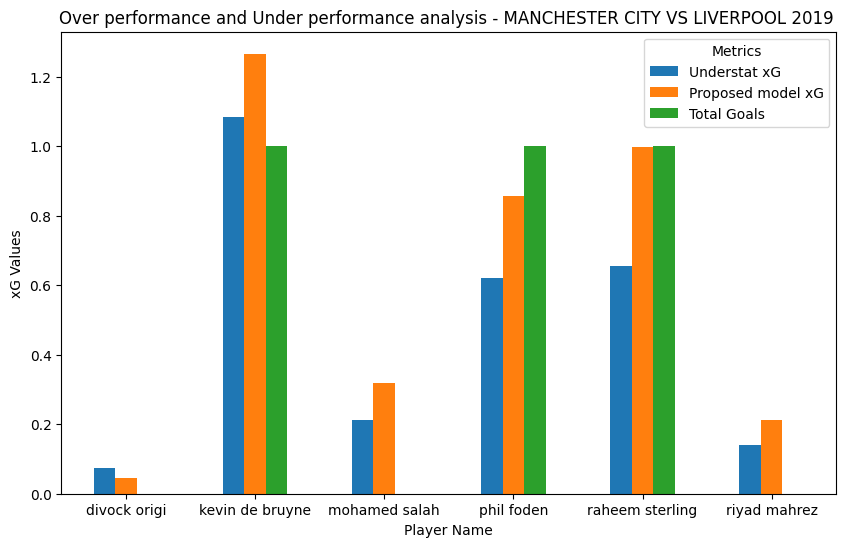

---------------------------------------------------------------------------------------------------
From the graph , it can be noted that Kevin de Buryne, Phil Foden, Sterling all has scored 1 goal and out of the chances they got he has an expected goal value of 1.08,0.61,0.65 respectively throughout the game as predicted by Understat xG provider and xG values of 1.26, 0.85,0.99 by our proposed model using xGBoost algorithm
-----------------------------------------------------------------------------------------------------------------------
Inference 1 - Considering the amount and quality of chances throughout the game, Kevin de Buryne, Phil Foden, Sterling have all performed ideally by scoring 1 goal
-----------------------------------------------------------------------------------------------------------------------
Inference 2 - Considering the amount and quality of chances throughout the game, Mohammed Salah and Riyad Mahrez has underperformed by scoring no goals having xG values

In [437]:
# Detection of over performance and under performance by comparing the xG values to the actual goals scored in the match

df_match_11959 = data[data['Match ID'] == 11959]
df_match_11959 = df_match_11959.sort_values(by=["X_coord", "Y_coord"])


# over_under_df = pd.DataFrame(columns=['Player name', 'Understat xG', 'xGBoost xG', 'Total Goals'])


# Grouping by 'Player name' and aggregate 'xG' and 'is_goal' columns
over_under_df = df_match_11959.groupby('Player name').agg({'xG': 'sum', 'xG_calc_xgb': 'sum' ,'is_goal': 'sum'}).reset_index()

over_under_df.columns = ['Player name', 'Understat xG', 'Proposed model xG', 'Total Goals']
print("--ANALYSIS OF MANCHESTER CITY VS LIVERPOOL GAME 2019 ----------------------------------")
display(over_under_df)



over_under_df.set_index('Player name', inplace=True)

# Plot the values for each player
over_under_df.plot(kind='bar', figsize=(10, 6))
plt.title('Over performance and Under performance analysis - MANCHESTER CITY VS LIVERPOOL 2019 ')
plt.xlabel('Player Name')
plt.ylabel('xG Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.show()

print("---------------------------------------------------------------------------------------------------")
print("From the graph , it can be noted that Kevin de Buryne, Phil Foden, Sterling all has scored 1 goal and "+ 
        "out of the chances they got he has an expected goal value of 1.08,0.61,0.65 respectively throughout the game as predicted by Understat xG provider "+
     "and xG values of 1.26, 0.85,0.99 by our proposed model using xGBoost algorithm")
print("-----------------------------------------------------------------------------------------------------------------------")
print("Inference 1 - Considering the amount and quality of chances throughout the game, Kevin de Buryne, Phil Foden, Sterling have all performed ideally by scoring 1 goal")
print("-----------------------------------------------------------------------------------------------------------------------")
print("Inference 2 - Considering the amount and quality of chances throughout the game, Mohammed Salah and Riyad Mahrez has underperformed by scoring no goals having xG values of 0.31 and 0.21 ")

In [293]:
#Analysis of over performance and under perforamance of the teams

over_under_df_team = df_match_11959.groupby('Player Team').agg({'xG': 'sum', 'xG_calc_xgb': 'sum' ,'is_goal': 'sum'}).reset_index()
over_under_df_team.columns = ['Player Team', 'Understat xG', 'Proposed model xG', 'Total Goals']
print("--------------ANALYSIS OF MANCHESTER CITY VS LIVERPOOL GAME 2019 ----------------------------------")
print(over_under_df_team)

--------------ANALYSIS OF MANCHESTER CITY VS LIVERPOOL GAME 2019 ----------------------------------
       Player Team  Understat xG  Proposed model xG  Total Goals
0        Liverpool      0.288249           0.362795            0
1  Manchester City      2.501509           3.333385            3


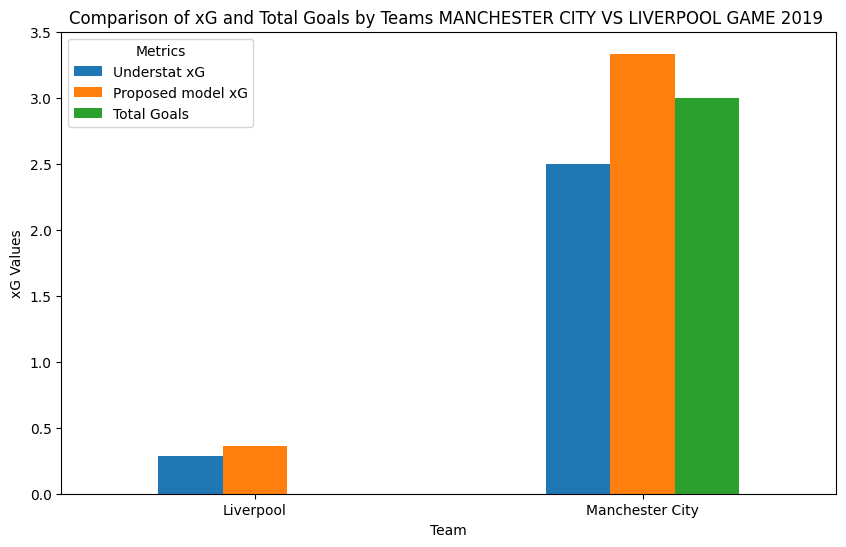

From the graph , it can be noted that Manchester City had an xG value of 3.33 throughout the game  and Liverpool had an xG value of 0.36 and both teams performed according to the xG metric and the scoreline was 3-0


In [294]:
over_under_df_team.set_index('Player Team', inplace=True)

# Plot the values for each player
over_under_df_team.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of xG and Total Goals by Teams MANCHESTER CITY VS LIVERPOOL GAME 2019 ')
plt.xlabel('Team')
plt.ylabel('xG Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.show()


print("From the graph , it can be noted that Manchester City had an xG value of 3.33 throughout the game  and "+ 
        "Liverpool had an xG value of 0.36 and both teams performed according to the xG metric and the scoreline was 3-0")